# Analysis on Hotel Dataset

## Loading Cleaned Data

In [19]:
if (!require(nnet)){
  install.packages("nnet")
}

Loading required package: nnet
Warning message:
"package 'nnet' was built under R version 3.6.3"

In [2]:
dat <- read.csv("Data/df.csv",header=TRUE)
star.dat <- dat[,c(2,11:dim(dat)[2])]

In [3]:
head(dat)

X,stars_x,useful,text,name,address,postal_code,stars_y,attributes,categories,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
0,3,0,"I stayed here twice in a short period of time in April 2014. The first time I liked it, the second time made me join the Hilton Hhonors program and recuse myself from Marriott for a while. I requested connecting rooms (traveling with my son and one of my parents each time). The first time we got that, the second time we did not. Disappointing, but it was more the way the woman checking us in clearly could not care less that my son couldn't stay near his Nana--good acting is the key to good customer service. The second time we stayed the heat was very loud, which I didn't figure out until my son was asleep so no way to get it fixed (assuming they'd care more about that issue). I don't much understand why housekeeping couldn't have filled out a note that the heat was broken--it was LOUD, they would have noticed. The bathroom was very small, very. But it was clean, the pool area was nice (although had not been cleaned during the night when we went down the next morning). Breakfast was fine, nothing special. I won't be staying here again.",Fairfield Inn & Suites by Marriott Madison East,2702 Crossroads Dr,53718,3.5,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'free'"", 'BusinessAcceptsCreditCards': 'True', 'BusinessAcceptsBitcoin': 'False', 'DogsAllowed': 'False'}","Hotels & Travel, Event Planning & Services, Hotels",...,0,0,0,0,0,0,0,0,0,0
1,4,1,"Our room on the second floor was very nice. The decor is Victorian, from the furniture to the color palette, even down to the little octagonal black and white tiles in the bathroom. There was a lovely fireplace, and the toilet tank was mounted by the ceiling with a pull chain to flush. There was a small sitting area and full sink, countertop and mini fridge, a full sized coffee maker and a small flat screen TV. The mattress was comfortable, the towels were soft and there was good water pressure in the shower. We stayed in the winter and the room was toasty warm. From our room you could hear the traffic noise, especially due to the wet roads, and the room is above a bar. From the bathroom we could hear distant voices, maybe from the bar or from an adjoining room, but it wasn't a problem. I could hear people walking in their room on third floor a couple of times. The thing that was a surprise as far as noise were the trains that went through in the wee hours of the morning. We had arrived after dark and didn't notice that a railway crossing was right outside our window one story down, and at least twice trains went by and blew their horns a few toots as they passed the intersection. We had some drinks, including complimentary ones for our stay, at the Up North, and the bartender told us we could take drinks and popcorn up to the room if we would like. The Hotel Ruby Marie was a charming stay and I would stay again if I were looking to spend some time in the area.",Hotel Ruby Marie,524 E Wilson St,53703,4.0,"{'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""u'free'""}","Bed & Breakfast, Hotels & Travel, Hotels, Event Planning & Services",...,0,0,0,0,0,0,0,0,0,0
2,3,0,"This hotel has good intentions. The service was adequate. The room was clean. The vintage decor of this place does not resonate with me. I don't get it. ..it just looks outdated...but not in a fashionable way ...just in a we're going to grandma's house kinda way...In fact, after having stayed the weekend here, im sarting to wonder if all the 4 & 5 star reviews i read beforehand about the vintage charm of the hotel are even real. The breakfast at the Come Back In was the real deal. The buttermilk pancakes were a little bland, the pan fried potatoes were tasty but greasy but, even with that said, breakfast being included as part of the hotel pkg is definitely a huge plus. Overall, this hotel wouldn't be must first choice to stay a

In [4]:
dim(dat)

[1] 1532 1405

In [5]:
head(star.dat)

stars_x,stayed,twice,short,period,time,first,liked,second,made,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
3,2,1,1,1,7,2,1,3,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dim(star.dat)

[1] 1532 1396

## Manipulating Cleaned Data For the Analysis

Since we have a huge dimensionality, we need to reduce down it by removing unmeaningful words. We selected out the words more used than 3rd quantile.

In [7]:
wordembedding.dat <- star.dat
for (i in 1:dim(star.dat)[2]-1){
  wordembedding.dat[which(star.dat[,i+1] >=1),i+1]=1
}
words <- apply(wordembedding.dat[,2:dim(star.dat)[2]],2,sum)
stars <- star.dat[,1]
wordembedding.dat <- wordembedding.dat[names(sort(words[words>summary(words)[5]], decreasing= TRUE))]
wordembedding.dat <- cbind(stars,wordembedding.dat)
wordembedding.dat$stars <- as.factor(wordembedding.dat$stars)

In [8]:
head(wordembedding.dat)

stars,room,hotel,stay,staff,clean,breakfast,nice,great,bed,...,three,ac,wisconsin,given,set,may,window,reason,selection,cooky
3,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dim(wordembedding.dat)

[1] 1532  344

We reduce down the dimensionality from 1396 to 344. We loaded and sorted words based on how they are frquently used.

In [10]:
sort(words[words>summary(words)[5]], decreasing= TRUE)

room         hotel          stay         staff         clean 
         1147           974           687           619           593 
    breakfast          nice         great           bed         place 
          584           559           520           465           464 
          one         would         night       madison          good 
          442           441           441           422           402 
       stayed           get          desk      friendly          like 
          399           397           390           380           378 
     location          time         front          free        really 
          369           348           347           343           305 
         also          pool          area       service         didnt 
          304           295           295           286           280 
  comfortable          back          well             u          even 
          277           263           262           244           244 
        could      bathroom           day       parking           lot 
          242           241           239           239           231 
   restaurant           bar            go           got          dont 
          229           228           222           217           217 
      staying         lobby           two          work         floor 
          204           196           196           195           193 
         need            im         first       morning          make 
          191           188           187           186           186 
        thing         price        little        people        around 
          184           184           183           183           181 
         much         next.       helpful    definitely           hot 
          180           180           180           175           173 
   everything         water         check         right    experience 
          172           171           171           168           168 
         star           new         small        shower          food 
          167           164           163           163           163 
       better         never          went          best           inn 
          162           160           154           154           154 
        super          hour            X2           use        coffee 
          152           151           151           150           148 
         made        pretty          door           ive           big 
          147           147           147           145           142 
         many     recommend      downtown           way       overall 
          140           137           137           136           136 
        close      business            tv          come         every 
          136           136           135           135           135 
        going           bit        enough           say         sleep 
          134           132           132           132           131 
      shuttle          sure          look        street         guest 
          130           130           129           127           127 
         ever          feel          find          year         suite 
          125           125           125           125           122 
         away         quiet         wasnt       weekend           see 
          121           121           119           119           119 
        large          know       checked         drink          said 
          118           118           118           117           117 
      walking        minute          told       manager        though 
          116           116           115           114           113 
       booked      spacious          cant          take          wifi 
          113           113           113           112           112 
       always          easy            X3           bad          give 
          111           110           110           109           109 
         came         still      

We built up a function to draw barplots of frequency of some choosed words

In [11]:
word.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(wordembedding.dat$stars == 1))
total.star2 <-length(which(wordembedding.dat$stars == 2))
total.star3 <-length(which(wordembedding.dat$stars == 3))
total.star4 <-length(which(wordembedding.dat$stars == 4))
total.star5 <-length(which(wordembedding.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(wordembedding.dat$star,wordembedding.dat[,ind])
star1 <-length(which(wordembedding.dat[,1] == 1 & freq.dat[,2] == 1))
star2 <-length(which(wordembedding.dat[,1] == 2 & freq.dat[,2] == 1))
star3 <-length(which(wordembedding.dat[,1] == 3 & freq.dat[,2] == 1))
star4 <-length(which(wordembedding.dat[,1] == 4 & freq.dat[,2] == 1))
star5 <-length(which(wordembedding.dat[,1] == 5 & freq.dat[,2] == 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=ind)
}

## Word Frequency Checking

Among the sorted words above, we are going to select out some words and break them in to 5 different parts, which are adjective words, the words associated with service, the words associated with facility, the words associated with location and the words associated with atmosphere of the hotel.

### Checking Whether the Analysis Works properly by some adjective words

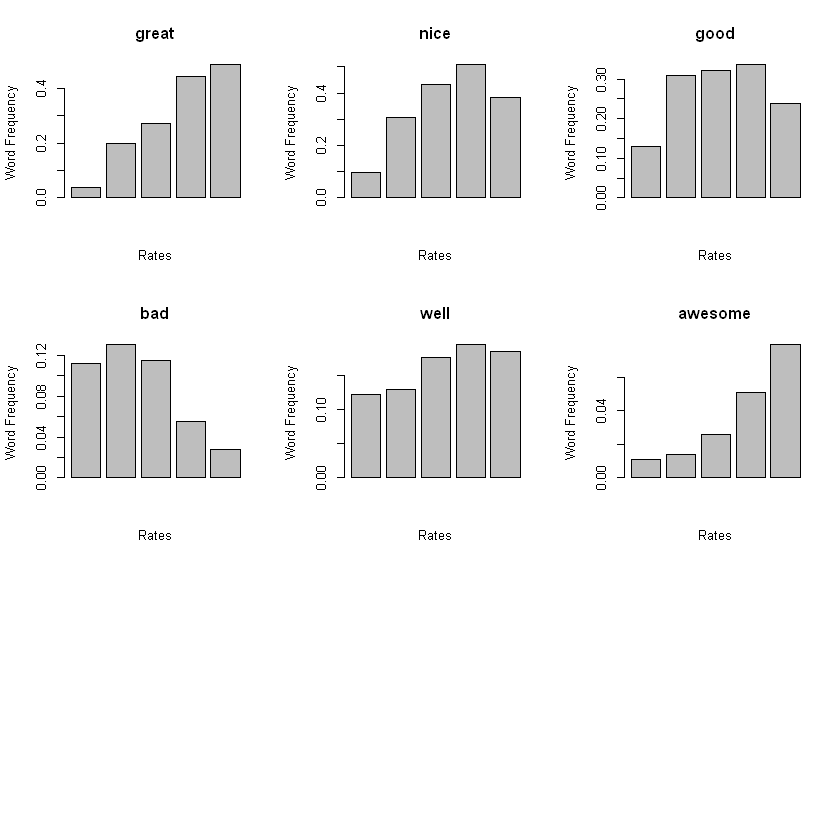

In [12]:
par(mfrow=c(3,3))
word.frequency("great")
word.frequency("nice")
word.frequency("good")
word.frequency("bad")
word.frequency("well")
word.frequency("awesome")

From the produced plots, we noticed the function worked properly.

### 1. Words associated with service and furniture

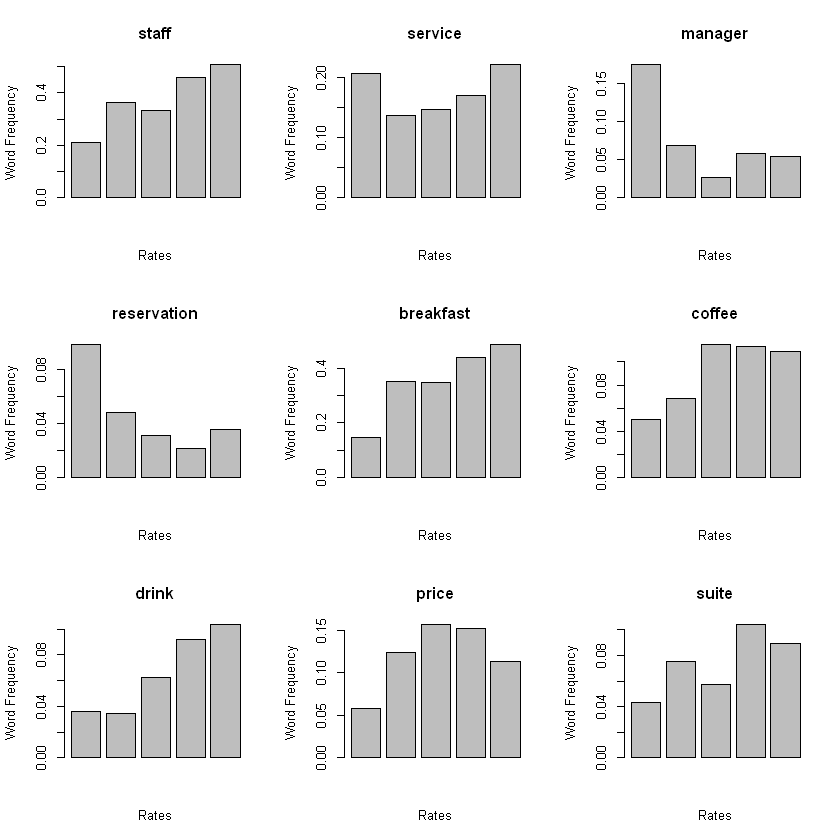

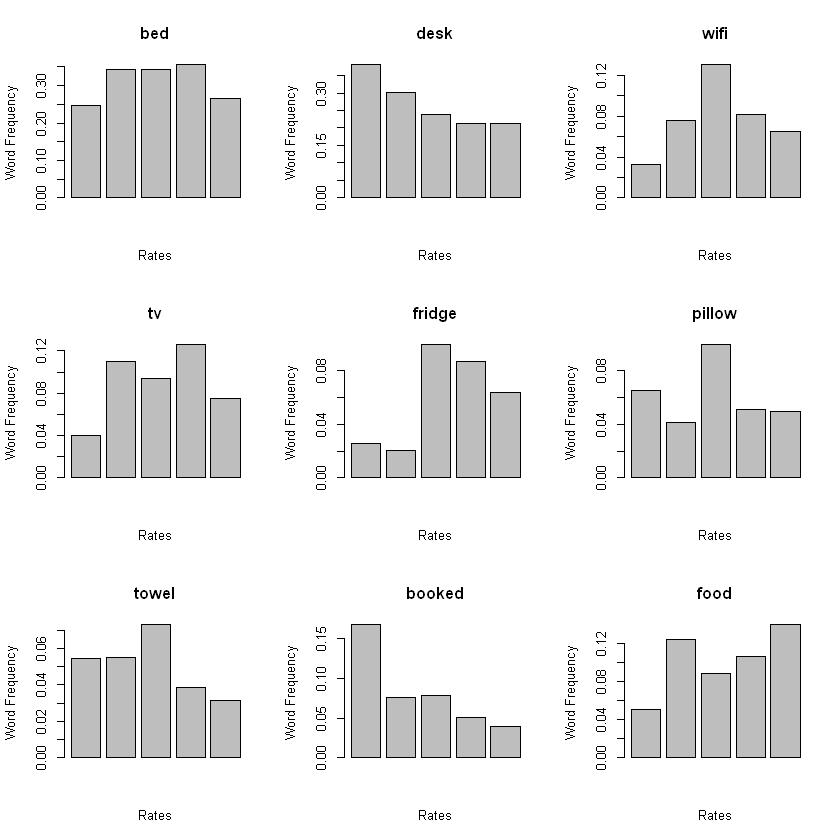

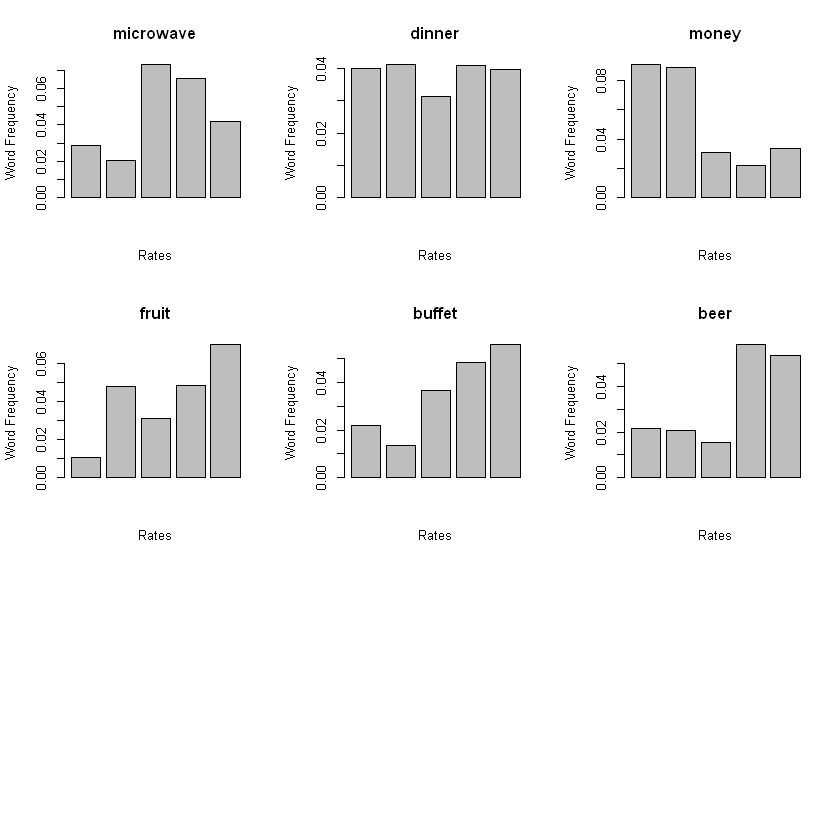

In [13]:
par(mfrow=c(3,3))
word.frequency("staff")
word.frequency("service")
word.frequency("manager")
word.frequency("reservation")
word.frequency("breakfast")
word.frequency("coffee")
word.frequency("drink")
word.frequency("price")
word.frequency("suite")
word.frequency("bed")
word.frequency("desk")
word.frequency("wifi")
word.frequency("tv")
word.frequency("fridge")
word.frequency("pillow")
word.frequency("towel")
word.frequency("booked")
word.frequency("food")
word.frequency("microwave")
word.frequency("dinner")
word.frequency("money")
word.frequency("fruit")
word.frequency("buffet")
word.frequency("beer")

Based upon the bar plots, the roles of employees are important for determining the evaluation. Also, other services like reservation, provided food, breakfast, buffet, drinks like beer are played important role to determine the evaluation. The rates are not significantly differed by the provided furnitures like bed, fridge. Price related words price and money are also somewhat related to the rate.

### 2. Words associated with facility

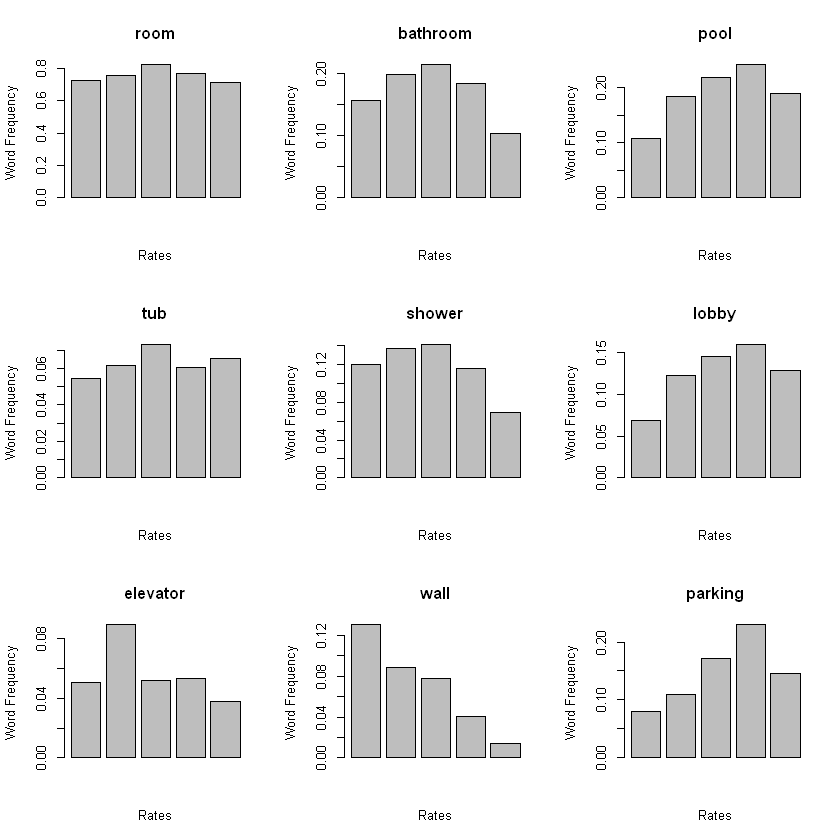

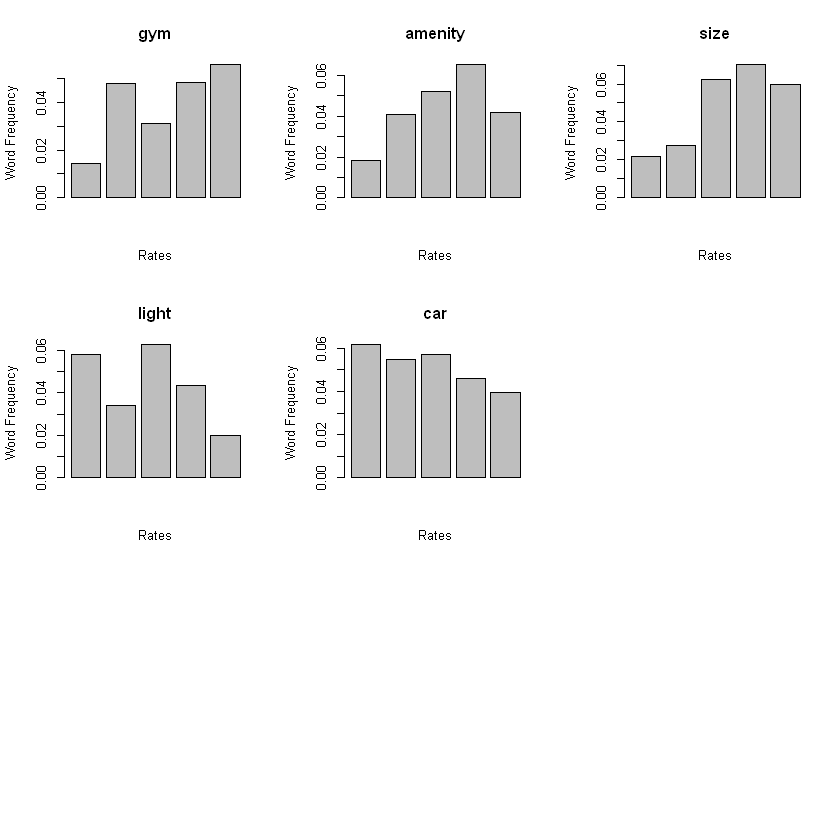

In [14]:
par(mfrow=c(3,3))
word.frequency("room")
word.frequency("bathroom")
word.frequency("pool")
word.frequency("tub")
word.frequency("shower")
word.frequency("lobby")
word.frequency("elevator")
word.frequency("wall")
word.frequency("parking")
word.frequency("gym")
word.frequency("amenity")
word.frequency("size")
word.frequency("light")
word.frequency("car")

 From the second part of the visualization analysis, room itself does not play important role to the rating. However, amenities like gym, pool and parking places may affect to the rating. Interestingly, wall shows some significant difference.

### 3.Words associated with location

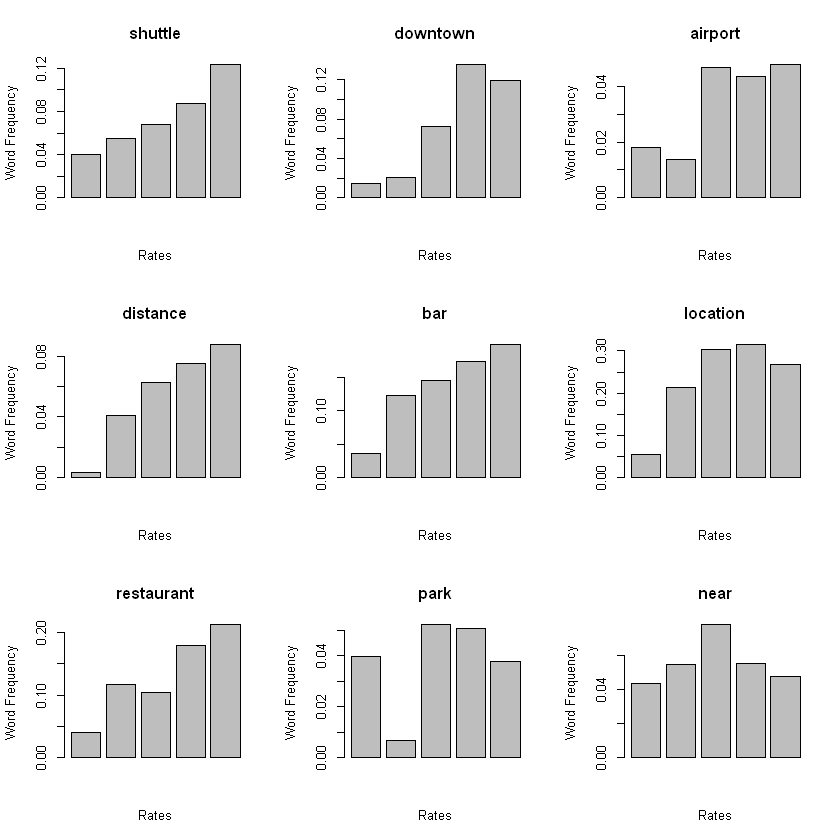

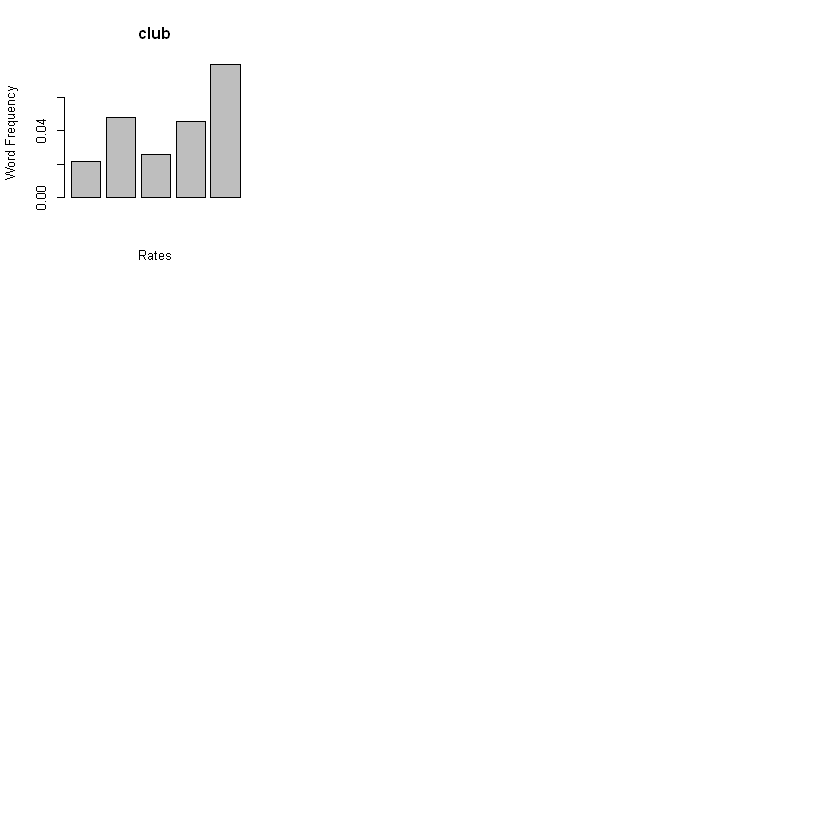

In [15]:
par(mfrow=c(3,3))
word.frequency("shuttle")
word.frequency("downtown")
word.frequency("airport")
word.frequency("distance")
word.frequency("bar")
word.frequency("location")
word.frequency("restaurant")
word.frequency("park")
word.frequency("near")
word.frequency("club")

From the 3rd part of the graphical analysis, we noticed that the words related to the location of the hotels and neighborhood restaurants, bars and clubs shows some relationship to the rates. The words associated with transportations also are relatable with the rate.

### 4. Words associated with atmosphere of hotels

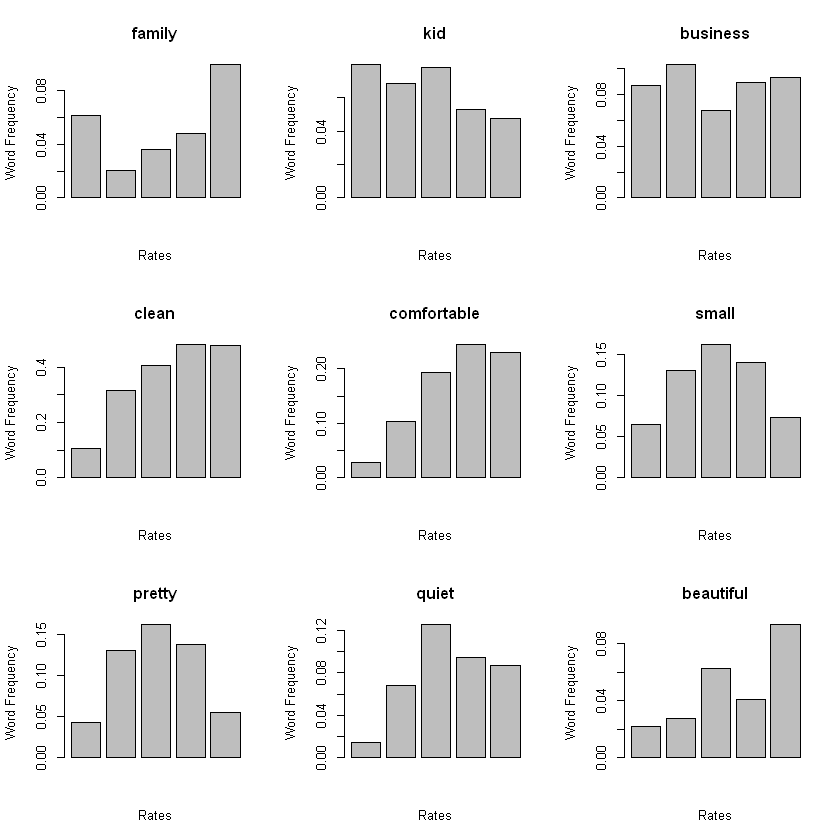

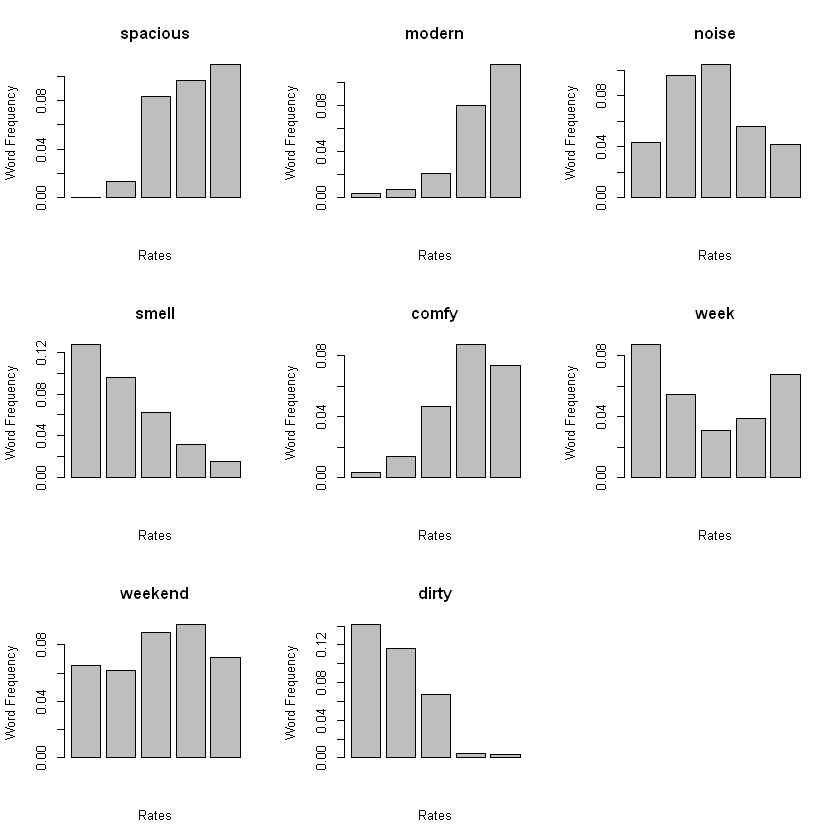

In [16]:
par(mfrow=c(3,3))
word.frequency("family")
word.frequency("kid")
word.frequency("business")
word.frequency("clean")
word.frequency("comfortable")
word.frequency("small")
word.frequency("pretty")
word.frequency("quiet")
word.frequency("beautiful")
word.frequency("spacious")
word.frequency("modern")
word.frequency("noise")
word.frequency("smell")
word.frequency("comfy")
word.frequency("week")
word.frequency("weekend")
word.frequency("dirty")

From the 4th part of the visualization analysis, it may seemed customers want more family friendly and modern environment. We observed cleanness, comfortableness, roominess and smell of the place is also played important roles in customers' evaluation.

## Statistical Test For the Choosen Words

We also had done statistical tests to see what words are statistically significant on rating. We divided up the wordembedding.dat into four different dataset and test which words impact on the evaluation.
For the statistical test, we will use multinomial logistic regression and Backward AIC.
The multinom function in R calculates the coefficients in following way:

$$
    \log(\dfrac{P(Star = *)}{P(Star=1)}) = \beta_{0}+{\beta}X 
$$
where the $\beta$ is coefficients and * is the number of stars from 2 to 5

In [17]:
service.dat <- wordembedding.dat[c("stars","staff","service","manager","reservation","breakfast","coffee","drink","price","suite","bed","desk","wifi","tv","fridge","pillow","towel","booked","food","microwave","dinner","money","fruit","buffet","beer")]
facility.dat <- wordembedding.dat[c("stars","room","bathroom","pool","tub","shower","lobby","elevator","wall","parking","gym","amenity","size","light","car")]
location.dat <- wordembedding.dat[c("stars","shuttle","downtown","airport","distance","bar","location","restaurant","park","near","club")]
atmosphere.dat <- wordembedding.dat[c("stars","family","business","kid","clean","comfortable","small","pretty","quiet","beautiful","spacious","modern","noise","smell","comfy","week","weekend","dirty")]

### 1. Words associated with service

#### Coefficient & p-values

In [20]:
m1.service <- multinom(stars~.,data=service.dat)
summary(m1.service)
m1.service.stat <- summary(m1.service)$coefficient/summary(m1.service)$standard.errors
pval.service.m1 <- 2*(pnorm(abs(m1.service.stat),0,1,lower.tail = FALSE))
pval.service.m1

# weights:  130 (100 variable)
initial  value 2465.658882 
iter  10 value 2144.134956
iter  20 value 2092.343692
iter  30 value 2090.988341
iter  40 value 2090.936296
iter  50 value 2090.934046
final  value 2090.933953 
converged


Call:
multinom(formula = stars ~ ., data = service.dat)

Coefficients:
  (Intercept)     staff     service   manager reservation breakfast      coffee
2 -0.94627525 0.7107295 -0.35934379 -1.017460  -0.5634965 1.0035071 -0.02445944
3 -0.60299008 0.6380128 -0.16589648 -1.898313  -0.9190004 0.8980932  0.46736242
4 -0.16933780 1.1711276  0.08722946 -1.204260  -1.3718681 1.2161715  0.31475925
5 -0.06648119 1.3628516  0.43266606 -1.385311  -0.9232835 1.4551839  0.23777330
       drink     price     suite        bed       desk      wifi        tv
2 -0.3320884 0.7056295 0.7742481  0.3135336 -0.3544704 0.7884546 0.9476130
3  0.3651728 0.8478073 0.5156348  0.1702967 -0.6644227 1.3387059 0.4599862
4  0.8081324 0.7556007 1.1689189  0.3239535 -0.9498536 0.7311577 0.9137863
5  0.9377229 0.4347679 1.0618788 -0.0529948 -0.9389462 0.5869980 0.4746020
      fridge     pillow       towel     booked      food  microwave      dinner
2 -0.4657921 -0.5411317  0.01036266 -0.9647945 0.9970134 -0.8473448 -0.088

,(Intercept),staff,service,manager,reservation,breakfast,coffee,drink,price,suite,...,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer
2,3.209696e-07,2.841550e-03,0.22868543,8.561705e-03,0.234220949,2.006626e-04,0.9586089,0.56540427,0.06158358,0.099380737,...,0.2927804,0.9828354,1.165243e-02,0.01141047,0.2514061,0.8743179,0.340598551,0.3047035,0.1007467,0.3699278
3,3.536680e-04,4.775167e-03,0.54230856,1.542746e-04,0.065751769,4.870622e-04,0.2505525,0.42859607,0.01483722,0.276085696,...,0.5224474,0.8416168,3.213076e-02,0.18355295,0.6974521,0.4831217,0.148574835,0.7011100,0.5346158,0.4048164
4,2.485577e-01,1.714156e-09,0.69855605,1.073966e-04,0.002036473,7.173242e-08,0.3942643,0.03972823,0.01743487,0.003189087,...,0.2930602,0.2039540,1.260863e-04,0.08116038,0.6376075,0.5246825,0.002986339,0.4653167,0.5535746,0.1946809
5,6.432994e-01,7.226987e-13,0.04239663,4.693606e-06,0.016667872,4.668743e-11,0.5142077,0.01441099,0.17661630,0.007176536,...,0.6059992,0.0890586,7.618490e-06,0.00839472,0.3108156,0.3690205,0.029937508,0.1440671,0.5674435,0.2317320


#### Backward AIC

In [21]:
step(m1.service, direction = "backward", k = 2)

Start:  AIC=4381.87
stars ~ staff + service + manager + reservation + breakfast + 
    coffee + drink + price + suite + bed + desk + wifi + tv + 
    fridge + pillow + towel + booked + food + microwave + dinner + 
    money + fruit + buffet + beer

trying - staff 
# weights:  125 (96 variable)
initial  value 2465.658882 
iter  10 value 2158.853214
iter  20 value 2125.050230
iter  30 value 2123.791734
iter  40 value 2123.741213
iter  50 value 2123.731443
final  value 2123.730654 
converged
trying - service 
# weights:  125 (96 variable)
initial  value 2465.658882 
iter  10 value 2140.401010
iter  20 value 2098.885528
iter  30 value 2097.662989
iter  40 value 2097.612312
iter  50 value 2097.610276
iter  60 value 2097.609189
final  value 2097.608866 
converged
trying - manager 
# weights:  125 (96 variable)
initial  value 2465.658882 
iter  10 value 2156.065785
iter  20 value 2107.466135
iter  30 value 2106.249501
iter  40 value 2106.207240
iter  50 value 2106.204561
iter  60 value 2106.2

Call:
multinom(formula = stars ~ staff + service + manager + reservation + 
    breakfast + drink + price + suite + desk + wifi + tv + fridge + 
    booked + food + money + beer, data = service.dat)

Coefficients:
  (Intercept)     staff     service   manager reservation breakfast      drink
2  -0.9138149 0.6821313 -0.34697444 -1.027898  -0.5730830 0.9935666 -0.3054352
3  -0.5504029 0.6068694 -0.13875918 -1.944542  -0.9049935 0.9515474  0.3734135
4  -0.1336891 1.1485873  0.07110775 -1.188172  -1.3668951 1.2740042  0.8461589
5  -0.1124776 1.3480697  0.41767100 -1.380309  -0.8846720 1.5178876  0.9562864
      price     suite       desk      wifi        tv     fridge     booked
2 0.6988493 0.7043947 -0.3058882 0.6951865 1.0021994 -0.7085119 -0.9313377
3 0.8953624 0.4757938 -0.6301207 1.3278553 0.5442557  1.1932506 -0.7301806
4 0.7622185 1.1435112 -0.9300012 0.7066024 1.0035244  0.9471989 -1.2119741
5 0.4086302 0.9957606 -0.9401074 0.5290002 0.5002705  0.6759004 -1.4449346
       food     

In [22]:
m1.service <- multinom(stars~.,data=service.dat)
m2.service <- multinom(stars~.-staff,data=service.dat)
m3.service <- multinom(stars~.-staff-service,data=service.dat)
m4.service <- multinom(stars~.-staff-service-manager,data=service.dat)
m5.service <- multinom(stars~.-staff-service-manager-reservation,data=service.dat)
m6.service <- multinom(stars~.-staff-service-manager-reservation-breakfast,data=service.dat)
m7.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee,data=service.dat)
m8.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink,data=service.dat)
m9.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price,data=service.dat)
m10.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite,data=service.dat)
m11.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed,data=service.dat)
m12.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk,data=service.dat)
m13.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi,data=service.dat)
m14.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv,data=service.dat)
m15.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge,data=service.dat)
m16.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow,data=service.dat)
m17.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel,data=service.dat)
m18.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked,data=service.dat)
m19.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food,data=service.dat)
m20.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food-microwave,data=service.dat)
m21.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food-microwave-dinner,data=service.dat)
m22.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food-microwave-dinner-money,data=service.dat)
m23.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food-microwave-dinner-money-fruit,data=service.dat)
m24.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food-microwave-dinner-money-fruit-buffet,data=service.dat)
m25.service <- multinom(stars~.-staff-service-manager-reservation-breakfast-coffee-drink-price-suite-bed-desk-wifi-tv-fridge-pillow-towel-booked-food-microwave-dinner-money-fruit-buffet-beer,data=service.dat)

# weights:  130 (100 variable)
initial  value 2465.658882 
iter  10 value 2144.134956
iter  20 value 2092.343692
iter  30 value 2090.988341
iter  40 value 2090.936296
iter  50 value 2090.934046
final  value 2090.933953 
converged
# weights:  125 (96 variable)
initial  value 2465.658882 
iter  10 value 2158.853214
iter  20 value 2125.050230
iter  30 value 2123.791734
iter  40 value 2123.741213
iter  50 value 2123.731443
final  value 2123.730654 
converged
# weights:  120 (92 variable)
initial  value 2465.658882 
iter  10 value 2166.075177
iter  20 value 2130.504446
iter  30 value 2129.233161
iter  40 value 2129.169569
iter  50 value 2129.164223
final  value 2129.164001 
converged
# weights:  115 (88 variable)
initial  value 2465.658882 
iter  10 value 2179.097453
iter  20 value 2145.687034
iter  30 value 2144.544263
iter  40 value 2144.489177
iter  50 value 2144.482718
iter  50 value 2144.482707
iter  50 value 2144.482707
final  value 2144.482707 
converged
# weights:  110 (84 variable)

In [23]:
Variables <- c("staff,service,manager,reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","service,manager,reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","manager,reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer","towel,booked,food,microwave,dinner,money,fruit,buffet,beer","booked,food,microwave,dinner,money,fruit,buffet,beer","food,microwave,dinner,money,fruit,buffet,beer","microwave,dinner,money,fruit,buffet,beer","dinner,money,fruit,buffet,beer","money,fruit,buffet,beer","fruit,buffet,beer","buffet,beer","beer","-")
AIC.vector <- c(m1.service$AIC,m2.service$AIC,m3.service$AIC,m4.service$AIC,m5.service$AIC,m6.service$AIC,m7.service$AIC,m8.service$AIC,m9.service$AIC,m10.service$AIC,m11.service$AIC,m12.service$AIC,m13.service$AIC,m14.service$AIC,m15.service$AIC,m16.service$AIC,m17.service$AIC,m18.service$AIC,m19.service$AIC,m20.service$AIC,m21.service$AIC,m22.service$AIC,m23.service$AIC,m24.service$AIC,m25.service$AIC)
cbind(Variables,AIC.vector)

Variables,AIC.vector
"staff,service,manager,reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4381.8679061773
"service,manager,reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4439.4613086791
"manager,reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4442.32800195006
"reservation,breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4464.96541407064
"breakfast,coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4469.32440934148
"coffee,drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4523.67119431266
"drink,price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4518.95775105502
"price,suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4525.93117779906
"suite,bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4530.80239791544
"bed,desk,wifi,tv,fridge,pillow,towel,booked,food,microwave,dinner,money,fruit,buffet,beer",4535.01746278599


From the p-value table and the result of Backward AIC, we recognized that  among the words associated with the service, the statistically significant words that impacts on evaluations are  "staff", "manager", "breakfast", "booked" "money", and "desk"

### 2. Words associated with facility

#### Coefficient & p-values

In [24]:
m1.facility <- multinom(stars~.,data=facility.dat)
summary(m1.facility)
m1.facility.stat <- summary(m1.facility)$coefficient/summary(m1.facility)$standard.errors
pval.facility.m1 <- 2*(pnorm(abs(m1.facility.stat),0,1,lower.tail = FALSE))
pval.facility.m1

# weights:  80 (60 variable)
initial  value 2465.658882 
iter  10 value 2240.320051
iter  20 value 2222.067363
iter  30 value 2221.411728
iter  40 value 2221.356628
final  value 2221.355057 
converged


Call:
multinom(formula = stars ~ ., data = facility.dat)

Coefficients:
  (Intercept)        room   bathroom      pool          tub       shower
2 -0.87199948  0.09497949  0.3091319 0.5279771 -0.105589353  0.042164758
3 -0.96446497  0.40738113  0.3446507 0.7104417  0.004005614 -0.007260845
4  0.02470905  0.06135462  0.2372090 0.8329207 -0.158109168 -0.164917580
5  0.60125137 -0.08785075 -0.2445444 0.5373151  0.236470259 -0.527740332
      lobby   elevator       wall   parking       gym   amenity       size
2 0.5807670  0.2869732 -0.6502278 0.3015184 1.1020970 0.7264093 0.08283984
3 0.7588329 -0.5612264 -0.8774106 0.8658313 0.5279302 1.0619313 0.90147102
4 0.9115049 -0.6126611 -1.5229262 1.2914287 0.9227716 1.3236453 1.08413457
5 0.8694682 -0.6170806 -2.4586682 0.8238457 1.3713974 0.9053814 1.07988425
       light        car
2 -0.6593365 -0.3060488
3 -0.1110464 -0.3762344
4 -0.4376942 -0.6655916
5 -1.0737272 -0.5888835

Std. Errors:
  (Intercept)      room  bathroom      pool       tub 

,(Intercept),room,bathroom,pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car
2,3.724937e-05,0.69746201,0.2886706,0.0848622312,0.8226894,0.89632502,0.106747676,0.4962747,7.157701e-02,4.012521e-01,0.08975498,0.245952832,0.90106792,0.2164040,0.50284861
3,6.306325e-06,0.08992091,0.1962343,0.0110960114,0.9924074,0.98058672,0.020794815,0.2131433,1.026277e-02,4.635770e-03,0.43291489,0.060658495,0.08526480,0.7861227,0.36466722
4,8.789520e-01,0.74455467,0.3174549,0.0006911689,0.6776546,0.53389204,0.001884286,0.1107978,3.750105e-06,1.288004e-06,0.11461599,0.009425769,0.02327429,0.2428141,0.06881786
5,5.449112e-05,0.61773082,0.3248833,0.0286430424,0.5196095,0.05747088,0.003040612,0.1108878,1.660912e-08,2.489216e-03,0.01573160,0.082088662,0.02358217,0.0122261,0.10149847


#### Backward AIC

In [25]:
step(m1.facility, direction = "backward", k = 2)

Start:  AIC=4562.71
stars ~ room + bathroom + pool + tub + shower + lobby + elevator + 
    wall + parking + gym + amenity + size + light + car

trying - room 
# weights:  75 (56 variable)
initial  value 2465.658882 
iter  10 value 2254.316467
iter  20 value 2224.810331
iter  30 value 2224.165224
iter  40 value 2224.106898
final  value 2224.106726 
converged
trying - bathroom 
# weights:  75 (56 variable)
initial  value 2465.658882 
iter  10 value 2241.805979
iter  20 value 2227.149225
iter  30 value 2225.897674
iter  40 value 2225.837098
final  value 2225.836478 
converged
trying - pool 
# weights:  75 (56 variable)
initial  value 2465.658882 
iter  10 value 2243.734387
iter  20 value 2228.593004
iter  30 value 2227.932381
iter  40 value 2227.905080
final  value 2227.904806 
converged
trying - tub 
# weights:  75 (56 variable)
initial  value 2465.658882 
iter  10 value 2241.072115
iter  20 value 2223.015799
iter  30 value 2222.387763
iter  40 value 2222.324626
final  value 2222.322694

Call:
multinom(formula = stars ~ bathroom + pool + lobby + elevator + 
    wall + parking + gym + amenity + size + light, data = facility.dat)

Coefficients:
  (Intercept)   bathroom      pool     lobby   elevator       wall   parking
2  -0.8165621  0.3124461 0.5148045 0.5861960  0.2785151 -0.6449745 0.2737337
3  -0.6868747  0.3734298 0.7272824 0.7879678 -0.5511623 -0.8467548 0.8457034
4   0.0335397  0.1854749 0.8115400 0.9002739 -0.6361590 -1.5441802 1.2278464
5   0.5070949 -0.3615053 0.5660768 0.8252742 -0.6638047 -2.4859236 0.7417252
        gym   amenity       size      light
2 1.0715206 0.7333696 0.07626826 -0.6553907
3 0.4925653 1.0874560 0.94169537 -0.1033877
4 0.8793268 1.3315944 1.04671717 -0.4682306
5 1.2963963 0.9098214 1.01840105 -1.1389775

Residual Deviance: 4459.364 
AIC: 4547.364 

In [26]:
m1.facility <- multinom(stars~.,data=facility.dat)
m2.facility <- multinom(stars~.-room,data=facility.dat)
m3.facility <- multinom(stars~.-room-bathroom,data=facility.dat)
m4.facility <- multinom(stars~.-room-bathroom-pool,data=facility.dat)
m5.facility <- multinom(stars~.-room-bathroom-pool-tub,data=facility.dat)
m6.facility <- multinom(stars~.-room-bathroom-pool-tub-shower,data=facility.dat)
m7.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby,data=facility.dat)
m8.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator,data=facility.dat)
m9.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall,data=facility.dat)
m10.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall-parking,data=facility.dat)
m11.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall-parking-gym,data=facility.dat)
m12.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall-parking-gym-amenity,data=facility.dat)
m13.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall-parking-gym-amenity-size,data=facility.dat)
m14.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall-parking-gym-amenity-size-light,data=facility.dat)
m15.facility <- multinom(stars~.-room-bathroom-pool-tub-shower-lobby-elevator-wall-parking-gym-amenity-size-light-car,data=facility.dat)

# weights:  80 (60 variable)
initial  value 2465.658882 
iter  10 value 2240.320051
iter  20 value 2222.067363
iter  30 value 2221.411728
iter  40 value 2221.356628
final  value 2221.355057 
converged
# weights:  75 (56 variable)
initial  value 2465.658882 
iter  10 value 2254.316467
iter  20 value 2224.810331
iter  30 value 2224.165224
iter  40 value 2224.106898
final  value 2224.106726 
converged
# weights:  70 (52 variable)
initial  value 2465.658882 
iter  10 value 2251.943380
iter  20 value 2230.745496
iter  30 value 2229.280972
iter  40 value 2229.235021
final  value 2229.234749 
converged
# weights:  65 (48 variable)
initial  value 2465.658882 
iter  10 value 2259.535753
iter  20 value 2237.659895
iter  30 value 2235.889557
iter  40 value 2235.863342
iter  40 value 2235.863333
iter  40 value 2235.863332
final  value 2235.863332 
converged
# weights:  60 (44 variable)
initial  value 2465.658882 
iter  10 value 2261.123246
iter  20 value 2238.653095
iter  30 value 2236.850801
fina

In [27]:
Variables <- c("room,bathroom,pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car","bathroom,pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car","pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car","tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car","shower,lobby,elevator,wall,parking,gym,amenity,size,light,car","lobby,elevator,wall,parking,gym,amenity,size,light,car","elevator,wall,parking,gym,amenity,size,light,car","wall,parking,gym,amenity,size,light,car","parking,gym,amenity,size,light,car","gym,amenity,size,light,car","amenity,size,light,car","size,light,car","light,car","car","-")
AIC.vector <- c(m1.facility$AIC,m2.facility$AIC,m3.facility$AIC,m4.facility$AIC,m5.facility$AIC,m6.facility$AIC,m7.facility$AIC,m8.facility$AIC,m9.facility$AIC,m10.facility$AIC,m11.facility$AIC,m12.facility$AIC,m13.facility$AIC,m14.facility$AIC,m15.facility$AIC)
cbind(Variables,AIC.vector)

Variables,AIC.vector
"room,bathroom,pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car",4562.71011486343
"bathroom,pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car",4560.21345105416
"pool,tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car",4562.46949726675
"tub,shower,lobby,elevator,wall,parking,gym,amenity,size,light,car",4567.72666435011
"shower,lobby,elevator,wall,parking,gym,amenity,size,light,car",4561.69634119968
"lobby,elevator,wall,parking,gym,amenity,size,light,car",4562.7261259638
"elevator,wall,parking,gym,amenity,size,light,car",4569.18219226636
"wall,parking,gym,amenity,size,light,car",4568.17512236939
"parking,gym,amenity,size,light,car",4612.22228526493
"gym,amenity,size,light,car",4637.35689094645


From the p-value table and the result of Backward AIC, we recognized that among the words associated with the facility, the statistically significant words that impacts on evaluations are  "wall" and "parking"

### 3. Words associated with location

#### Coefficient & p-values

In [28]:
m1.location <- multinom(stars~.,data=location.dat)
summary(m1.location)
m1.location.stat <- summary(m1.location)$coefficient/summary(m1.location)$standard.errors
pval.location.m1 <- 2*(pnorm(abs(m1.location.stat),0,1,lower.tail = FALSE))
pval.location.m1

# weights:  60 (44 variable)
initial  value 2465.658882 
iter  10 value 2222.727927
iter  20 value 2193.650503
iter  30 value 2192.291482
iter  40 value 2192.235496
final  value 2192.234196 
converged


Call:
multinom(formula = stars ~ ., data = location.dat)

Coefficients:
  (Intercept)    shuttle   downtown     airport distance      bar location
2 -0.96263027 0.29355864 -0.1054481 -0.73288604 1.829859 1.188922 1.405590
3 -0.89834368 0.03028605  1.0848839  0.58563996 2.203222 1.313238 1.853756
4 -0.26069366 0.35864631  1.7107511  0.23807135 2.140493 1.426979 1.801858
5 -0.08591642 0.83280169  1.5263401  0.01204783 2.257241 1.553341 1.526951
  restaurant        park        near       club
2  0.8593221 -1.89712478  0.06044161  0.6951704
3  0.4608641  0.27819519  0.29459929 -0.1126473
4  1.0462556  0.09494153 -0.15165232  0.4116199
5  1.2735423 -0.34727895 -0.31838699  1.0128584

Std. Errors:
  (Intercept)   shuttle  downtown   airport distance       bar  location
2  0.12440760 0.5255803 0.7798238 0.9221237 1.097455 0.4153090 0.3375883
3  0.11938673 0.4895110 0.5883526 0.6585446 1.058933 0.3886650 0.3129117
4  0.09813051 0.4116852 0.5368136 0.5975587 1.033716 0.3556751 0.2910100
5  0.09

,(Intercept),shuttle,downtown,airport,distance,bar,location,restaurant,park,near,club
2,1.012213e-14,0.5764744,0.892437652,0.4267411,0.09544153,4.199949e-03,3.132380e-05,0.0380537371,0.07244201,0.9005597,0.22831040
3,5.286064e-14,0.9506663,0.065192625,0.3738449,0.03747001,7.279145e-04,3.137964e-09,0.2532874867,0.54712628,0.4813548,0.85745779
4,7.893268e-03,0.3836633,0.001438252,0.6903305,0.03838893,6.019907e-05,5.950387e-10,0.0026498061,0.81542592,0.6976960,0.40559184
5,3.611976e-01,0.0334381,0.004410704,0.9835394,0.02815673,8.931667e-06,1.453055e-07,0.0001833775,0.40541131,0.4140127,0.02944722


#### Backward AIC

In [29]:
step(m1.location, direction = "backward", k = 2)

Start:  AIC=4472.47
stars ~ shuttle + downtown + airport + distance + bar + location + 
    restaurant + park + near + club

trying - shuttle 
# weights:  55 (40 variable)
initial  value 2465.658882 
iter  10 value 2226.713501
iter  20 value 2198.573834
iter  30 value 2196.831541
iter  40 value 2196.772102
final  value 2196.771556 
converged
trying - downtown 
# weights:  55 (40 variable)
initial  value 2465.658882 
iter  10 value 2231.022940
iter  20 value 2207.263434
iter  30 value 2206.012542
iter  40 value 2205.974914
final  value 2205.974752 
converged
trying - airport 
# weights:  55 (40 variable)
initial  value 2465.658882 
iter  10 value 2224.185028
iter  20 value 2195.299887
iter  30 value 2193.867831
iter  40 value 2193.811427
final  value 2193.809178 
converged
trying - distance 
# weights:  55 (40 variable)
initial  value 2465.658882 
iter  10 value 2227.175950
iter  20 value 2198.645528
iter  30 value 2197.346653
final  value 2197.335424 
converged
trying - bar 
# weights:

Call:
multinom(formula = stars ~ shuttle + downtown + distance + bar + 
    location + restaurant + park + club, data = location.dat)

Coefficients:
  (Intercept)   shuttle   downtown distance      bar location restaurant
2 -0.96305572 0.1224243 -0.1073861 1.837062 1.180184 1.408200  0.8546302
3 -0.88017209 0.2635530  1.0948215 2.224952 1.324477 1.861900  0.4765359
4 -0.26426675 0.4350312  1.7023927 2.126297 1.431396 1.799985  1.0379754
5 -0.09682234 0.8299241  1.5196979 2.238832 1.550958 1.522224  1.2583574
         park       club
2 -1.89962326  0.6995154
3  0.29073858 -0.1355439
4  0.08759312  0.4161656
5 -0.35672526  1.0247458

Residual Deviance: 4391.008 
AIC: 4463.008 

In [30]:
m1.location <- multinom(stars~.,data=location.dat)
m2.location <- multinom(stars~.-shuttle,data=location.dat)
m3.location <- multinom(stars~.-shuttle-downtown,data=location.dat)
m4.location <- multinom(stars~.-shuttle-downtown-airport,data=location.dat)
m5.location <- multinom(stars~.-shuttle-downtown-airport-distance,data=location.dat)
m6.location <- multinom(stars~.-shuttle-downtown-airport-distance-bar,data=location.dat)
m7.location <- multinom(stars~.-shuttle-downtown-airport-distance-bar-location,data=location.dat)
m8.location <- multinom(stars~.-shuttle-downtown-airport-distance-bar-location-restaurant,data=location.dat)
m9.location <- multinom(stars~.-shuttle-downtown-airport-distance-bar-location-restaurant-park,data=location.dat)
m10.location <- multinom(stars~.-shuttle-downtown-airport-distance-bar-location-restaurant-park-near,data=location.dat)
m11.location <- multinom(stars~.-shuttle-downtown-airport-distance-bar-location-restaurant-park-near-club,data=location.dat)

# weights:  60 (44 variable)
initial  value 2465.658882 
iter  10 value 2222.727927
iter  20 value 2193.650503
iter  30 value 2192.291482
iter  40 value 2192.235496
final  value 2192.234196 
converged
# weights:  55 (40 variable)
initial  value 2465.658882 
iter  10 value 2226.713501
iter  20 value 2198.573834
iter  30 value 2196.831541
iter  40 value 2196.772102
final  value 2196.771556 
converged
# weights:  50 (36 variable)
initial  value 2465.658882 
iter  10 value 2234.519778
iter  20 value 2212.293652
iter  30 value 2211.018517
final  value 2210.974479 
converged
# weights:  45 (32 variable)
initial  value 2465.658882 
iter  10 value 2236.895109
iter  20 value 2214.724205
iter  30 value 2213.515582
final  value 2213.484677 
converged
# weights:  40 (28 variable)
initial  value 2465.658882 
iter  10 value 2251.666192
iter  20 value 2221.392017
iter  30 value 2219.529954
final  value 2219.525412 
converged
# weights:  35 (24 variable)
initial  value 2465.658882 
iter  10 value 2257

In [31]:
Variables <- c("shuttle,downtown,airport,distance,bar,location,restaurant,park,near,club","downtown,airport,distance,bar,location,restaurant,park,near,club","airport,distance,bar,location,restaurant,park,near,club","distance,bar,location,restaurant,park,near,club","bar,location,restaurant,park,near,club","location,restaurant,park,near,club","restaurant,park,near,club","park,near,club","near,club","club","-")
AIC.vector <- c(m1.location$AIC,m2.location$AIC,m3.location$AIC,m4.location$AIC,m5.location$AIC,m6.location$AIC,m7.location$AIC,m8.location$AIC,m9.location$AIC,m10.location$AIC,m11.location$AIC)
cbind(Variables,AIC.vector)

Variables,AIC.vector
"shuttle,downtown,airport,distance,bar,location,restaurant,park,near,club",4472.46839281797
"downtown,airport,distance,bar,location,restaurant,park,near,club",4473.54311261989
"airport,distance,bar,location,restaurant,park,near,club",4493.94895774182
"distance,bar,location,restaurant,park,near,club",4490.96935426925
"bar,location,restaurant,park,near,club",4495.05082349163
"location,restaurant,park,near,club",4520.15482508698
"restaurant,park,near,club",4590.09258133192
"park,near,club",4638.10598509428
"near,club",4638.62135010186
club,4633.44494366911


From the p-value table and the result of Backward AIC, we recognized that among the words associated with the location of the hotels, the statistically significant words that impacts on evaluations are  "restaurant", "downtown", "bar" and "location"

### 4. Words associated with atmosphere of hotels

#### Coefficient & p-values

In [32]:
m1.atmosphere <- multinom(stars~.,data=atmosphere.dat)
summary(m1.atmosphere)
m1.atmosphere.stat <- summary(m1.atmosphere)$coefficient/summary(m1.atmosphere)$standard.errors
pval.atmosphere.m1 <- 2*(pnorm(abs(m1.atmosphere.stat),0,1,lower.tail = FALSE))
pval.atmosphere.m1

# weights:  95 (72 variable)
initial  value 2465.658882 
iter  10 value 2073.276678
iter  20 value 2015.869406
iter  30 value 2007.825442
iter  40 value 2005.658882
iter  50 value 2005.311180
iter  60 value 2005.125748
iter  70 value 2005.083724
iter  80 value 2005.079640
final  value 2005.079586 
converged


Call:
multinom(formula = stars ~ ., data = atmosphere.dat)

Coefficients:
  (Intercept)     family    business         kid    clean comfortable
2  -1.0495785 -1.1757997  0.14453569 -0.15564633 1.352430    1.162572
3  -1.1111387 -0.5727653 -0.30317397 -0.06802078 1.735618    1.763446
4  -0.4094773 -0.3044761 -0.02186815 -0.43265216 2.010405    2.065828
5  -0.1767416  0.5535796 -0.06878533 -0.51782368 2.026865    1.943764
       small    pretty    quiet beautiful spacious    modern       noise
2  0.6485076 1.1711208 1.140922 0.3375757 11.92791 0.2652871  0.72892626
3  0.7937269 1.4037298 1.630269 1.1641991 13.63078 1.1211555  0.64637382
4  0.6412082 1.2421805 1.255577 0.7788046 13.70557 2.4451894 -0.01094249
5 -0.1171552 0.2996473 1.245048 1.6986933 13.90049 2.8510785 -0.23432425
       smell    comfy       week     weekend      dirty
2 -0.4460333 1.231992 -0.6653637 -0.21532936 -0.3379018
3 -0.9171547 2.459029 -1.4440660 -0.02263842 -0.9595071
4 -1.7055396 3.099375 -1.1465056  0.0883142

,(Intercept),family,business,kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty
2,7.639823e-12,0.07129014,0.6911419,0.7087011,8.107641e-07,1.154022e-02,0.07372469,0.0032665695,0.065862955,0.6201860187,6.213845e-105,0.852498504,0.08738937,2.150871e-01,0.320792570,0.137051682,0.6248952,3.148666e-01
3,1.483006e-13,0.24937733,0.4282934,0.8626903,2.962673e-11,2.559748e-05,0.02082179,0.0002311232,0.004699099,0.0363164026,0.000000e+00,0.324196754,0.11789945,1.906487e-02,0.023033405,0.004711654,0.9533815,1.313294e-02
4,9.953330e-04,0.44531948,0.9442122,0.2414927,6.305422e-17,1.633001e-07,0.04695384,0.0006849350,0.025978915,0.1427059840,0.000000e+00,0.018434686,0.97852742,1.523758e-05,0.002953099,0.002924415,0.7950184,1.870904e-06
5,1.384902e-01,0.12256913,0.8200379,0.1585228,1.649929e-17,7.662605e-07,0.73103206,0.4438546594,0.026657367,0.0005733314,0.000000e+00,0.005641466,0.56993670,2.083132e-07,0.003354841,0.199219444,0.4750046,7.371517e-07


#### Backward AIC

In [33]:
step(m1.atmosphere, direction = "backward", k = 2)

Start:  AIC=4154.16
stars ~ family + business + kid + clean + comfortable + small + 
    pretty + quiet + beautiful + spacious + modern + noise + 
    smell + comfy + week + weekend + dirty

trying - family 
# weights:  90 (68 variable)
initial  value 2465.658882 
iter  10 value 2080.813612
iter  20 value 2026.356892
iter  30 value 2016.524474
iter  40 value 2015.334663
iter  50 value 2014.991660
iter  60 value 2014.857482
iter  70 value 2014.822381
final  value 2014.819910 
converged
trying - business 
# weights:  90 (68 variable)
initial  value 2465.658882 
iter  10 value 2074.478205
iter  20 value 2015.489199
iter  30 value 2007.663191
iter  40 value 2006.239496
iter  50 value 2005.921772
iter  60 value 2005.783180
iter  70 value 2005.749257
final  value 2005.747545 
converged
trying - kid 
# weights:  90 (68 variable)
initial  value 2465.658882 
iter  10 value 2074.120561
iter  20 value 2016.922764
iter  30 value 2008.795155
iter  40 value 2007.087278
iter  50 value 2006.762874
ite

Call:
multinom(formula = stars ~ family + clean + comfortable + small + 
    pretty + quiet + beautiful + spacious + modern + noise + 
    smell + comfy + week + dirty, data = atmosphere.dat)

Coefficients:
  (Intercept)     family    clean comfortable      small    pretty    quiet
2  -1.0615631 -1.1839721 1.353769    1.156585  0.6530082 1.1656474 1.130700
3  -1.1348509 -0.5840919 1.730693    1.754071  0.8039375 1.4165718 1.603554
4  -0.4247542 -0.3330453 2.005870    2.071665  0.6336490 1.2339211 1.236259
5  -0.2199900  0.4788124 2.017973    1.944718 -0.1286246 0.2768404 1.225607
  beautiful spacious    modern        noise      smell    comfy       week
2 0.3316779 11.84048 0.2391113  0.717898814 -0.4296979 1.249671 -0.6575071
3 1.1842019 13.53917 1.0917021  0.654633388 -0.9335395 2.457889 -1.4921427
4 0.7922612 13.63729 2.4274005 -0.008109409 -1.7198602 3.087464 -1.1645536
5 1.7006731 13.82766 2.8409365 -0.251894069 -2.3488078 3.056078 -0.4407349
       dirty
2 -0.3341404
3 -0.9736718

In [34]:
m1.atmosphere <- multinom(stars~.,data=atmosphere.dat)
m2.atmosphere <- multinom(stars~.-family,data=atmosphere.dat)
m3.atmosphere <- multinom(stars~.-family-business,data=atmosphere.dat)
m4.atmosphere <- multinom(stars~.-family-business-kid,data=atmosphere.dat)
m5.atmosphere <- multinom(stars~.-family-business-kid-clean,data=atmosphere.dat)
m6.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable,data=atmosphere.dat)
m7.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small,data=atmosphere.dat)
m8.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty,data=atmosphere.dat)
m9.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet,data=atmosphere.dat)
m10.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful,data=atmosphere.dat)
m11.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious,data=atmosphere.dat)
m12.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern,data=atmosphere.dat)
m13.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern-noise,data=atmosphere.dat)
m14.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern-noise-smell,data=atmosphere.dat)
m15.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern-noise-smell-comfy,data=atmosphere.dat)
m16.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern-noise-smell-comfy-week,data=atmosphere.dat)
m17.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern-noise-smell-comfy-week-weekend,data=atmosphere.dat)
m18.atmosphere <- multinom(stars~.-family-business-kid-clean-comfortable-small-pretty-quiet-beautiful-spacious-modern-noise-smell-comfy-week-weekend-dirty,data=atmosphere.dat)

# weights:  95 (72 variable)
initial  value 2465.658882 
iter  10 value 2073.276678
iter  20 value 2015.869406
iter  30 value 2007.825442
iter  40 value 2005.658882
iter  50 value 2005.311180
iter  60 value 2005.125748
iter  70 value 2005.083724
iter  80 value 2005.079640
final  value 2005.079586 
converged
# weights:  90 (68 variable)
initial  value 2465.658882 
iter  10 value 2080.813612
iter  20 value 2026.356892
iter  30 value 2016.524474
iter  40 value 2015.334663
iter  50 value 2014.991660
iter  60 value 2014.857482
iter  70 value 2014.822381
final  value 2014.819910 
converged
# weights:  85 (64 variable)
initial  value 2465.658882 
iter  10 value 2082.016155
iter  20 value 2026.616722
iter  30 value 2016.698974
iter  40 value 2015.939112
iter  50 value 2015.638034
iter  60 value 2015.522743
iter  70 value 2015.504104
final  value 2015.503694 
converged
# weights:  80 (60 variable)
initial  value 2465.658882 
iter  10 value 2082.874028
iter  20 value 2027.895159
iter  30 value 2

In [35]:
Variables <- c("family,business,kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","business,kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty","spacious,modern,noise,smell,comfy,week,weekend,dirty","modern,noise,smell,comfy,week,weekend,dirty","noise,smell,comfy,week,weekend,dirty","smell,comfy,week,weekend,dirty","comfy,week,weekend,dirty","week,weekend,dirty","weekend,dirty","dirty","-")
AIC.vector <- c(m1.atmosphere$AIC,m2.atmosphere$AIC,m3.atmosphere$AIC,m4.atmosphere$AIC,m5.atmosphere$AIC,m6.atmosphere$AIC,m7.atmosphere$AIC,m8.atmosphere$AIC,m9.atmosphere$AIC,m10.atmosphere$AIC,m11.atmosphere$AIC,m12.atmosphere$AIC,m13.atmosphere$AIC,m14.atmosphere$AIC,m15.atmosphere$AIC,m16.atmosphere$AIC,m17.atmosphere$AIC,m18.atmosphere$AIC)
cbind(Variables,AIC.vector)

Variables,AIC.vector
"family,business,kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4154.15917233352
"business,kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4165.63982005206
"kid,clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4159.00738718064
"clean,comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4153.1770259873
"comfortable,small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4251.66320646401
"small,pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4302.66646394963
"pretty,quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4314.51640186525
"quiet,beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4345.40483802824
"beautiful,spacious,modern,noise,smell,comfy,week,weekend,dirty",4360.6954185145
"spacious,modern,noise,smell,comfy,week,weekend,dirty",4370.98788135074


From the p-value table and the result of Backward AIC, we recognized that among the words associated with the atmosphere of hotel, the statistically significant words that impacts on evaluations are  "modern","clean","pretty","comfortable", "spacious","quiet","comfy","smell", and "dirty"

For the rest of the analysis, we will focus out what makes difference between low rated hotels and high rated hotels in Madison.

## About the Low Rated Hotels in Madison Area

In [36]:
avg.hotel <- sort(tapply(dat$stars_x,dat$name,mean))
avg.hotel
summary(avg.hotel)

Budget Host Aloha Inn Motel 
                                         1.000000 
        Rodeway Inn & Suites WI Madison-Northeast 
                                         1.181818 
                  Super 8 by Wyndham Madison East 
                                         1.476190 
                  Americas Best Value Inn Madison 
                                         1.545455 
                   Baymont Inn And Suites Madison 
                                         1.692308 
                         Red Roof Inn Madison, WI 
                                         1.852941 
                     Magnuson Grand Hotel Madison 
                                         1.909091 
    Howard Johnson Plaza Hotel by Wyndham Madison 
                                         1.936170 
                     Crowne Plaza Hotel - Madison 
                                         2.279570 
            Candlewood Suites Madison - Fitchburg 
                                         2.578947 
    Microtel Inn & Suites by Wyndham Madison East 
                                         2.647059 
Baymont by Wyndham Madison West/Middleton WI West 
                                         2.771429 
           Comfort Inn & Suites Madison - Airport 
                                         2.818182 
          Holiday Inn Hotel & Suites Madison West 
                                         2.851064 
                                      Econo Lodge 
                                         2.866667 
                              Holiday Inn Express 
                                         3.083333 
             Days Inn & Suites by Wyndham Madison 
                                         3.166667 
                             Quality Inn & Suites 
                                         3.285714 
                           University Inn Madison 
                                         3.300000 
                       Residence Inn Madison East 
                                         3.315789 
                         Radisson Hotel - Madison 
                                         3.340426 
            AC Hotel by Marriott Madison Downtown 
                                         3.454545 
     La Quinta by Wyndham Madison American Center 
                                         3.512821 
      Clarion Suites at the Alliant Energy Center 
                                         3.548387 
                AmericInn by Wyndham Madison West 
                                         3.592593 
                   Comfort Inn Madison - Downtown 
                                         3.600000 
       Holiday Inn Madison at The American Center 
                                         3.625000 
  Fairfield Inn & Suites by Marriott Madison East 
                                         3.727273 
                     Hyatt Place Madison Downtown 
                                         3.770115 
                       Cambria Hotel Madison East 
                                         3.807018 
                   Staybridge Suites Madison-East 
                                         3.833333 
           Homewood Suites by Hilton Madison West 
                                         3.861111 
  The Madison Concourse Hotel and Governor's Club 
                                         3.962567 
         Hampton Inn Madison East Towne Mall Area 
                                         3.969697 
                               Sleep Inn & Suites 
                                         4.111111 
               DoubleTree by Hilton Hotel Madison 
                                         4.148649 
                 Super 8 by Wyndham Madison South 
                                         4.157895 
             Holiday Inn Express & Suites Madison 
                                         4.166667 
                                 Hotel Ruby Marie 
                                         4.220588 
                       Tru by Hilton Madison

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.771   3.513   3.279   3.970   4.769 

[1] 22

[1] "Budget Host Aloha Inn Motel"                      
 [2] "Rodeway Inn & Suites WI Madison-Northeast"        
 [3] "Super 8 by Wyndham Madison East"                  
 [4] "Americas Best Value Inn Madison"                  
 [5] "Baymont Inn And Suites Madison"                   
 [6] "Red Roof Inn Madison, WI"                         
 [7] "Magnuson Grand Hotel Madison"                     
 [8] "Howard Johnson Plaza Hotel by Wyndham Madison"    
 [9] "Crowne Plaza Hotel - Madison"                     
[10] "Candlewood Suites Madison - Fitchburg"            
[11] "Microtel Inn & Suites by Wyndham Madison East"    
[12] "Baymont by Wyndham Madison West/Middleton WI West"
[13] "Comfort Inn & Suites Madison - Airport"           
[14] "Holiday Inn Hotel & Suites Madison West"          
[15] "Econo Lodge"                                      
[16] "Holiday Inn Express"                              
[17] "Days Inn & Suites by Wyndham Madison"             
[18] "Quality Inn & Suites"                             
[19] "University Inn Madison"                           
[20] "Residence Inn Madison East"                       
[21] "Radisson Hotel - Madison"                         
[22] "AC Hotel by Marriott Madison Downtown"

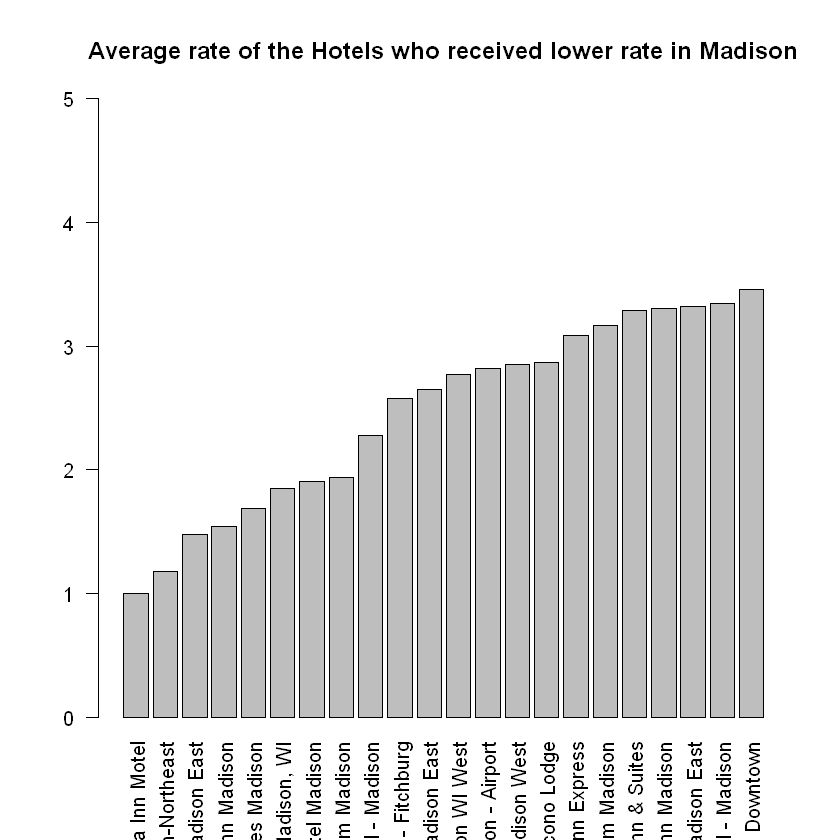

In [37]:
length(avg.hotel[which(avg.hotel< 3.5)])
par(cex.axis=1)
barplot(avg.hotel[avg.hotel < 3.5], main = "Average rate of the Hotels who received lower rate in Madison", ylim = c(0,5),las=2)
lowrate.Hotels <- names(avg.hotel[avg.hotel < 3.5])
lowrate.Hotels

22 of hotels in Madison area received less than 3.5 average rate out of 5.

In [38]:
rev <- c()
for(i in 1:22){
    rev[i] <- length(dat$stars_x[which(dat$name==lowrate.Hotels[i])])
}
sum(rev)

ref <- c()
for (i in 1:22){
   temp <- which(dat$name==lowrate.Hotels[i])
   ref <- c(ref,temp) 
}

[1] 567

They've got 567 reviews from the customers

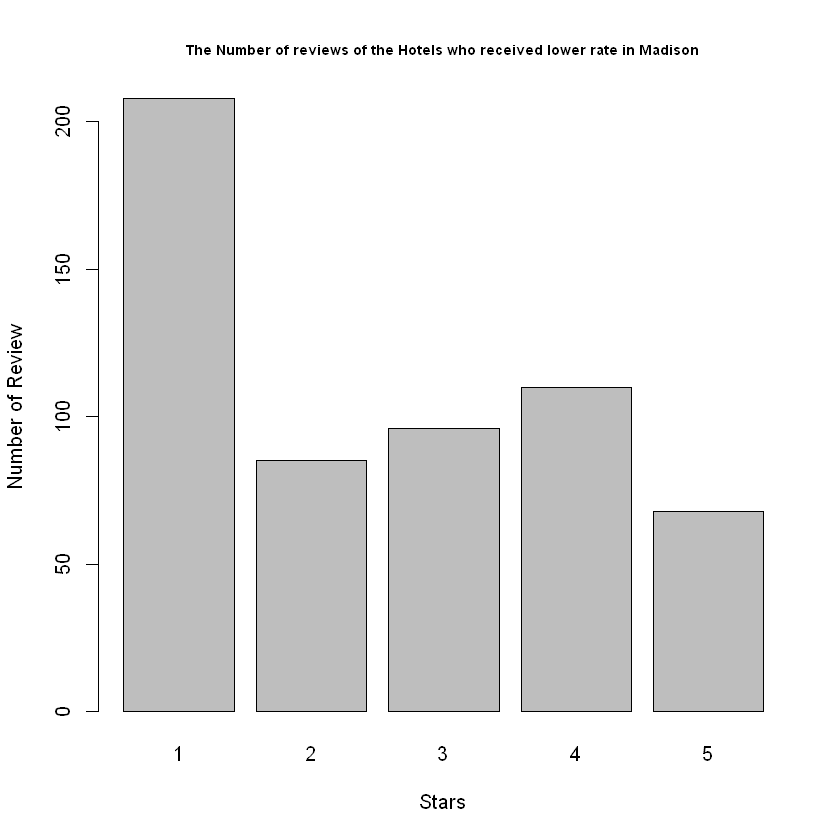

In [39]:
barplot(table(dat$stars_x[ref]),xlab="Stars",ylab="Number of Review", main="The Number of reviews of the Hotels who received lower rate in Madison", cex.main = 0.7)

In [40]:
lowerhotel.dat <- wordembedding.dat[ref,]
stars <- lowerhotel.dat[,1]
lowerhotel.dat <- cbind(stars, lowerhotel.dat[names(sort(words[words>summary(words)[5]], decreasing= TRUE))])
lowerhotel.dat$stars <- as.factor(lowerhotel.dat$stars)

In [41]:
head(lowerhotel.dat)

,stars,room,hotel,stay,staff,clean,breakfast,nice,great,bed,...,three,ac,wisconsin,given,set,may,window,reason,selection,cooky
1466,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1467,1,1,1,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1472,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1444,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1446,2,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1451,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dim(lowerhotel.dat)

[1] 567 344

In [43]:
lower.words <- apply(lowerhotel.dat[,2:dim(lowerhotel.dat)[2]],2,sum)
sort(lower.words, decreasing= TRUE)

room         hotel          stay         staff         clean 
          424           313           222           184           184 
        place         would           bed           one         night 
          181           175           173           165           162 
    breakfast          desk          like          nice           get 
          154           151           149           147           144 
         good         front          time        stayed         great 
          138           135           130           128           126 
      madison          pool         didnt         could          back 
          111           110           109           107           106 
     friendly          even           got          dont          area 
          102           100           100            96            94 
      service           day            go        really          work 
           93            92            92            91            91 
            u          free          well      bathroom          also 
           86            85            85            85            83 
     location   comfortable        people           lot          need 
           80            80            80            78            78 
         star         floor         never         first         water 
           78            77            76            75            73 
           X2           bar        around    restaurant         lobby 
           72            71            71            69            68 
         make         thing        better        little           hot 
           68            68            68            67            67 
           im         price         next.           two          door 
           66            66            66            65            65 
         went       morning         check         sleep          much 
           64            63            63            63            62 
          use          told    experience        shower        booked 
           62            62            61            61            61 
          inn          hour         wasnt           bad       parking 
           58            58            58            58            56 
       pretty          look        enough       staying       overall 
           56            56            55            54            54 
           tv         smell         small            X3          give 
           54            54            53            53            53 
         come          find           see          said         right 
           52            52            52            52            51 
          new        coffee          made          many       checked 
           51            51            51            51            51 
   everything      business          know       another       outside 
           50            50            49            49            49 
         food         going           say         guest         still 
           48            48            48            48            48 
      manager           old        review          take          want 
           47            47            47            46            46 
       called          wall          call         dirty          year 
           46            46            46            46            45 
       though          left        looked          best         close 
           45            45            45            44            44 
         sure         quiet        minute          cant         issue 
           44            44            44            44            44 
       decent       someone          ever          came         think 
           44            44            43            43            43 
          kid    definitely           ive           big          away 
           43            42            42            42            42 
        asked           put      

In [44]:
word.lower.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(lowerhotel.dat$stars == 1))
total.star2 <-length(which(lowerhotel.dat$stars == 2))
total.star3 <-length(which(lowerhotel.dat$stars == 3))
total.star4 <-length(which(lowerhotel.dat$stars == 4))
total.star5 <-length(which(lowerhotel.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(lowerhotel.dat$stars,lowerhotel.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=paste('lower.',ind))
}

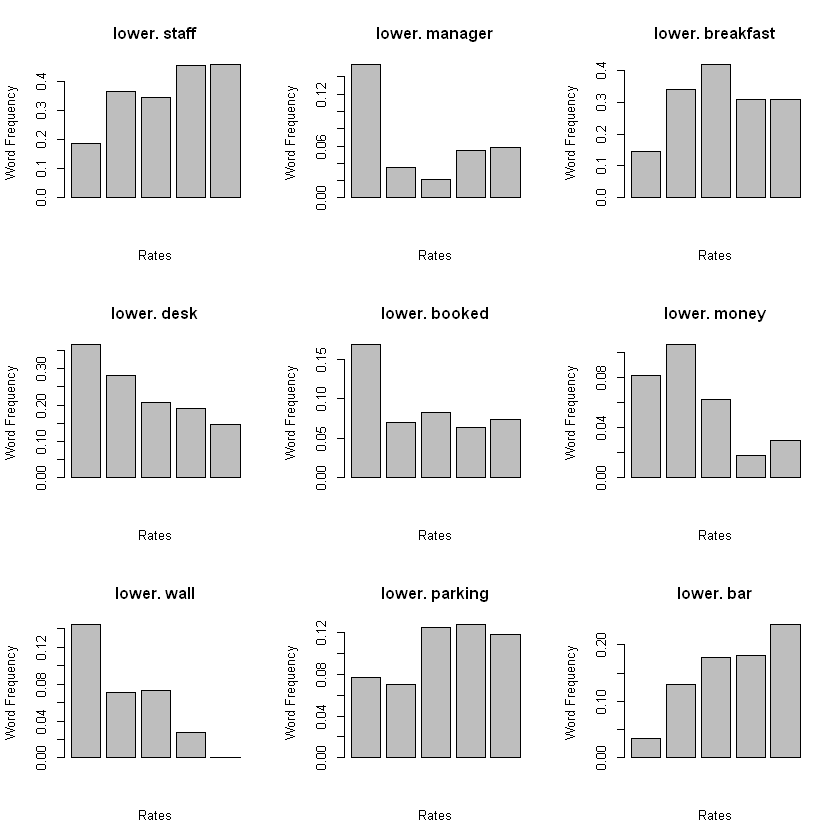

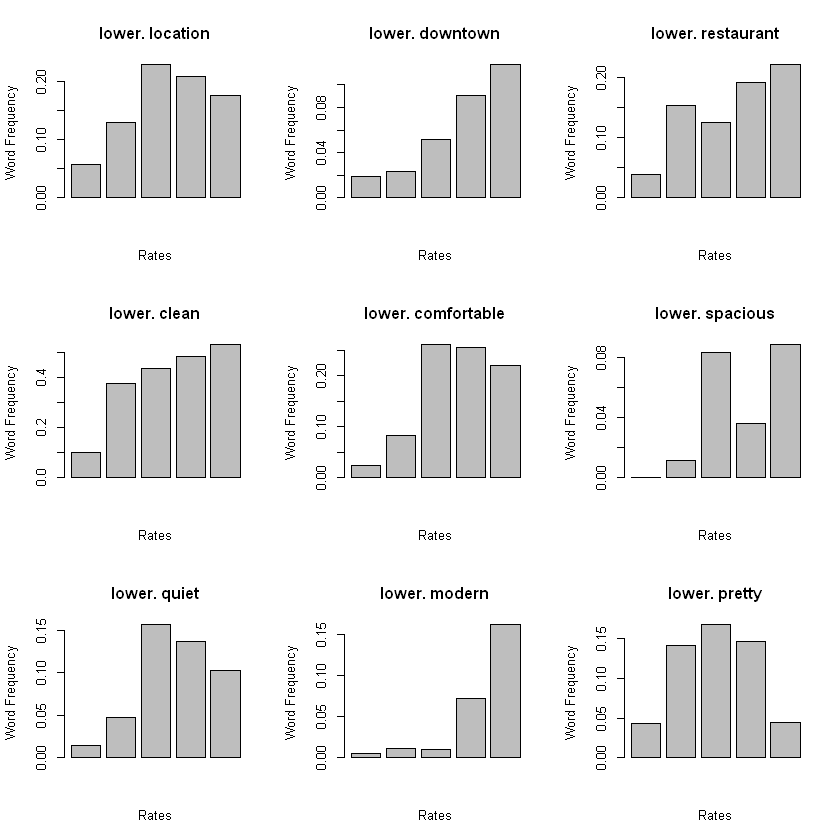

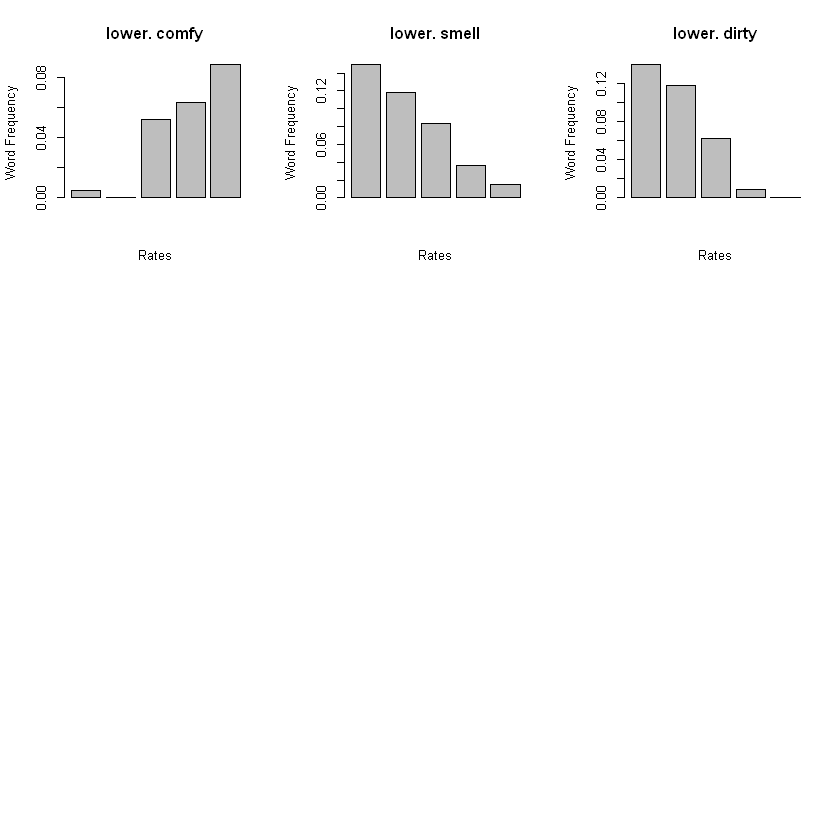

In [45]:
par(mfrow=c(3,3))
word.lower.frequency("staff")
word.lower.frequency("manager")
word.lower.frequency("breakfast")
word.lower.frequency("desk")
word.lower.frequency("booked")
word.lower.frequency("money")

word.lower.frequency("wall")
word.lower.frequency("parking")

word.lower.frequency("bar")
word.lower.frequency("location")
word.lower.frequency("downtown")
word.lower.frequency("restaurant")

word.lower.frequency("clean")
word.lower.frequency("comfortable")
word.lower.frequency("spacious")
word.lower.frequency("quiet")
word.lower.frequency("modern")
word.lower.frequency("pretty")
word.lower.frequency("comfy")
word.lower.frequency("smell")
word.lower.frequency("dirty")


## About the High Rated Hotels in Madison Area

[1] 23

[1] "La Quinta by Wyndham Madison American Center"   
 [2] "Clarion Suites at the Alliant Energy Center"    
 [3] "AmericInn by Wyndham Madison West"              
 [4] "Comfort Inn Madison - Downtown"                 
 [5] "Holiday Inn Madison at The American Center"     
 [6] "Fairfield Inn & Suites by Marriott Madison East"
 [7] "Hyatt Place Madison Downtown"                   
 [8] "Cambria Hotel Madison East"                     
 [9] "Staybridge Suites Madison-East"                 
[10] "Homewood Suites by Hilton Madison West"         
[11] "The Madison Concourse Hotel and Governor's Club"
[12] "Hampton Inn Madison East Towne Mall Area"       
[13] "Sleep Inn & Suites"                             
[14] "DoubleTree by Hilton Hotel Madison"             
[15] "Super 8 by Wyndham Madison South"               
[16] "Holiday Inn Express & Suites Madison"           
[17] "Hotel Ruby Marie"                               
[18] "Tru by Hilton Madison West"                     
[19] "Hampton Inn & Suites Madison-West"              
[20] "Hampton Inn & Suites Madison / Downtown"        
[21] "Holiday Inn Express & Suites Madison Central"   
[22] "SpringHill Suites Madison"                      
[23] "Hotel Indigo Madison Downtown"

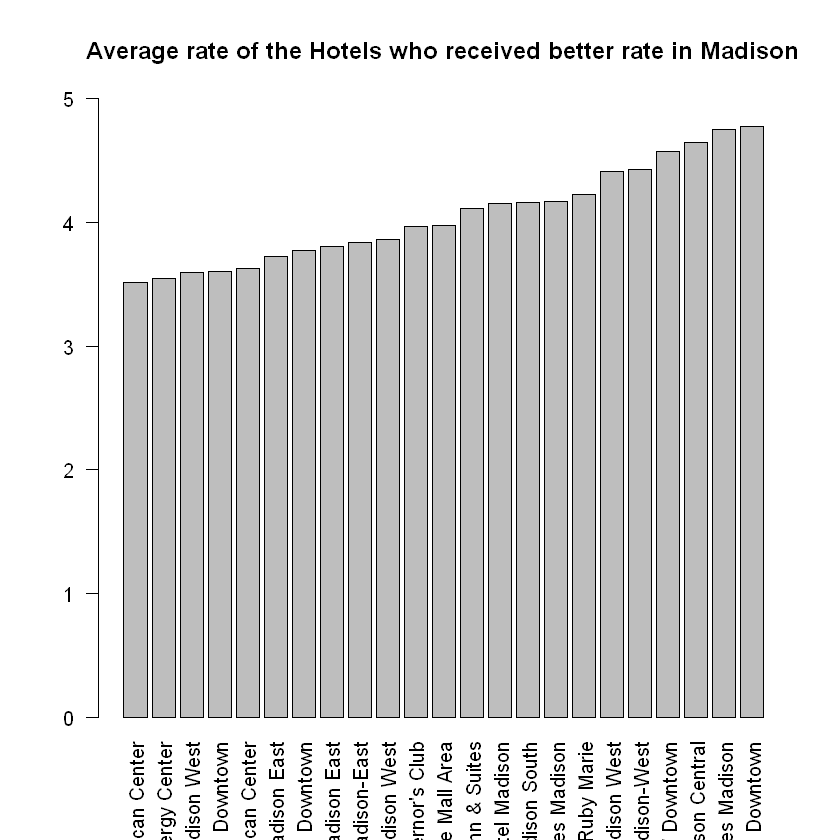

In [46]:
length(avg.hotel[avg.hotel > 3.5])
par(cex.axis=1)
barplot(avg.hotel[avg.hotel > 3.5], main = "Average rate of the Hotels who received better rate in Madison", ylim = c(0,5),las=2)
highrate.Hotels <- names(avg.hotel[avg.hotel > 3.5])
highrate.Hotels

There are 23 hotels who obtained higher average evaluation from the customers in Madison Area.

In [47]:
rev <- c()
for(i in 1:23){
    rev[i] <- length(dat$stars_x[which(dat$name==highrate.Hotels[i])])
}
sum(rev)

ref <- c()
for (i in 1:23){
   temp <- which(dat$name==highrate.Hotels[i])
   ref <- c(ref,temp) 
}

[1] 965

They've got 965 reviews from the customers

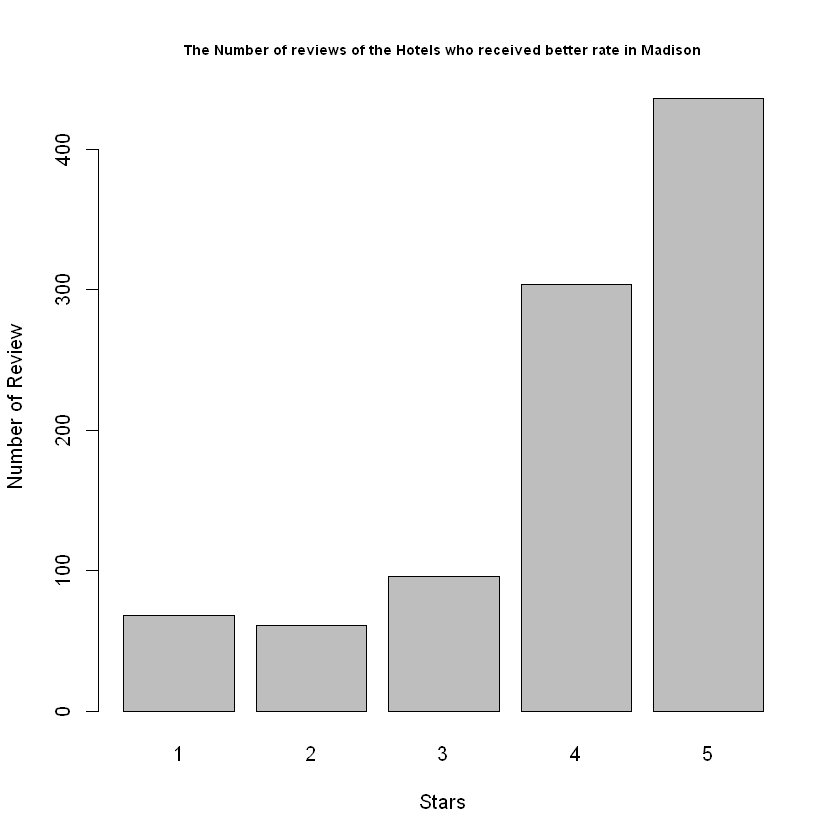

In [48]:
barplot(table(dat$stars_x[ref]),xlab="Stars",ylab="Number of Review", main="The Number of reviews of the Hotels who received better rate in Madison", cex.main = 0.7)

In [49]:
betterhotel.dat <- wordembedding.dat[ref,]
stars <- betterhotel.dat[,1]
betterhotel.dat <- cbind(stars, betterhotel.dat[names(sort(words[words>summary(words)[5]], decreasing= TRUE))])
betterhotel.dat$stars <- as.factor(betterhotel.dat$stars)

In [50]:
head(betterhotel.dat)

,stars,room,hotel,stay,staff,clean,breakfast,nice,great,bed,...,three,ac,wisconsin,given,set,may,window,reason,selection,cooky
26,2,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
35,5,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
36,4,1,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,3,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,4,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
80,5,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
dim(betterhotel.dat)

[1] 965 344

In [52]:
better.words <- apply(betterhotel.dat[,2:dim(betterhotel.dat)[2]],2,sum)
sort(better.words, decreasing= TRUE)

room         hotel          stay         staff     breakfast 
          723           661           465           435           430 
         nice         clean         great       madison           bed 
          412           409           394           311           292 
     location         place         night      friendly           one 
          289           283           279           278           277 
       stayed         would          good          free           get 
          271           266           264           258           253 
         desk          like          also          time        really 
          239           229           221           218           214 
        front          area   comfortable       service          pool 
          212           201           197           193           185 
      parking          well         didnt    restaurant             u 
          183           177           171           160           158 
         back           bar      bathroom           lot       staying 
          157           157           156           153           150 
          day          even       helpful         could    definitely 
          147           144           139           135           133 
          two            go         lobby       morning            im 
          131           130           128           123           122 
   everything          dont          make         price          much 
          122           121           118           118           118 
          got         right         super         floor         thing 
          117           117           117           116           116 
       little          food         next.          need           new 
          116           115           114           113           113 
        first        around         small          best         check 
          112           110           110           110           108 
     downtown    experience           hot          work        people 
          108           107           106           104           103 
          ive        shower     recommend           big         water 
          103           102           101           100            98 
       coffee           inn          made           way       shuttle 
           97            96            96            96            96 
        every        better       walking      spacious          hour 
           95            94            94            94            93 
        close        street       weekend        pretty           bit 
           92            92            92            91            91 
         went          star          many           use         suite 
           90            89            89            88            88 
        large         drink      business         going          sure 
           87            87            86            86            86 
         feel         never           say          come          door 
           86            84            84            83            82 
      overall          ever          easy            tv          year 
           82            82            82            81            80 
     distance            X2         guest          away       capitol 
           80            79            79            79            79 
    excellent        enough         quiet          walk          wifi 
           78            77            77            76            75 
       modern          look          find        always        minute 
           75            73            73            73            72 
     building         state       hampton          full       amazing 
           71            71            71            70            70 
         know          cant       nothing          town         youre 
           69            69            69            69            69 
        sleep        though      

In [53]:
word.better.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(betterhotel.dat$stars == 1))
total.star2 <-length(which(betterhotel.dat$stars == 2))
total.star3 <-length(which(betterhotel.dat$stars == 3))
total.star4 <-length(which(betterhotel.dat$stars == 4))
total.star5 <-length(which(betterhotel.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(betterhotel.dat$stars,betterhotel.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main = paste('better.',ind))
}

## Comparing the Frequency of Keywords of Low Rated Hotel and High Rated Hotel

Warning message in cbind(lower.stars, better.stars):
"number of rows of result is not a multiple of vector length (arg 1)"

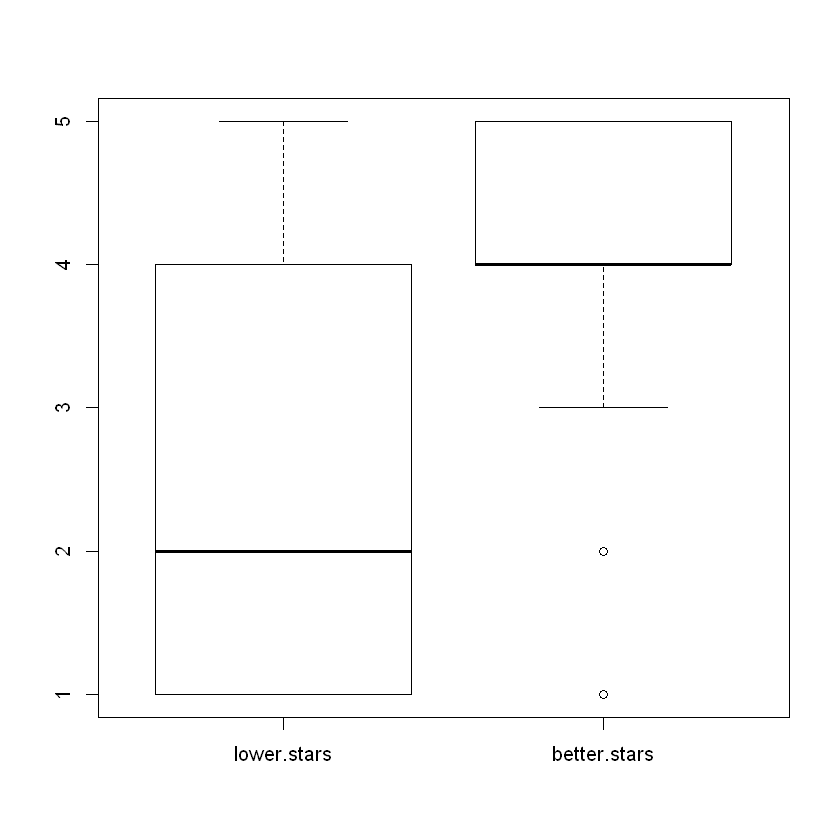

In [54]:
lower.stars <- lowerhotel.dat$stars
better.stars <- betterhotel.dat$stars
boxplot(cbind(lower.stars,better.stars))

Through the box plots, we noticed there are mean difference between high rated hotel and low rated hotel.
For the next step, we will investigate the factor that impacts on the evaluation. We brought several statistical significant words we previously obtained to test which words makes difference between high rated hotel and low rated hotel.

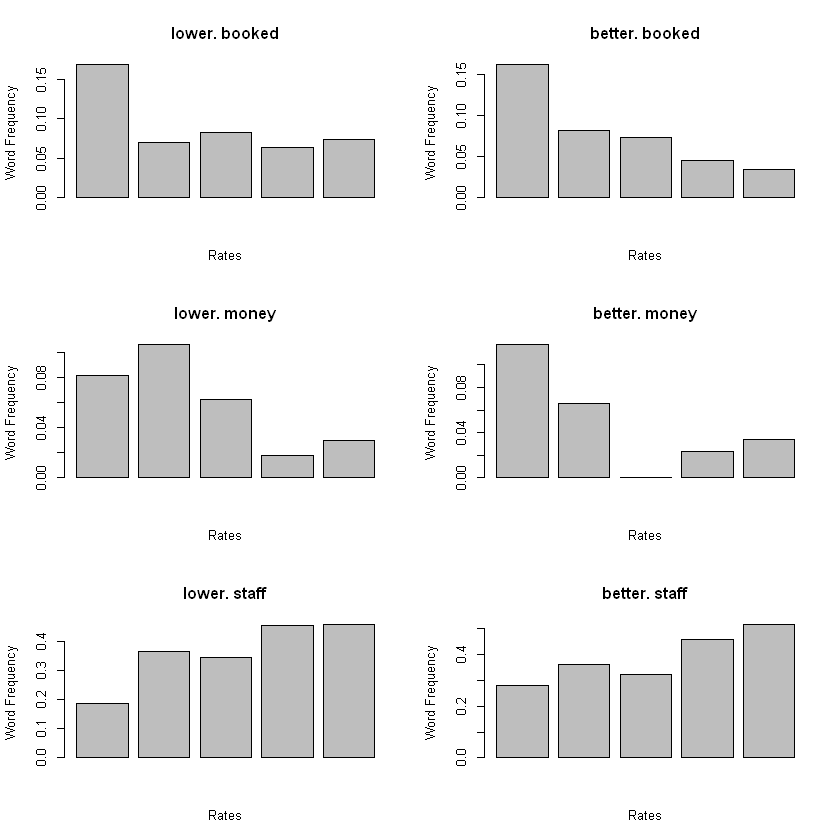

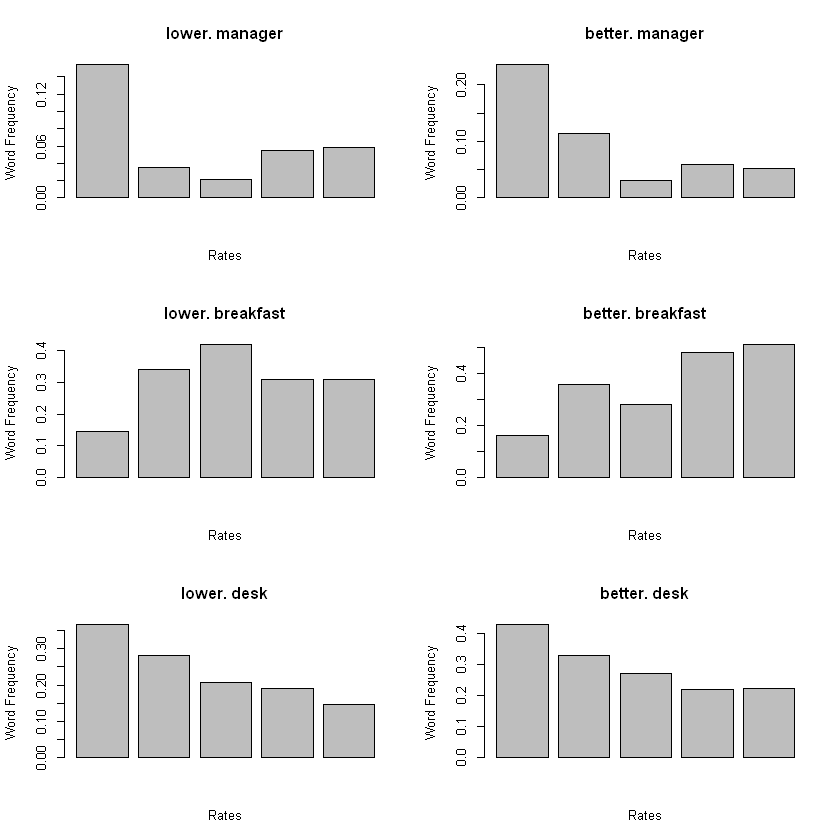

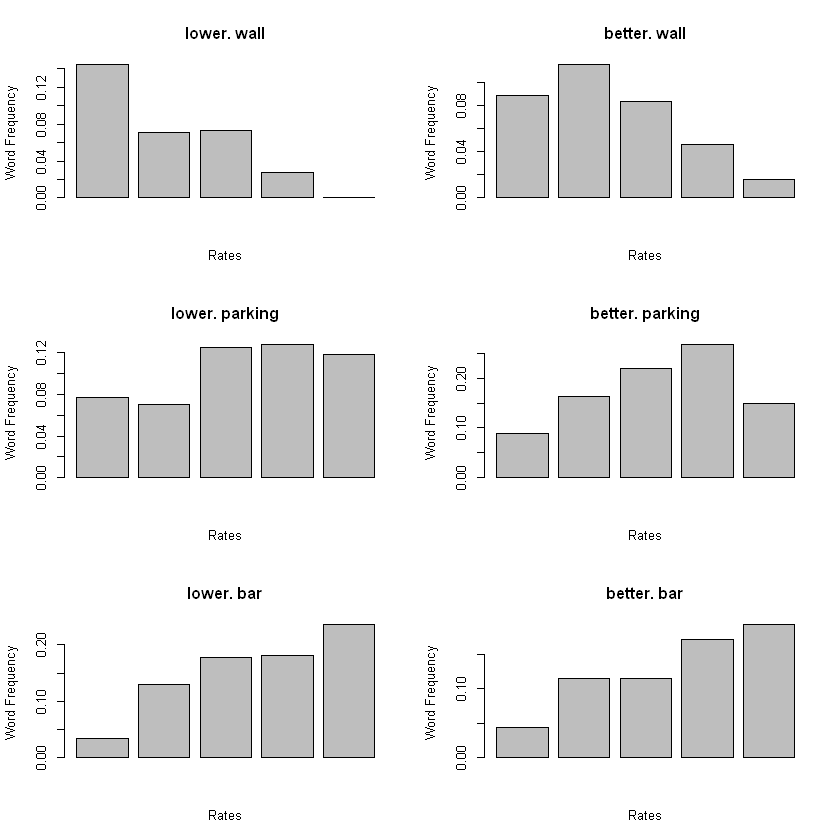

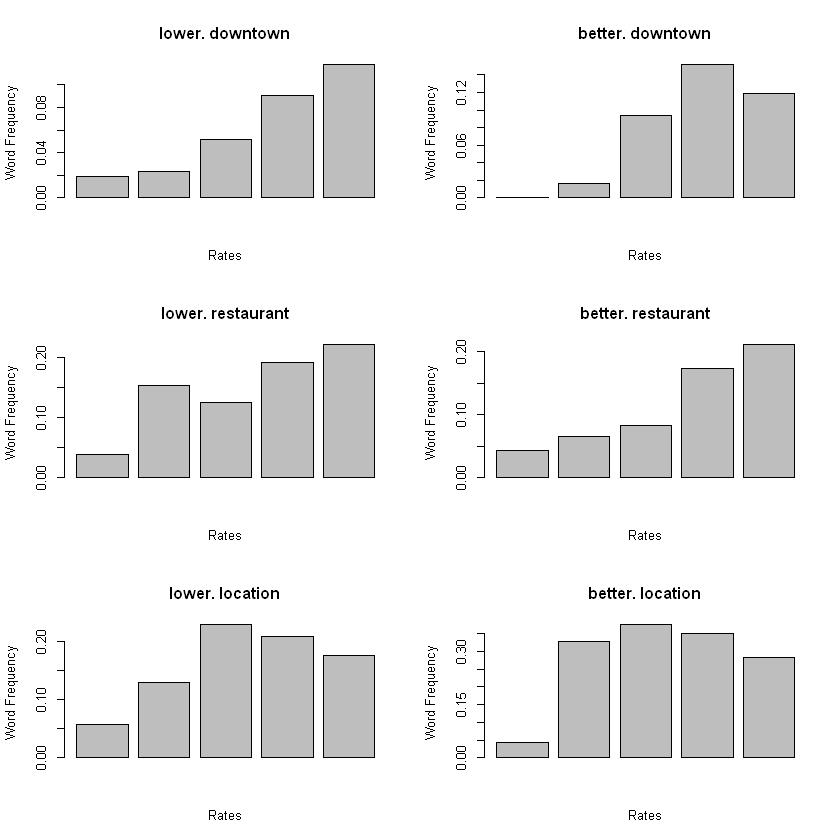

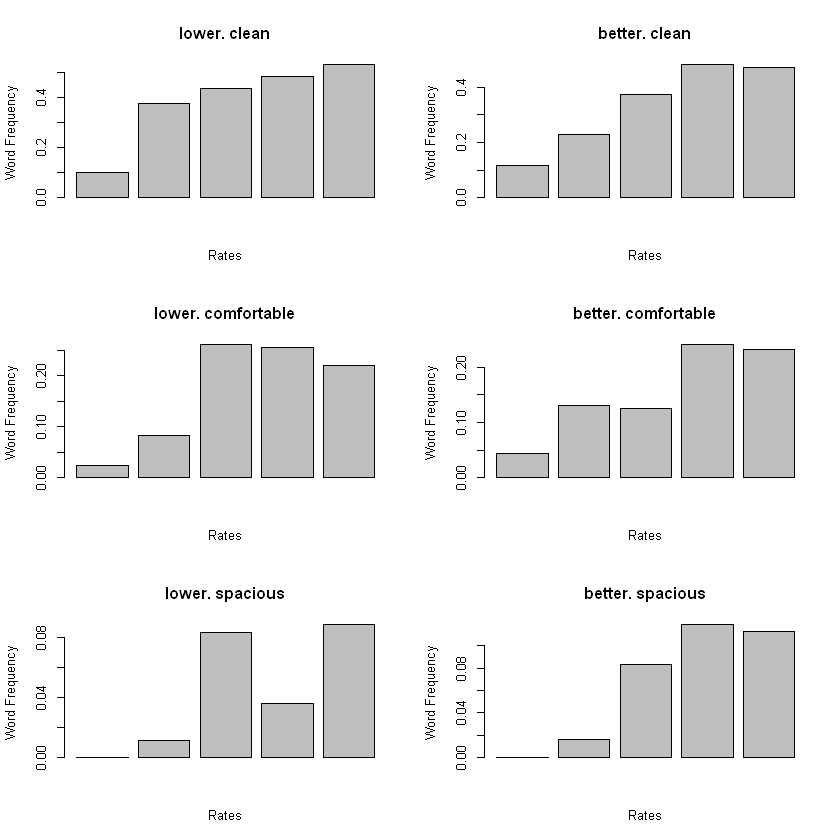

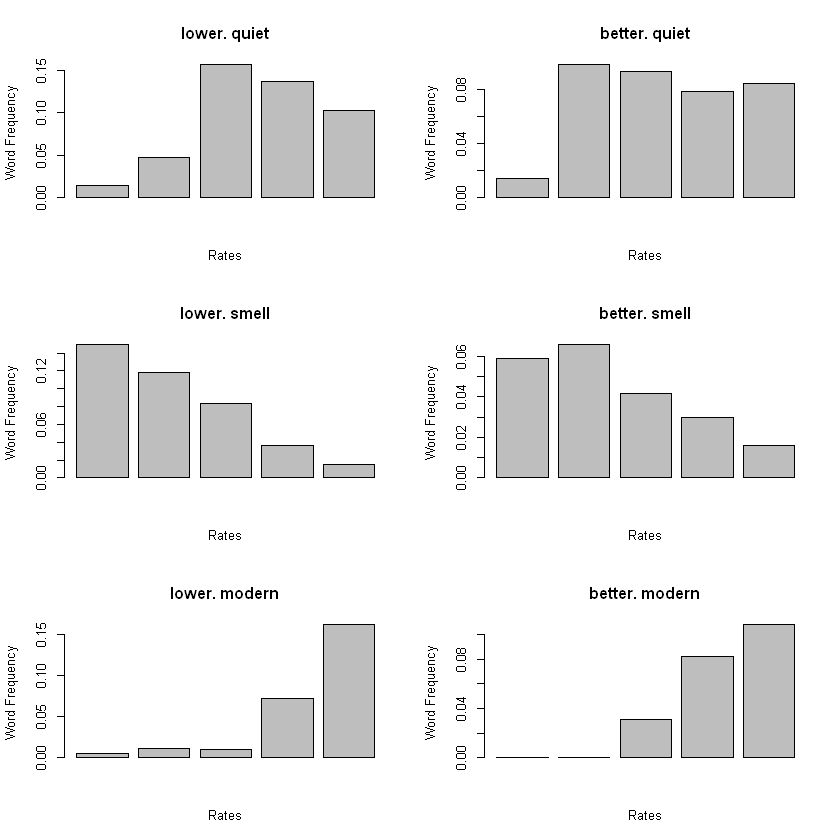

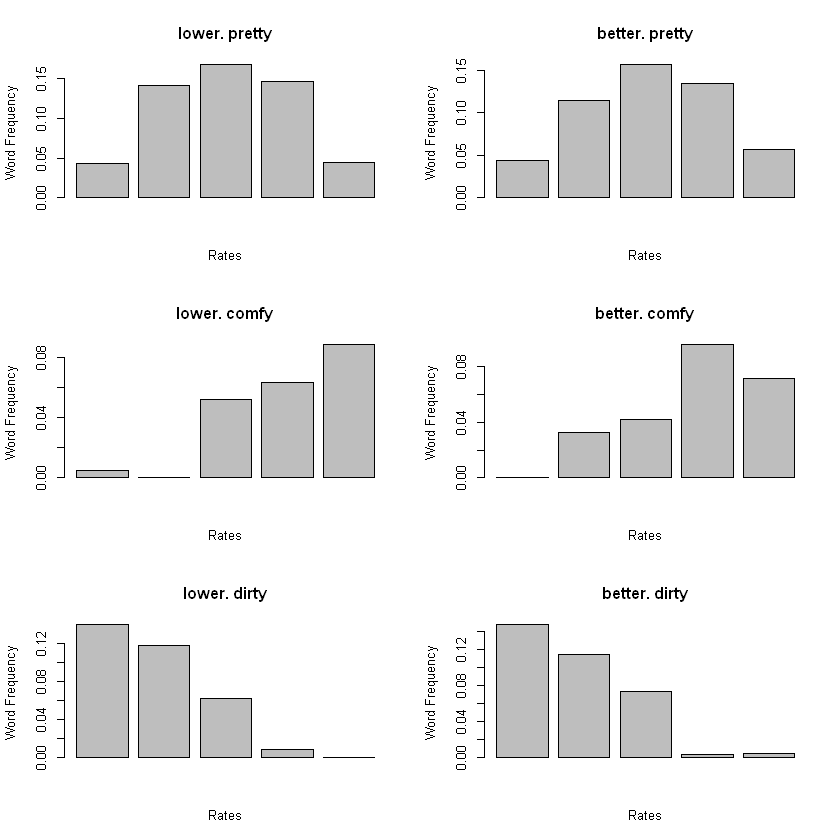

In [55]:
par(mfrow=c(3,2))


word.lower.frequency("booked")
word.better.frequency("booked")

word.lower.frequency("money")
word.better.frequency("money")

word.lower.frequency("staff")
word.better.frequency("staff")

word.lower.frequency("manager")
word.better.frequency("manager")

word.lower.frequency("breakfast")
word.better.frequency("breakfast")

word.lower.frequency("desk")
word.better.frequency("desk")

word.lower.frequency("wall")
word.better.frequency("wall")

word.lower.frequency("parking")
word.better.frequency("parking")

word.lower.frequency("bar")
word.better.frequency("bar")

word.lower.frequency("downtown")
word.better.frequency("downtown")

word.lower.frequency("restaurant")
word.better.frequency("restaurant")

word.lower.frequency("location")
word.better.frequency("location")

word.lower.frequency("clean")
word.better.frequency("clean")

word.lower.frequency("comfortable")
word.better.frequency("comfortable")

word.lower.frequency("spacious")
word.better.frequency("spacious")

word.lower.frequency("quiet")
word.better.frequency("quiet")

word.lower.frequency("smell")
word.better.frequency("smell")

word.lower.frequency("modern")
word.better.frequency("modern")

word.lower.frequency("pretty")
word.better.frequency("pretty")

word.lower.frequency("comfy")
word.better.frequency("comfy")

word.lower.frequency("dirty")
word.better.frequency("dirty")

To see whether there are statistical differences in frequency rate of words in high evaluation range(3,4,5) between the low rated hotels and high rated hotels, we performed proportion test on the proportion of frequencies of words in the star range of 3 to 5.

In [56]:
#porportion function
test.proportion <- function(star,argument1){
ind <- argument1
total.lower.star1 <-length(which(lowerhotel.dat$stars == 1))
total.lower.star2 <-length(which(lowerhotel.dat$stars == 2))
total.lower.star3 <-length(which(lowerhotel.dat$stars == 3))
total.lower.star4 <-length(which(lowerhotel.dat$stars == 4))
total.lower.star5 <-length(which(lowerhotel.dat$stars == 5))
total.lower.v <- c(total.lower.star1,total.lower.star2,total.lower.star3,total.lower.star4,total.lower.star5)

freq.lower.dat <- cbind(lowerhotel.dat$stars, lowerhotel.dat[,ind])
lower.star1 <-length(which(freq.lower.dat[,1] == 1 & freq.lower.dat[,2] == 1))
lower.star2 <-length(which(freq.lower.dat[,1] == 2 & freq.lower.dat[,2] == 1))
lower.star3 <-length(which(freq.lower.dat[,1] == 3 & freq.lower.dat[,2] == 1))
lower.star4 <-length(which(freq.lower.dat[,1] == 4 & freq.lower.dat[,2] == 1))
lower.star5 <-length(which(freq.lower.dat[,1] == 5 & freq.lower.dat[,2] == 1))
lower.v <- c(lower.star1, lower.star2, lower.star3, lower.star4, lower.star5)

lower.dat <- cbind(lower.v,total.lower.v)

total.better.star1 <-length(which(betterhotel.dat$stars == 1))
total.better.star2 <-length(which(betterhotel.dat$stars == 2))
total.better.star3 <-length(which(betterhotel.dat$stars == 3))
total.better.star4 <-length(which(betterhotel.dat$stars == 4))
total.better.star5 <-length(which(betterhotel.dat$stars == 5))
total.better.v <- c(total.better.star1,total.better.star2,total.better.star3,total.better.star4,total.better.star5)

freq.better.dat <- cbind(betterhotel.dat$stars, betterhotel.dat[,ind])
better.star1 <-length(which(freq.better.dat[,1] == 1 & freq.better.dat[,2] == 1))
better.star2 <-length(which(freq.better.dat[,1] == 2 & freq.better.dat[,2] == 1))
better.star3 <-length(which(freq.better.dat[,1] == 3 & freq.better.dat[,2] == 1))
better.star4 <-length(which(freq.better.dat[,1] == 4 & freq.better.dat[,2] == 1))
better.star5 <-length(which(freq.better.dat[,1] == 5 & freq.better.dat[,2] == 1))
better.v <- c(better.star1, better.star2, better.star3, better.star4, better.star5)

better.dat <- cbind(better.v,total.better.v)

prop.test(x=c(lower.dat[star,1],better.dat[star,1]),n=c(lower.dat[star,2],better.dat[star,2]))
}

In [57]:
test.proportion(3,"booked")
test.proportion(4,"booked")
test.proportion(5,"booked")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 5.7048e-32, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07590610  0.09673944
sample estimates:
    prop 1     prop 2 
0.08333333 0.07291667 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.21776, df = 1, p-value = 0.6408
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03994893  0.07511639
sample estimates:
    prop 1     prop 2 
0.06363636 0.04605263 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.4479, df = 1, p-value = 0.2289
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03372529  0.11197677
sample estimates:
    prop 1     prop 2 
0.07352941 0.03440367 


In [58]:
test.proportion(3,"money")
test.proportion(4,"money")
test.proportion(5,"money")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 4.3011, df = 1, p-value = 0.03809
alternative hypothesis: two.sided
95 percent confidence interval:
 0.003661846 0.121338154
sample estimates:
prop 1 prop 2 
0.0625 0.0000 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.2517e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03981667  0.03012767
sample estimates:
    prop 1     prop 2 
0.01818182 0.02302632 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 5.6237e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05363417  0.04365036
sample estimates:
    prop 1     prop 2 
0.02941176 0.03440367 


In [59]:
test.proportion(3,"staff")
test.proportion(4,"staff")
test.proportion(5,"staff")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.023438, df = 1, p-value = 0.8783
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1229094  0.1645761
sample estimates:
   prop 1    prop 2 
0.3437500 0.3229167 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.6491e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1139849  0.1086021
sample estimates:
   prop 1    prop 2 
0.4545455 0.4572368 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.57382, df = 1, p-value = 0.4487
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.19371328  0.07795505
sample estimates:
   prop 1    prop 2 
0.4558824 0.5137615 


In [60]:
test.proportion(3,"manager")
test.proportion(4,"manager")
test.proportion(5,"manager")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06586310  0.04502977
sample estimates:
    prop 1     prop 2 
0.02083333 0.03125000 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.0752e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05937871  0.05004857
sample estimates:
    prop 1     prop 2 
0.05454545 0.05921053 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.2389e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05973150  0.07187398
sample estimates:
    prop 1     prop 2 
0.05882353 0.05275229 


In [61]:
test.proportion(3,"breakfast")
test.proportion(4,"breakfast")
test.proportion(5,"breakfast")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.3013, df = 1, p-value = 0.06923
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.008472563  0.279305896
sample estimates:
   prop 1    prop 2 
0.4166667 0.2812500 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 9.2951, df = 1, p-value = 0.002298
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.28367363 -0.06524981
sample estimates:
   prop 1    prop 2 
0.3090909 0.4835526 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 8.878, df = 1, p-value = 0.002886
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.33055861 -0.07473011
sample estimates:
   prop 1    prop 2 
0.3088235 0.5114679 


In [62]:
test.proportion(3,"desk")
test.proportion(4,"desk")
test.proportion(5,"desk")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.71471, df = 1, p-value = 0.3979
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.19334106  0.06834106
sample estimates:
   prop 1    prop 2 
0.2083333 0.2708333 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.26188, df = 1, p-value = 0.6088
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.12265514  0.06368384
sample estimates:
   prop 1    prop 2 
0.1909091 0.2203947 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.5752, df = 1, p-value = 0.2094
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.17670817  0.02587169
sample estimates:
   prop 1    prop 2 
0.1470588 0.2224771 


In [63]:
test.proportion(3,"wall")
test.proportion(4,"wall")
test.proportion(5,"wall")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 5.7048e-32, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09673944  0.07590610
sample estimates:
    prop 1     prop 2 
0.07291667 0.08333333 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.32513, df = 1, p-value = 0.5685
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06346154  0.02590173
sample estimates:
    prop 1     prop 2 
0.02727273 0.04605263 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.24518, df = 1, p-value = 0.6205
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.036352440  0.004242348
sample estimates:
    prop 1     prop 2 
0.00000000 0.01605505 


In [64]:
test.proportion(3,"parking")
test.proportion(4,"parking")
test.proportion(5,"parking")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.3419, df = 1, p-value = 0.1259
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.21006849  0.02256849
sample estimates:
 prop 1  prop 2 
0.12500 0.21875 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 8.0789, df = 1, p-value = 0.004478
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.2250442 -0.0533051
sample estimates:
   prop 1    prop 2 
0.1272727 0.2664474 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.24983, df = 1, p-value = 0.6172
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.12349314  0.06062212
sample estimates:
   prop 1    prop 2 
0.1176471 0.1490826 


In [65]:
test.proportion(3,"bar")
test.proportion(4,"bar")
test.proportion(5,"bar")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.0453, df = 1, p-value = 0.3066
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04736972  0.17236972
sample estimates:
   prop 1    prop 2 
0.1770833 0.1145833 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.01177, df = 1, p-value = 0.9136
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07901183  0.10054293
sample estimates:
   prop 1    prop 2 
0.1818182 0.1710526 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.43094, df = 1, p-value = 0.5115
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07326772  0.15853485
sample estimates:
   prop 1    prop 2 
0.2352941 0.1926606 


In [66]:
test.proportion(3,"downtown")
test.proportion(4,"downtown")
test.proportion(5,"downtown")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.69342, df = 1, p-value = 0.405
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.12539981  0.04206647
sample estimates:
    prop 1     prop 2 
0.05208333 0.09375000 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.0298, df = 1, p-value = 0.1542
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.13374523  0.01293184
sample estimates:
    prop 1     prop 2 
0.09090909 0.15131579 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.3825e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.08563772  0.08239973
sample estimates:
   prop 1    prop 2 
0.1176471 0.1192661 


In [67]:
test.proportion(3,"restaurant")
test.proportion(4,"restaurant")
test.proportion(5,"restaurant")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.50233, df = 1, p-value = 0.4785
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05496704  0.13830038
sample estimates:
    prop 1     prop 2 
0.12500000 0.08333333 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.059249, df = 1, p-value = 0.8077
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0745536  0.1076876
sample estimates:
   prop 1    prop 2 
0.1909091 0.1743421 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.00040979, df = 1, p-value = 0.9838
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1046537  0.1238118
sample estimates:
   prop 1    prop 2 
0.2205882 0.2110092 


In [68]:
test.proportion(3,"location")
test.proportion(4,"location")
test.proportion(5,"location")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 4.175, df = 1, p-value = 0.04102
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.284496708 -0.007169958
sample estimates:
   prop 1    prop 2 
0.2291667 0.3750000 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 7.0064, df = 1, p-value = 0.008122
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.24211803 -0.04364752
sample estimates:
   prop 1    prop 2 
0.2090909 0.3519737 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.8305, df = 1, p-value = 0.09249
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.214110686  0.002831679
sample estimates:
   prop 1    prop 2 
0.1764706 0.2821101 


In [69]:
test.proportion(3,"clean")
test.proportion(4,"clean")
test.proportion(5,"clean")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.53981, df = 1, p-value = 0.4625
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0865747  0.2115747
sample estimates:
prop 1 prop 2 
0.4375 0.3750 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 9.0162e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1089643  0.1120743
sample estimates:
   prop 1    prop 2 
0.4818182 0.4802632 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.60668, df = 1, p-value = 0.436
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07682136  0.19527792
sample estimates:
   prop 1    prop 2 
0.5294118 0.4701835 


In [70]:
test.proportion(3,"comfortable")
test.proportion(4,"comfortable")
test.proportion(5,"comfortable")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 4.8209, df = 1, p-value = 0.02812
alternative hypothesis: two.sided
95 percent confidence interval:
 0.01507465 0.25575868
sample estimates:
   prop 1    prop 2 
0.2604167 0.1250000 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.029617, df = 1, p-value = 0.8634
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.08628731  0.11511506
sample estimates:
   prop 1    prop 2 
0.2545455 0.2401316 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.0021816, df = 1, p-value = 0.9627
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1257741  0.1036478
sample estimates:
   prop 1    prop 2 
0.2205882 0.2316514 


In [71]:
test.proportion(3,"spacious")
test.proportion(4,"spacious")
test.proportion(5,"spacious")


	2-sample test for equality of proportions without continuity
	correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07818844  0.07818844
sample estimates:
    prop 1     prop 2 
0.08333333 0.08333333 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 5.3265, df = 1, p-value = 0.021
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.13867510 -0.02543973
sample estimates:
    prop 1     prop 2 
0.03636364 0.11842105 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.1482, df = 1, p-value = 0.7003
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.10629542  0.05799537
sample estimates:
    prop 1     prop 2 
0.08823529 0.11238532 


In [72]:
test.proportion(3,"quiet")
test.proportion(4,"quiet")
test.proportion(5,"quiet")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.1905, df = 1, p-value = 0.2752
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04105726  0.16605726
sample estimates:
 prop 1  prop 2 
0.15625 0.09375 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.484, df = 1, p-value = 0.115
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01970774  0.13454028
sample estimates:
    prop 1     prop 2 
0.13636364 0.07894737 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.067743, df = 1, p-value = 0.7947
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06723866  0.10339624
sample estimates:
    prop 1     prop 2 
0.10294118 0.08486239 


In [73]:
test.proportion(3,"smell")
test.proportion(4,"smell")
test.proportion(5,"smell")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.8, df = 1, p-value = 0.3711
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03697423  0.12030756
sample estimates:
    prop 1     prop 2 
0.08333333 0.04166667 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.00085734, df = 1, p-value = 0.9766
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03926589  0.05278264
sample estimates:
    prop 1     prop 2 
0.03636364 0.02960526 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.7804e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03364559  0.03094726
sample estimates:
    prop 1     prop 2 
0.01470588 0.01605505 


In [74]:
test.proportion(3,"modern")
test.proportion(4,"modern")
test.proportion(5,"modern")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.25532, df = 1, p-value = 0.6134
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07154740  0.02988073
sample estimates:
    prop 1     prop 2 
0.01041667 0.03125000 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.012132, df = 1, p-value = 0.9123
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07322203  0.05420289
sample estimates:
    prop 1     prop 2 
0.07272727 0.08223684 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.1941, df = 1, p-value = 0.2745
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0467695  0.1547026
sample estimates:
   prop 1    prop 2 
0.1617647 0.1077982 


In [75]:
test.proportion(3,"pretty")
test.proportion(4,"pretty")
test.proportion(5,"pretty")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.0347e-32, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1040822  0.1249155
sample estimates:
   prop 1    prop 2 
0.1666667 0.1562500 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.013147, df = 1, p-value = 0.9087
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07186127  0.09303352
sample estimates:
   prop 1    prop 2 
0.1454545 0.1348684 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.024999, df = 1, p-value = 0.8744
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07518716  0.04874356
sample estimates:
    prop 1     prop 2 
0.04411765 0.05733945 


In [76]:
test.proportion(3,"comfy")
test.proportion(4,"comfy")
test.proportion(5,"comfy")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05977797  0.08061130
sample estimates:
    prop 1     prop 2 
0.05208333 0.04166667 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.66508, df = 1, p-value = 0.4148
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09426341  0.03074666
sample estimates:
    prop 1     prop 2 
0.06363636 0.09539474 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.064476, df = 1, p-value = 0.7996
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06296620  0.09723496
sample estimates:
    prop 1     prop 2 
0.08823529 0.07110092 


In [77]:
test.proportion(3,"dirty")
test.proportion(4,"dirty")
test.proportion(5,"dirty")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09189430  0.07106096
sample estimates:
    prop 1     prop 2 
0.06250000 0.07291667 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 7.6536e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01886849  0.03047137
sample estimates:
     prop 1      prop 2 
0.009090909 0.003289474 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.7217e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.015517071  0.006342759
sample estimates:
     prop 1      prop 2 
0.000000000 0.004587156 


High rated hotels in Madison area tend to have different relative frequency in the words,"money","breakfast","parking","location","comfortable" and "spacious"

We also performed proportion test on the frequencies words in star range of 1 to 2 to see whether there are statistical differences in frequency rate of words in low evaluation range(1,2) between the low rated hotels and high rated hotels.

In [78]:
test.proportion(1,"booked")
test.proportion(2,"booked")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.2425e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1012171  0.1142262
sample estimates:
   prop 1    prop 2 
0.1682692 0.1617647 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.9239e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1105288  0.0877708
sample estimates:
    prop 1     prop 2 
0.07058824 0.08196721 


In [79]:
test.proportion(1,"money")
test.proportion(2,"money")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.42572, df = 1, p-value = 0.5141
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.13082181  0.05898923
sample estimates:
    prop 1     prop 2 
0.08173077 0.11764706 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.30122, df = 1, p-value = 0.5831
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06397716  0.14459433
sample estimates:
    prop 1     prop 2 
0.10588235 0.06557377 


In [80]:
test.proportion(1,"staff")
test.proportion(2,"staff")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.0838, df = 1, p-value = 0.1489
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.22078078  0.03695725
sample estimates:
   prop 1    prop 2 
0.1875000 0.2794118 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 6.2413e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1580888  0.1661891
sample estimates:
   prop 1    prop 2 
0.3647059 0.3606557 


In [81]:
test.proportion(1,"manager")
test.proportion(2,"manager")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.8333, df = 1, p-value = 0.1757
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.2033156  0.0404197
sample estimates:
   prop 1    prop 2 
0.1538462 0.2352941 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.3794, df = 1, p-value = 0.1229
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.18262384  0.02370388
sample estimates:
    prop 1     prop 2 
0.03529412 0.11475410 


In [82]:
test.proportion(1,"breakfast")
test.proportion(2,"breakfast")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.024506, df = 1, p-value = 0.8756
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.12698870  0.09192082
sample estimates:
   prop 1    prop 2 
0.1442308 0.1617647 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.0045564, df = 1, p-value = 0.9462
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1906549  0.1516963
sample estimates:
   prop 1    prop 2 
0.3411765 0.3606557 


In [83]:
test.proportion(1,"desk")
test.proportion(2,"desk")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.57283, df = 1, p-value = 0.4491
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.20537917  0.08320722
sample estimates:
   prop 1    prop 2 
0.3653846 0.4264706 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.1667, df = 1, p-value = 0.6831
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.2113691  0.1203372
sample estimates:
   prop 1    prop 2 
0.2823529 0.3278689 


In [84]:
test.proportion(1,"wall")
test.proportion(2,"wall")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.966, df = 1, p-value = 0.3257
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03637073  0.14836168
sample estimates:
    prop 1     prop 2 
0.14423077 0.08823529 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.39633, df = 1, p-value = 0.529
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.15500380  0.06667208
sample estimates:
    prop 1     prop 2 
0.07058824 0.11475410 


In [85]:
test.proportion(1,"parking")
test.proportion(2,"parking")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.0016902, df = 1, p-value = 0.9672
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09759450  0.07497007
sample estimates:
    prop 1     prop 2 
0.07692308 0.08823529 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.2868, df = 1, p-value = 0.1305
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.21511122  0.02841884
sample estimates:
    prop 1     prop 2 
0.07058824 0.16393443 


In [86]:
test.proportion(1,"bar")
test.proportion(2,"bar")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.00073359, df = 1, p-value = 0.9784
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07483709  0.05390949
sample estimates:
    prop 1     prop 2 
0.03365385 0.04411765 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.00010999, df = 1, p-value = 0.9916
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1066083  0.1359237
sample estimates:
   prop 1    prop 2 
0.1294118 0.1147541 


In [87]:
test.proportion(1,"downtown")
test.proportion(2,"downtown")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.32205, df = 1, p-value = 0.5704
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.009189736  0.047651275
sample estimates:
    prop 1     prop 2 
0.01923077 0.00000000 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 6.1538e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04531895  0.05959089
sample estimates:
    prop 1     prop 2 
0.02352941 0.01639344 


In [88]:
test.proportion(1,"restaurant")
test.proportion(2,"restaurant")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.5262e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06667782  0.05536561
sample estimates:
    prop 1     prop 2 
0.03846154 0.04411765 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.8541, df = 1, p-value = 0.1733
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0252690  0.2000038
sample estimates:
    prop 1     prop 2 
0.15294118 0.06557377 


In [89]:
test.proportion(1,"location")
test.proportion(2,"location")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.014534, df = 1, p-value = 0.904
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05437460  0.08152392
sample estimates:
    prop 1     prop 2 
0.05769231 0.04411765 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 7.2187, df = 1, p-value = 0.007215
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.35026600 -0.04664817
sample estimates:
   prop 1    prop 2 
0.1294118 0.3278689 


In [90]:
test.proportion(1,"clean")
test.proportion(2,"clean")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.026163, df = 1, p-value = 0.8715
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.11327885  0.07990781
sample estimates:
   prop 1    prop 2 
0.1009615 0.1176471 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.9059, df = 1, p-value = 0.08825
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01457807  0.30850285
sample estimates:
   prop 1    prop 2 
0.3764706 0.2295082 


In [91]:
test.proportion(1,"comfortable")
test.proportion(2,"comfortable")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.19401, df = 1, p-value = 0.6596
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.08289844  0.04274007
sample estimates:
    prop 1     prop 2 
0.02403846 0.04411765 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.46429, df = 1, p-value = 0.4956
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.16578704  0.06819784
sample estimates:
    prop 1     prop 2 
0.08235294 0.13114754 


In [92]:
test.proportion(1,"spacious")
test.proportion(2,"spacious")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions without continuity
	correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = NaN, df = 1, p-value = NA
alternative hypothesis: two.sided
95 percent confidence interval:
 0 0
sample estimates:
prop 1 prop 2 
     0      0 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.4484e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04851156  0.03925408
sample estimates:
    prop 1     prop 2 
0.01176471 0.01639344 


In [93]:
test.proportion(1,"quiet")
test.proportion(2,"quiet")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.6308e-32, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03344539  0.03287977
sample estimates:
    prop 1     prop 2 
0.01442308 0.01470588 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.77122, df = 1, p-value = 0.3798
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.15262564  0.05002198
sample estimates:
    prop 1     prop 2 
0.04705882 0.09836066 


In [94]:
test.proportion(1,"smell")
test.proportion(2,"smell")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.996, df = 1, p-value = 0.08347
alternative hypothesis: two.sided
95 percent confidence interval:
 0.00649951 0.17393035
sample estimates:
    prop 1     prop 2 
0.14903846 0.05882353 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.59134, df = 1, p-value = 0.4419
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05447246  0.15861903
sample estimates:
    prop 1     prop 2 
0.11764706 0.06557377 


In [95]:
test.proportion(1,"modern")
test.proportion(2,"modern")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 9.4955e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.009400225  0.019015610
sample estimates:
     prop 1      prop 2 
0.004807692 0.000000000 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 1.5412e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.02292236  0.04645177
sample estimates:
    prop 1     prop 2 
0.01176471 0.00000000 


In [96]:
test.proportion(1,"pretty")
test.proportion(2,"pretty")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 2.3421e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05779393  0.05609710
sample estimates:
    prop 1     prop 2 
0.04326923 0.04411765 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.047798, df = 1, p-value = 0.8269
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0966377  0.1494824
sample estimates:
   prop 1    prop 2 
0.1411765 0.1147541 


In [97]:
test.proportion(1,"comfy")
test.proportion(2,"comfy")

Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 9.4955e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.009400225  0.019015610
sample estimates:
     prop 1      prop 2 
0.004807692 0.000000000 


Warning message in prop.test(x = c(lower.dat[star, 1], better.dat[star, 1]), n = c(lower.dat[star, :
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 0.91993, df = 1, p-value = 0.3375
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09155431  0.02598054
sample estimates:
    prop 1     prop 2 
0.00000000 0.03278689 


In [98]:
test.proportion(1,"dirty")
test.proportion(2,"dirty")


	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 3.5269e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.11171772  0.09644623
sample estimates:
   prop 1    prop 2 
0.1394231 0.1470588 



	2-sample test for equality of proportions with continuity correction

data:  c(lower.dat[star, 1], better.dat[star, 1]) out of c(lower.dat[star, 2], better.dat[star, 2])
X-squared = 5.1318e-31, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1053029  0.1110888
sample estimates:
   prop 1    prop 2 
0.1176471 0.1147541 


We observed there is no statistical significance between the relative frequencies of words of the low rated hotels and high rated hotels in the star range of 1 to 2.

Overall, we conclude that the words, "money", "breakfast", "parking", "location", "comfortable" and "spacious", make differneces between low rated hotels and high rated hotels.

We also compared the distributions and the mean values of the star rate of corresponding words "money", "breakfast", "parking", "location", "comfortable" and "spacious" between low rated hotels and high rated hotels.

In [99]:
box.evaluation <- function(argument1){
ind <- argument1
index <- which(lowerhotel.dat[ind]==1)
low.star <- as.numeric(lowerhotel.dat[index,1])
mean(low.star)
index2 <- which(betterhotel.dat[ind]==1)
better.star <- as.numeric(betterhotel.dat[index2,1])
mean(better.star)

boxplot(cbind(low.star,better.star),main=paste(ind))
t.test(low.star,better.star)             
}

Warning message in cbind(low.star, better.star):
"number of rows of result is not a multiple of vector length (arg 2)"


	Welch Two Sample t-test

data:  low.star and better.star
t = -4.3546, df = 58.699, p-value = 5.418e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.2298902 -0.8256653
sample estimates:
mean of x mean of y 
 1.972222  3.500000 


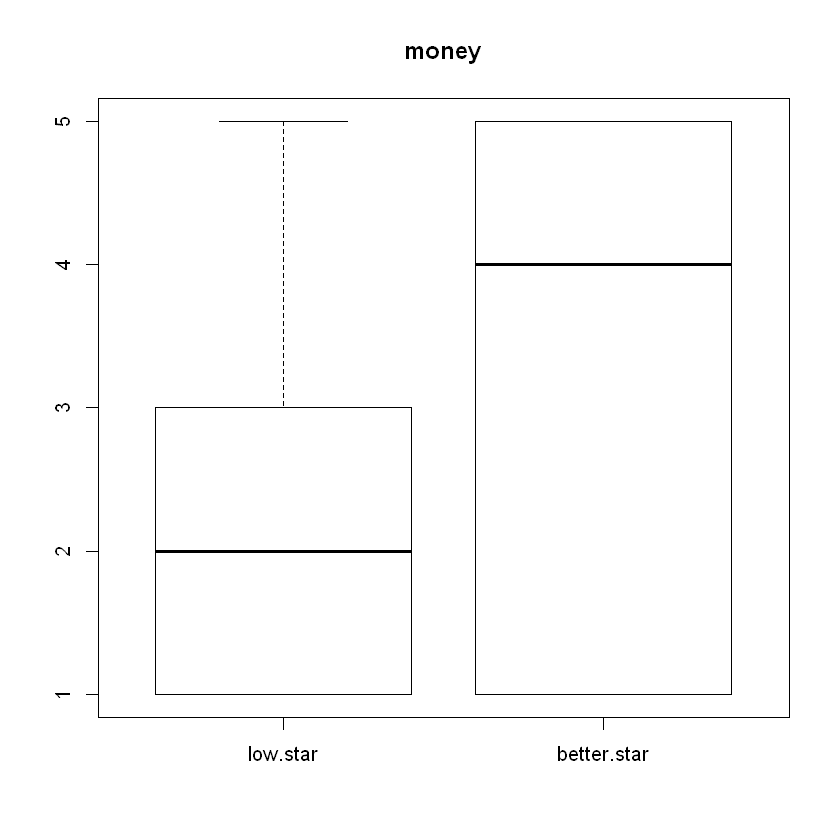

In [100]:
box.evaluation("money")

Warning message in cbind(low.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  low.star and better.star
t = -11.726, df = 215.27, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.589968 -1.132352
sample estimates:
mean of x mean of y 
 2.915584  4.276744 


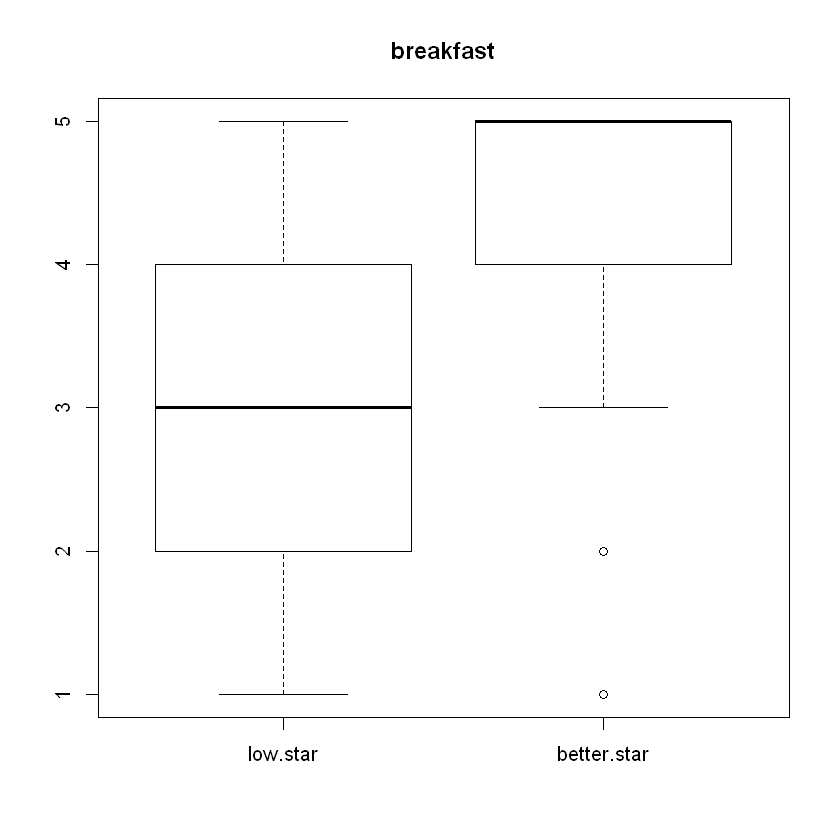

In [101]:
box.evaluation("breakfast")

Warning message in cbind(low.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  low.star and better.star
t = -5.69, df = 71.623, p-value = 2.591e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.5875607 -0.7637273
sample estimates:
mean of x mean of y 
 2.857143  4.032787 


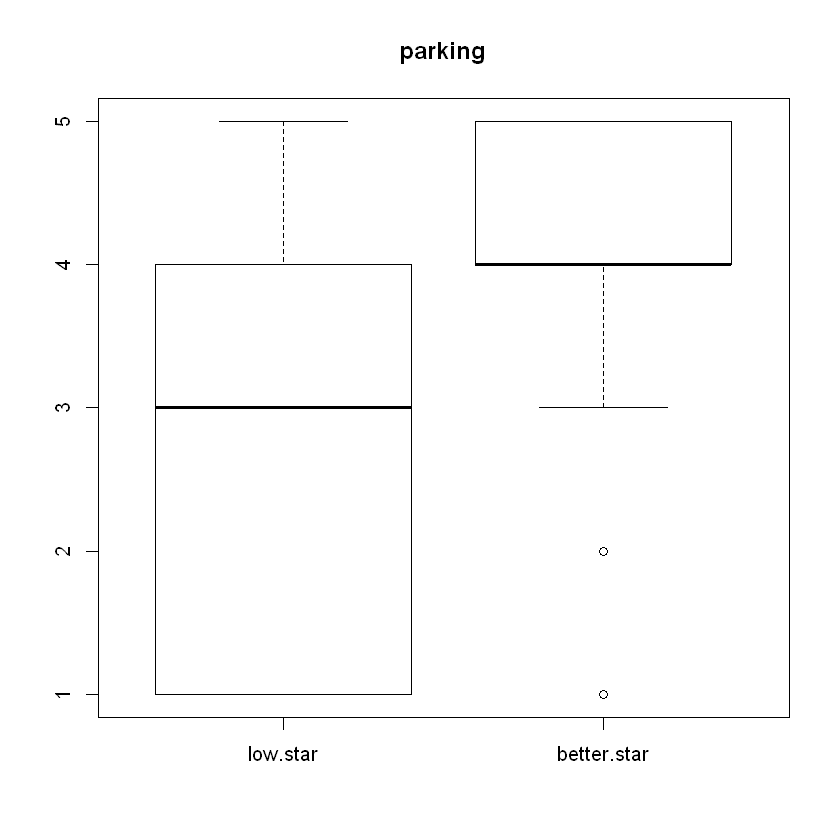

In [102]:
box.evaluation("parking")

Warning message in cbind(low.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  low.star and better.star
t = -6.4134, df = 104.63, p-value = 4.202e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.284947 -0.678029
sample estimates:
mean of x mean of y 
 3.150000  4.131488 


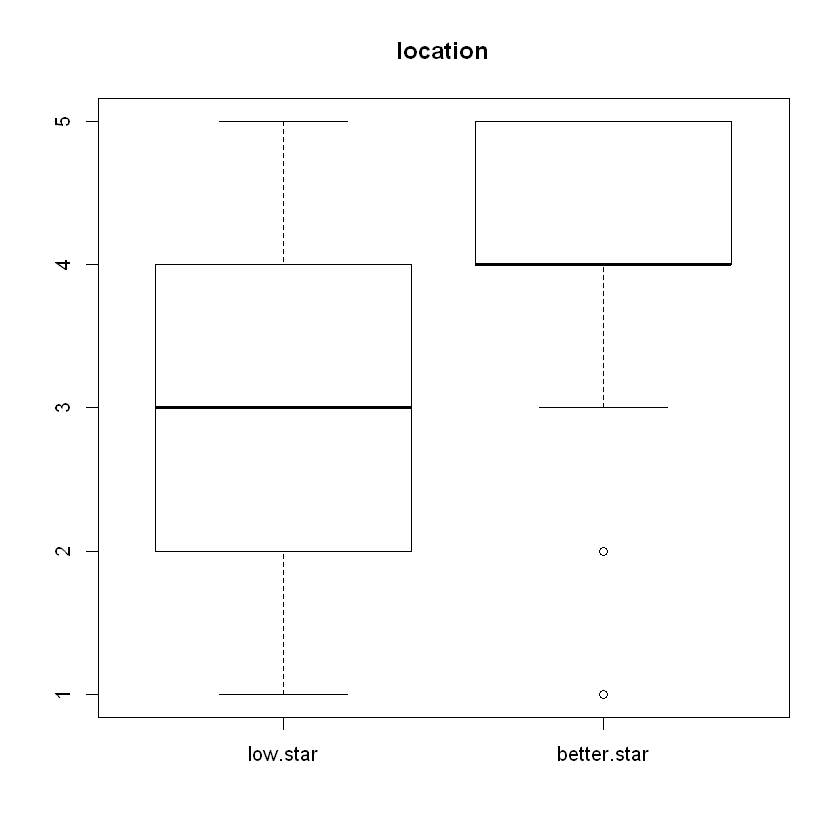

In [103]:
box.evaluation("location")

Warning message in cbind(low.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  low.star and better.star
t = -5.9268, df = 122.66, p-value = 2.91e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0836976 -0.5410486
sample estimates:
mean of x mean of y 
 3.512500  4.324873 


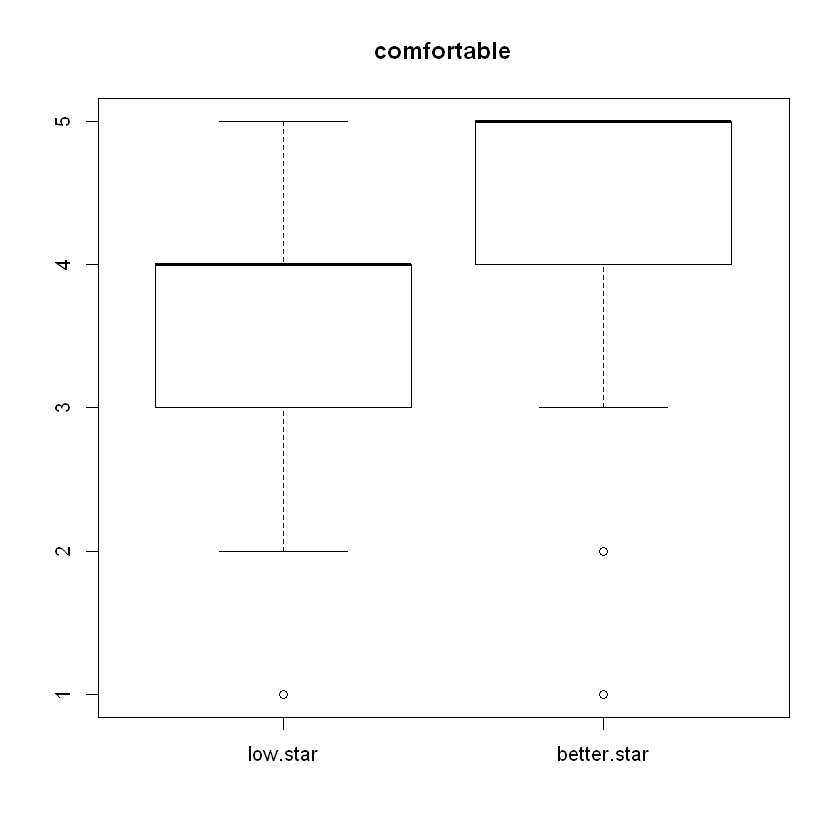

In [104]:
box.evaluation("comfortable")

Warning message in cbind(low.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  low.star and better.star
t = -2.6596, df = 21.823, p-value = 0.01437
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1133237 -0.1375161
sample estimates:
mean of x mean of y 
 3.789474  4.414894 


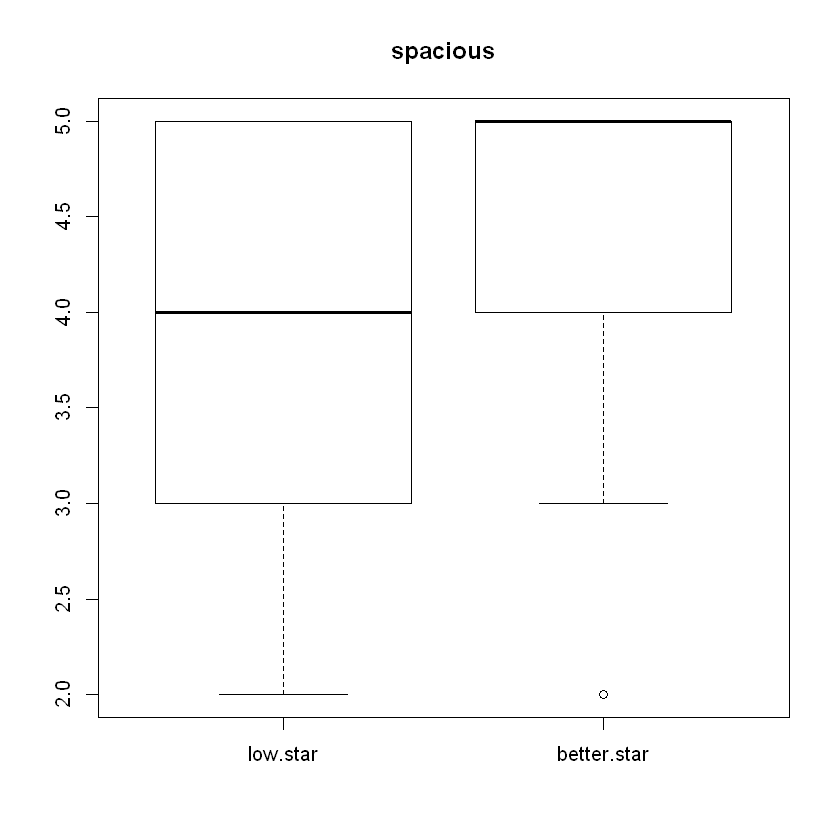

In [105]:
box.evaluation("spacious")

By the t.tests and produced box plots, we also conclude that words, "money", "breakfast", "parking", "location", "comfortable" and "spacious", make differneces between low rated hotels and high rated hotels.

## About AC Hotel by Marriott in Downtown Madison

In [106]:
avg.hotel["AC Hotel by Marriott Madison Downtown"]

AC Hotel by Marriott Madison Downtown 
                             3.454545

The average rate AC hotel obtained from customers is 3.46 which is close to 3.5, and they received 44 reviews.

[1] 44

room         hotel          view           bar          nice 
           33            31            22            17            16 
        great         floor       capitol         staff       madison 
           16            16            16            14            14 
   restaurant        modern          stay         place      location 
           14            14            13            13            13 
         good      friendly           one         night   comfortable 
           12            12            11            11            10 
           go     beautiful         clean        really          back 
           10            10             9             9             9 
          new         super      building       amazing           bed 
            9             9             9             9             8 
        could       parking        people         check         right 
            8             8             8             8             8 
   experience         drink          like          also       service 
            8             8             7             7             7 
         make          star       capital         would        stayed 
            7             7             7             6             6 
         desk          time         front           got        little 
            6             6             6             6             6 
         many      downtown          walk     breakfast           get 
            6             6             6             5             5 
        didnt          even      bathroom           two          work 
            5             5             5             5             5 
           im        around       overall         close         every 
            5             5             5             5             5 
      outside       problem          late        window             u 
            5             5             5             5             4 
        lobby         first         price    definitely        shower 
            4             4             4             4             4 
        never          best          made           way      business 
            4             4             4             4             4 
         come         quiet          said        minute          easy 
            4             4             4             4             4 
         give         think           far     excellent         noise 
            4             4             4             4             4 
         open          wall       however         comfy        second 
            4             4             4             4             4 
        smell      elevator        across           top       amenity 
            4             4             4             4             4 
          gym          help         light            ac          area 
            4             4             4             4             3 
         well         thing         next.         water            X2 
            3             3             3             3             3 
          use          door           ive            tv        enough 
            3             3             3             3             3 
          say         sleep          sure          feel          find 
            3             3             3             3             3 
      weekend       walking          told          town      customer 
            3             3             3             3             3 
      looking          love        wanted         extra            X4 
            3             3             3             3             3 
    extremely       perfect           ask           etc    convenient 
            3             3             3             3             3 
      enjoyed   reservation        couple          paid       without 
            3             3             3             3             3 
        quick          game      

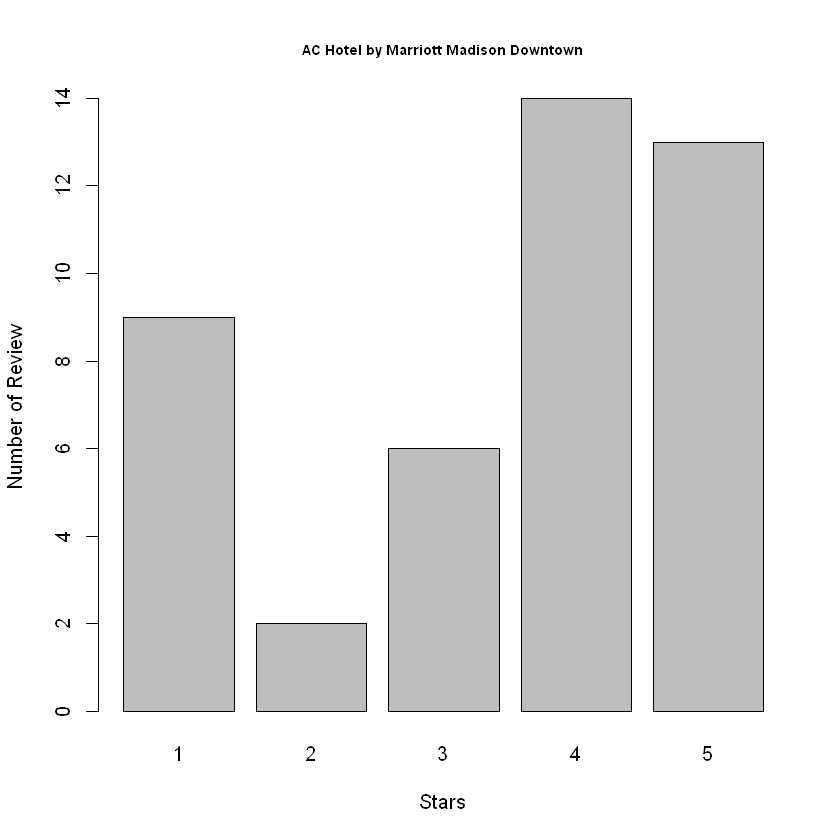

In [107]:
review.len <- c()
for(i in 1:length(names(avg.hotel))){
review.len[i] <- length(dat$stars_x[which(dat$name==names(avg.hotel)[i])])
}

length(dat$stars_x[which(dat$name=="AC Hotel by Marriott Madison Downtown")])
barplot(table(dat$stars_x[which(dat$name==names(avg.hotel)[22])]),xlab="Stars",ylab="Number of Review", main=names(avg.hotel)[22], cex.main = 0.7)

ref <- which(dat$name=="AC Hotel by Marriott Madison Downtown")

ac.dat <- wordembedding.dat[ref,]
stars <- ac.dat[,1]
ac.dat <- cbind(stars, ac.dat[names(sort(words[words>summary(words)[5]], decreasing= TRUE))])

ac.words <- apply(ac.dat[,2:dim(ac.dat)[2]],2,sum)
sort(ac.words, decreasing= TRUE)

In [108]:
ac.dat

,stars,room,hotel,stay,staff,clean,breakfast,nice,great,bed,...,three,ac,wisconsin,given,set,may,window,reason,selection,cooky
1196,2,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,5,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1198,4,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1199,3,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1200,4,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1201,5,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1202,4,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1203,3,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1204,3,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1205,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
dim(ac.dat)

[1]  44 344

In [110]:
word.ac.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(ac.dat$stars == 1))
total.star2 <-length(which(ac.dat$stars == 2))
total.star3 <-length(which(ac.dat$stars == 3))
total.star4 <-length(which(ac.dat$stars == 4))
total.star5 <-length(which(ac.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(ac.dat$stars,ac.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=paste('AC Hotel',ind))
}

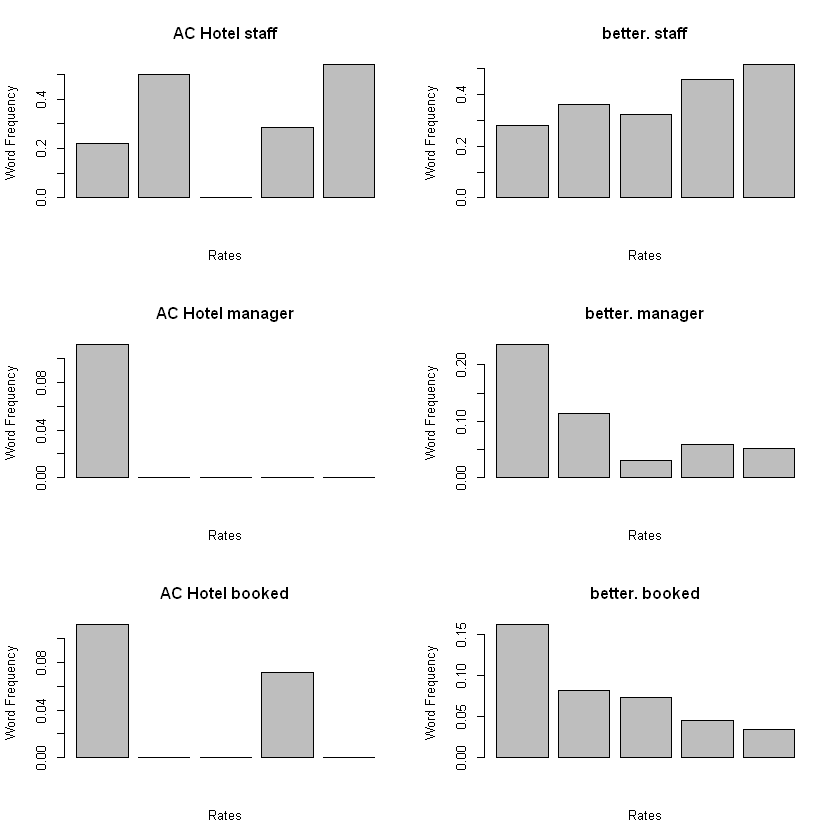

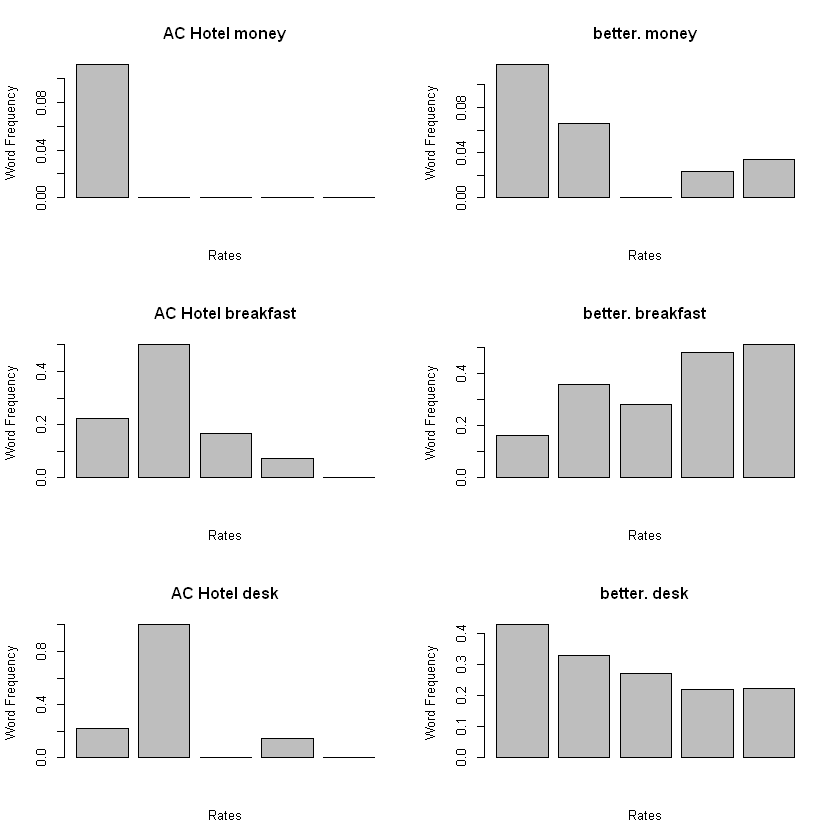

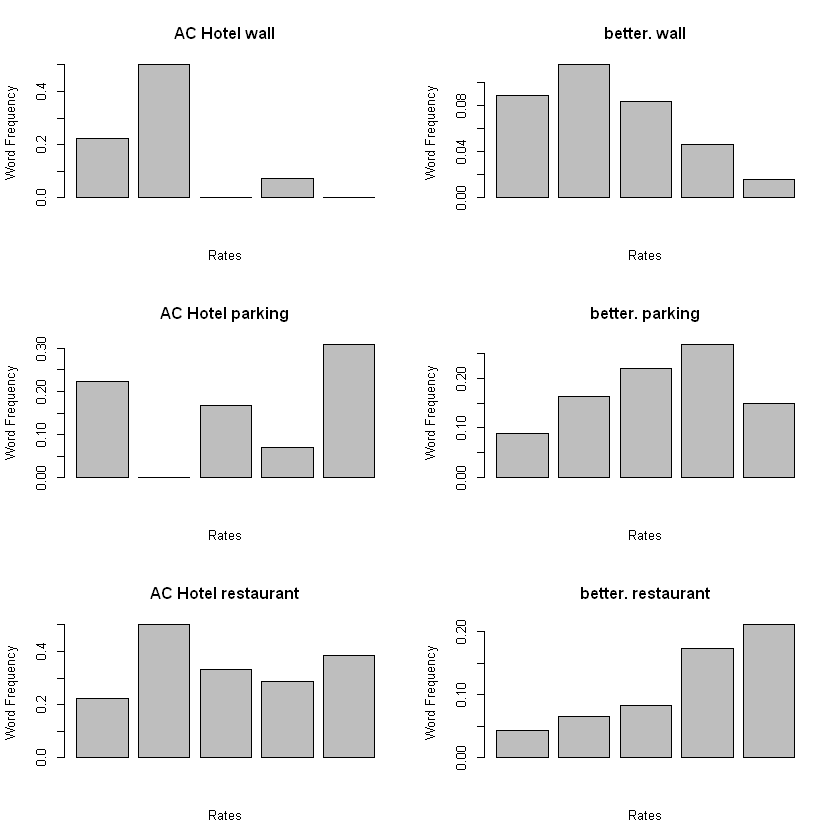

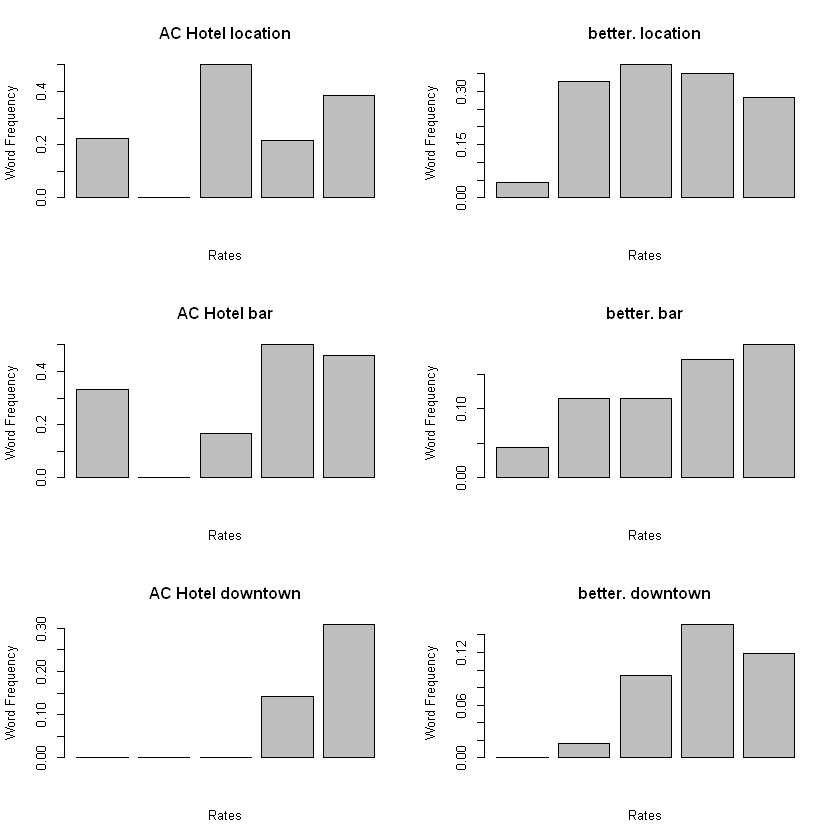

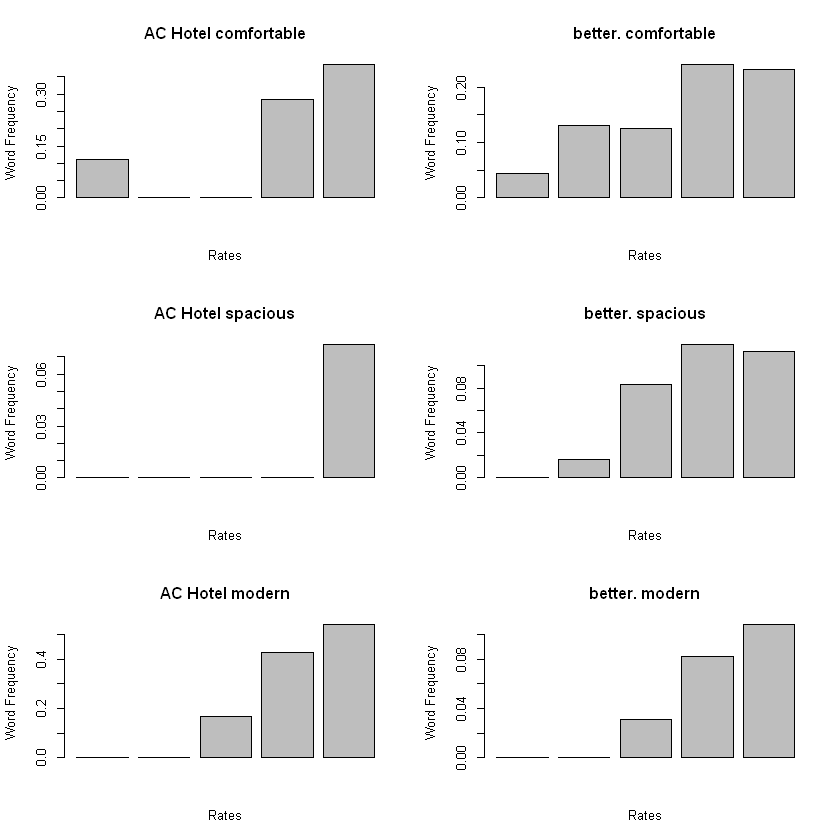

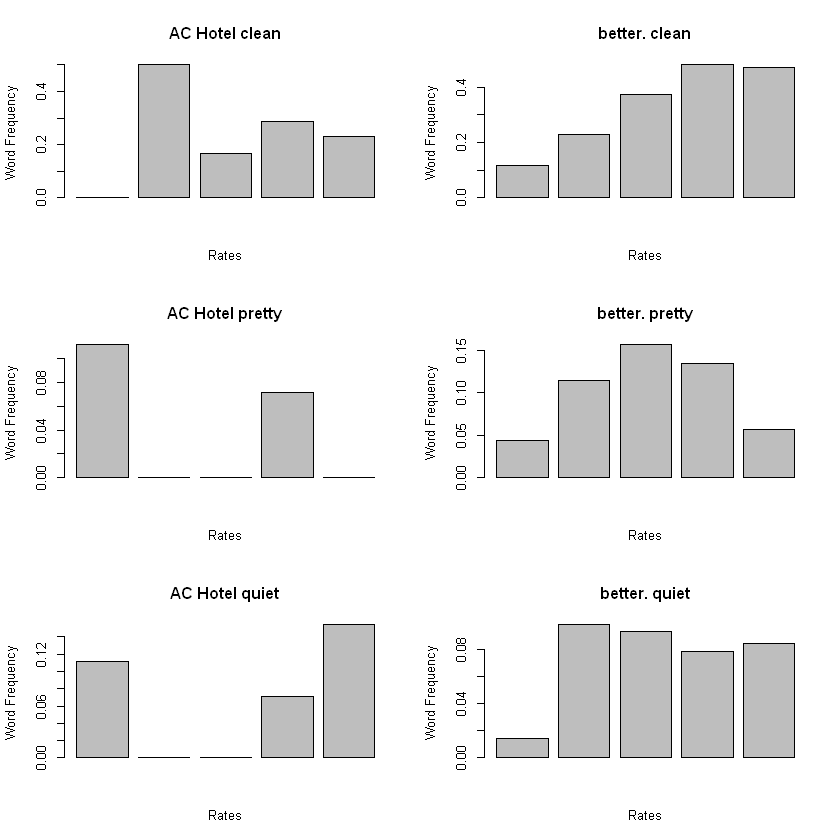

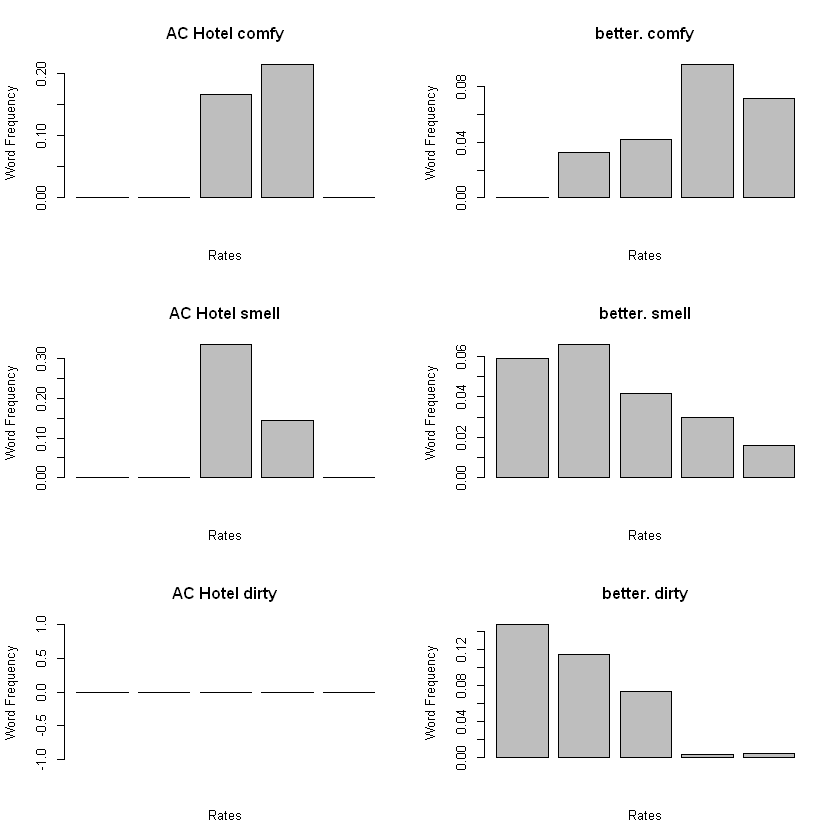

In [111]:
par(mfrow=c(3,2))

word.ac.frequency("staff")
word.better.frequency("staff")

word.ac.frequency("manager")
word.better.frequency("manager")

word.ac.frequency("booked")
word.better.frequency("booked")

word.ac.frequency("money")
word.better.frequency("money")

word.ac.frequency("breakfast")
word.better.frequency("breakfast")

word.ac.frequency("desk")
word.better.frequency("desk")

word.ac.frequency("wall")
word.better.frequency("wall")

word.ac.frequency("parking")
word.better.frequency("parking")

word.ac.frequency("restaurant")
word.better.frequency("restaurant")

word.ac.frequency("location")
word.better.frequency("location")

word.ac.frequency("bar")
word.better.frequency("bar")

word.ac.frequency("downtown")
word.better.frequency("downtown")

word.ac.frequency("comfortable")
word.better.frequency("comfortable")

word.ac.frequency("spacious")
word.better.frequency("spacious")

word.ac.frequency("modern")
word.better.frequency("modern")

word.ac.frequency("clean")
word.better.frequency("clean")

word.ac.frequency("pretty")
word.better.frequency("pretty")


word.ac.frequency("quiet")
word.better.frequency("quiet")

word.ac.frequency("comfy")
word.better.frequency("comfy")

word.ac.frequency("smell")
word.better.frequency("smell")


word.ac.frequency("dirty")
word.better.frequency("dirty")

Comparing bar plots from 44 reviews about AC Hotel and bar plots from 965 reviews about the better rated Hotels, we figured out, customers are not very satisfied with staffs, managers. Moreover, provided breakfast, and something about desk and wall are necessarily improved. It seems like customers are not very satisfied with cleanliness of AC Hotel.
However, customers of AC Hotels quite satisfied with parking facility and location of the hotel. Also, they are content with the near bars inside or outside of AC Hotel.

To get more details, we compared the distributions and the mean values of the star rate of corresponding words "staff", "breakfast", ,"desk", "wall","parking", "bar", "downtown", "restaurant", "location", "comfortable", "quiet", "smell", "modern" and "comfy" between low rated hotels and high rated hotels. Other words, "booked", "money", "manager", "spacious", "pretty" and "dirty" are excluded since there is not enough number of words in AC hotel reviews.

In [112]:
box.ac.evaluation <- function(argument1){
ind <- argument1
index <- which(ac.dat[ind]==1)
ac.star <- as.numeric(ac.dat[index,1])
mean(ac.star)
index2 <- which(betterhotel.dat[ind]==1)
better.star <- as.numeric(betterhotel.dat[index2,1])
mean(better.star)

boxplot(cbind(ac.star,better.star),main=paste(ind))
t.test(ac.star,better.star)

}

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -0.70387, df = 13.432, p-value = 0.4935
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.148464  0.582618
sample estimates:
mean of x mean of y 
 3.928571  4.211494 


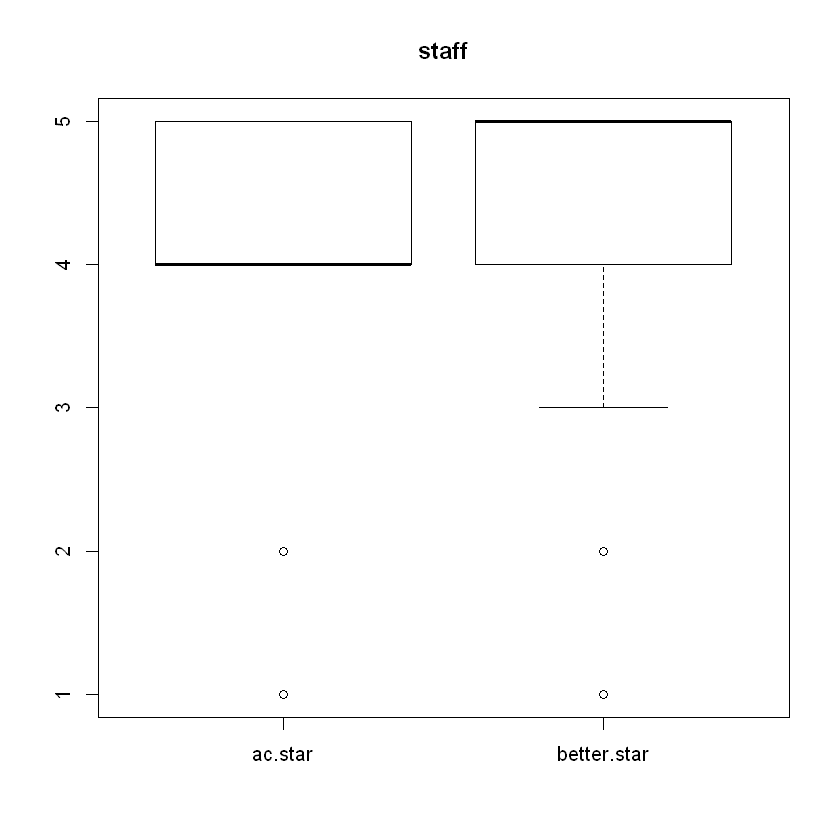

In [113]:
box.ac.evaluation("staff")


	Welch Two Sample t-test

data:  ac.star and better.star
t = -3.5502, df = 4.0517, p-value = 0.02329
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.6927413 -0.4607471
sample estimates:
mean of x mean of y 
 2.200000  4.276744 


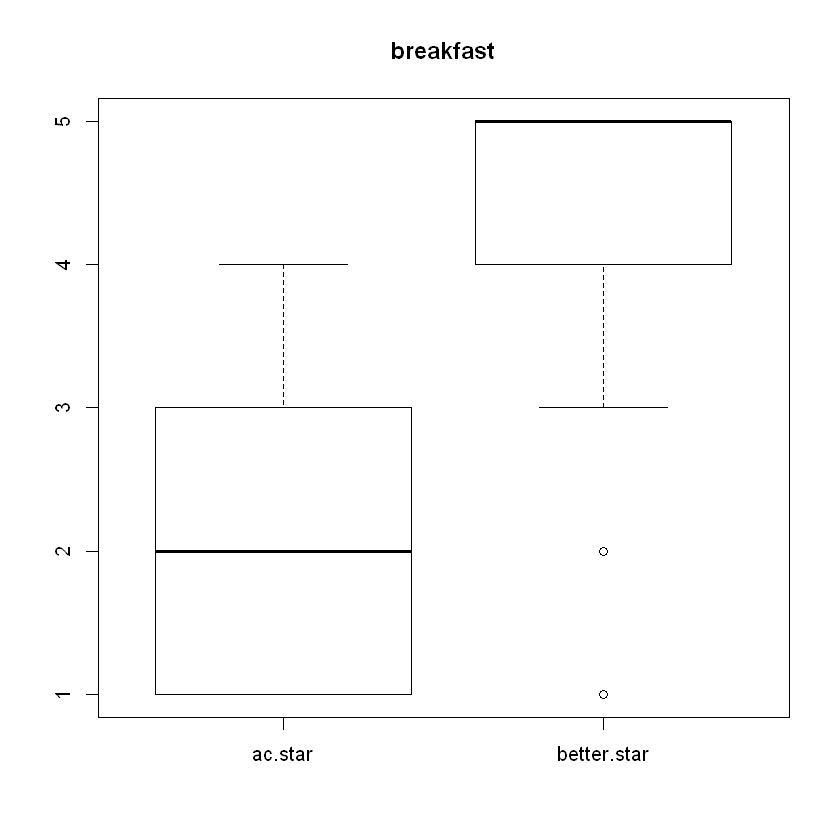

In [114]:
box.ac.evaluation("breakfast")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -2.5359, df = 5.258, p-value = 0.04983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.863143649 -0.001570438
sample estimates:
mean of x mean of y 
 2.333333  3.765690 


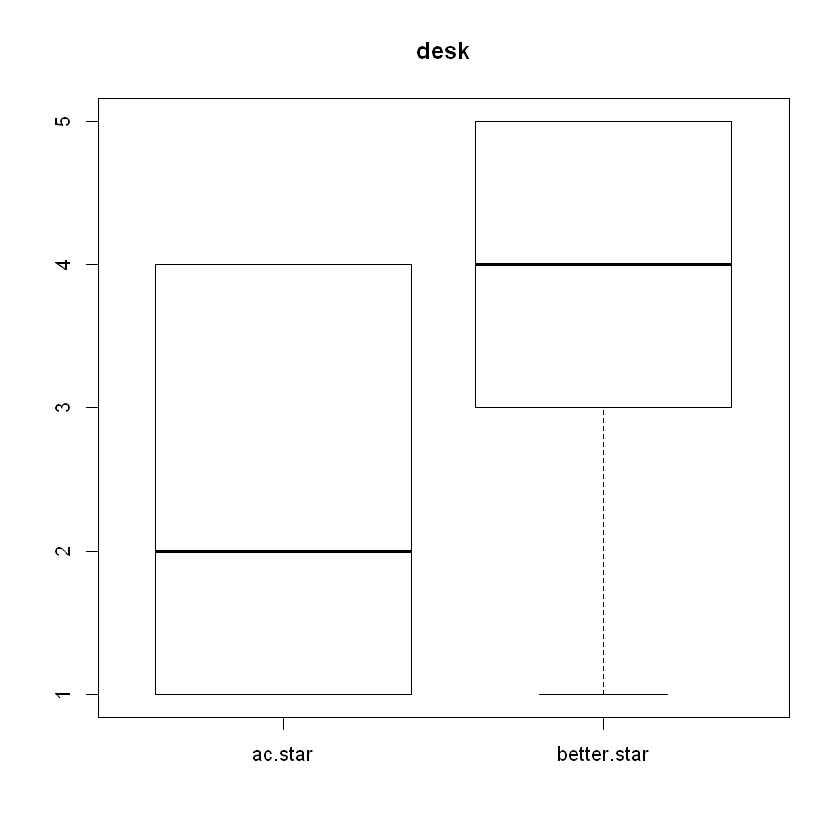

In [115]:
box.ac.evaluation("desk")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -1.6505, df = 3.514, p-value = 0.184
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3733502  0.9447788
sample estimates:
mean of x mean of y 
 2.000000  3.214286 


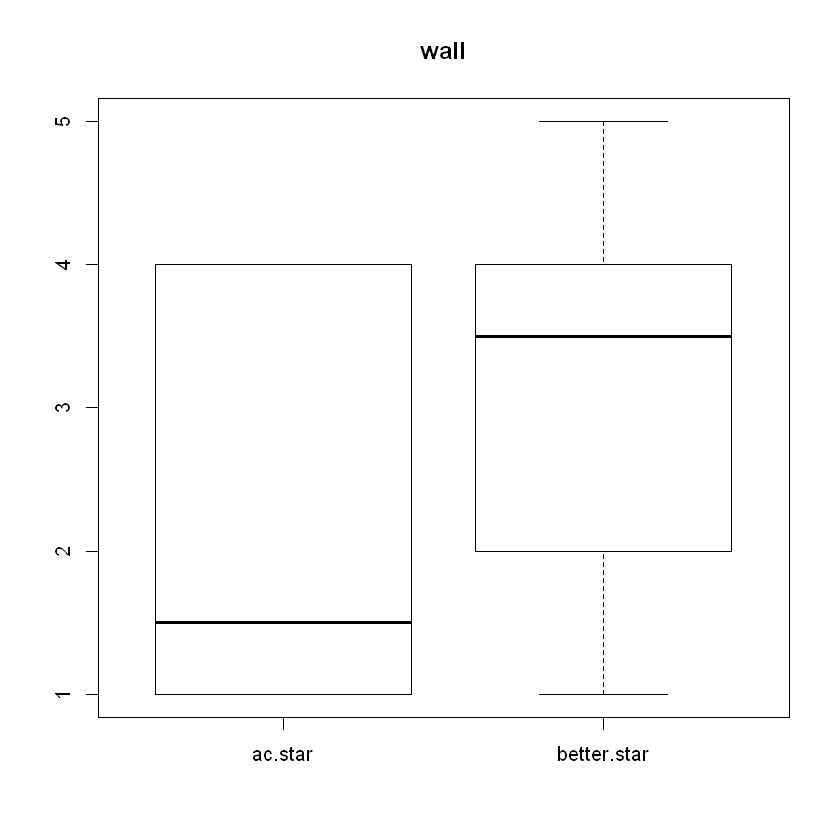

In [116]:
box.ac.evaluation("wall")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -0.648, df = 7.1948, p-value = 0.5371
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.887727  1.072153
sample estimates:
mean of x mean of y 
 3.625000  4.032787 


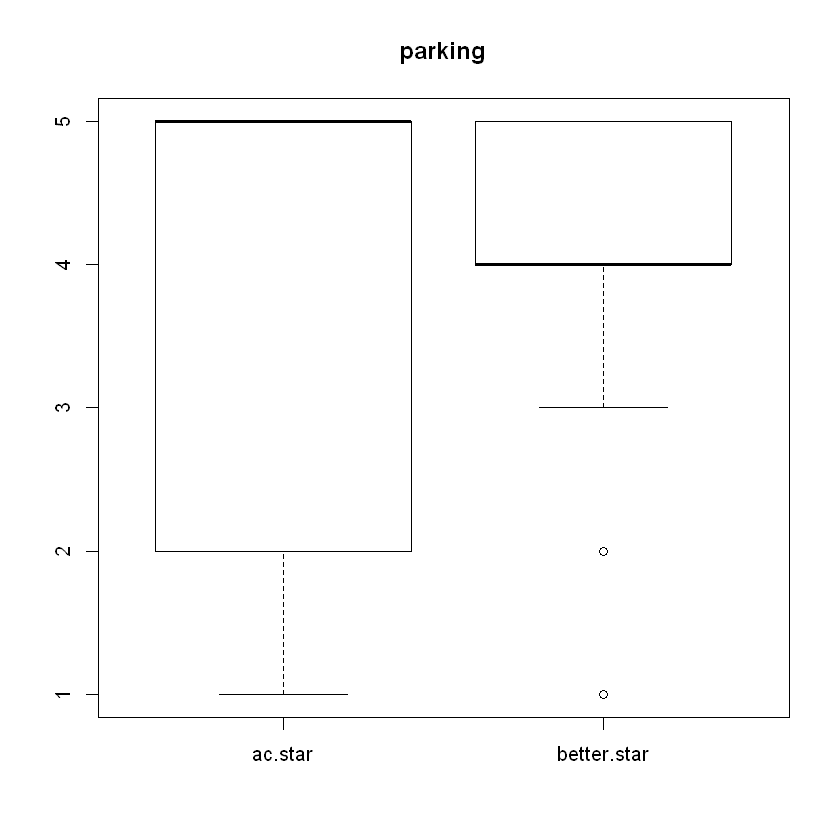

In [117]:
box.ac.evaluation("parking")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -1.5538, df = 17.47, p-value = 0.1382
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.304145  0.196614
sample estimates:
mean of x mean of y 
 3.764706  4.318471 


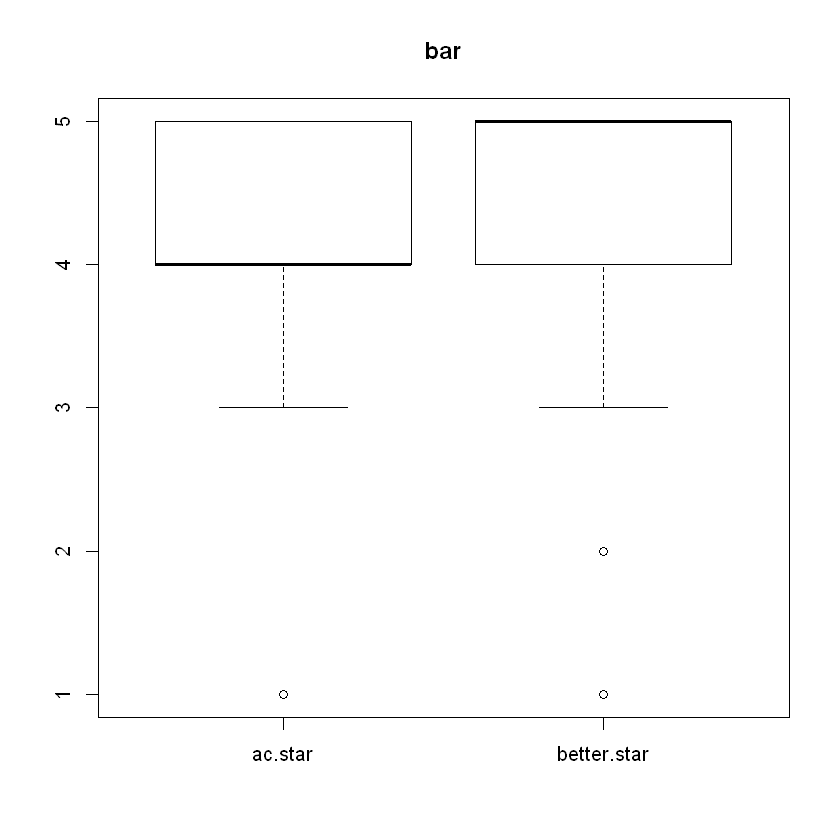

In [118]:
box.ac.evaluation("bar")


	Welch Two Sample t-test

data:  ac.star and better.star
t = 1.3004, df = 6.0062, p-value = 0.2411
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2529370  0.8270111
sample estimates:
mean of x mean of y 
 4.666667  4.379630 


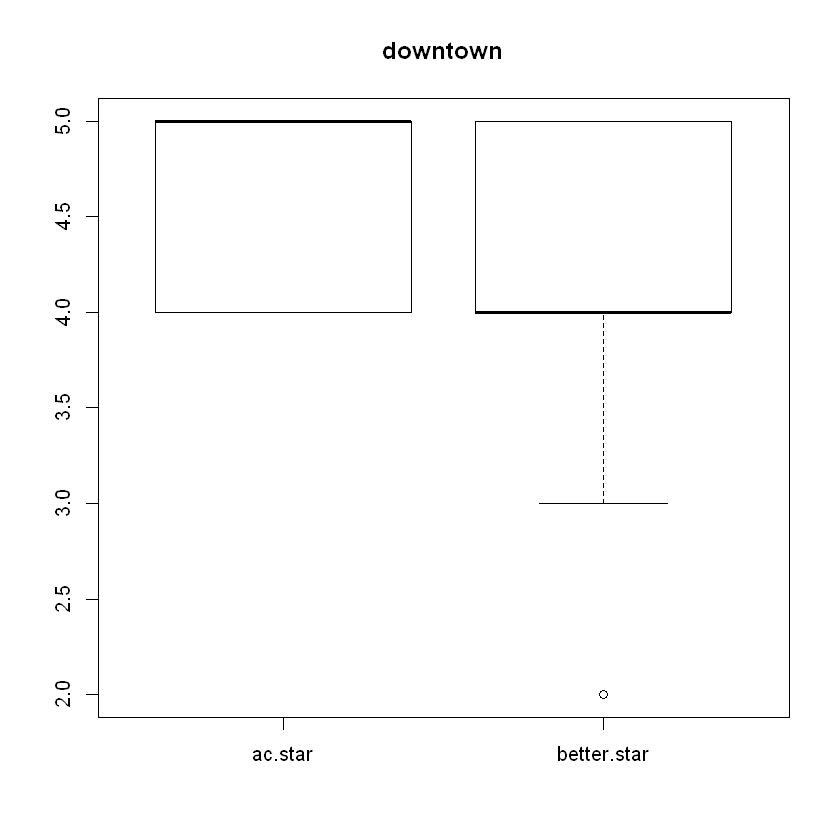

In [119]:
box.ac.evaluation("downtown")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -1.9769, df = 13.796, p-value = 0.0684
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.61886368  0.06707797
sample estimates:
mean of x mean of y 
 3.642857  4.418750 


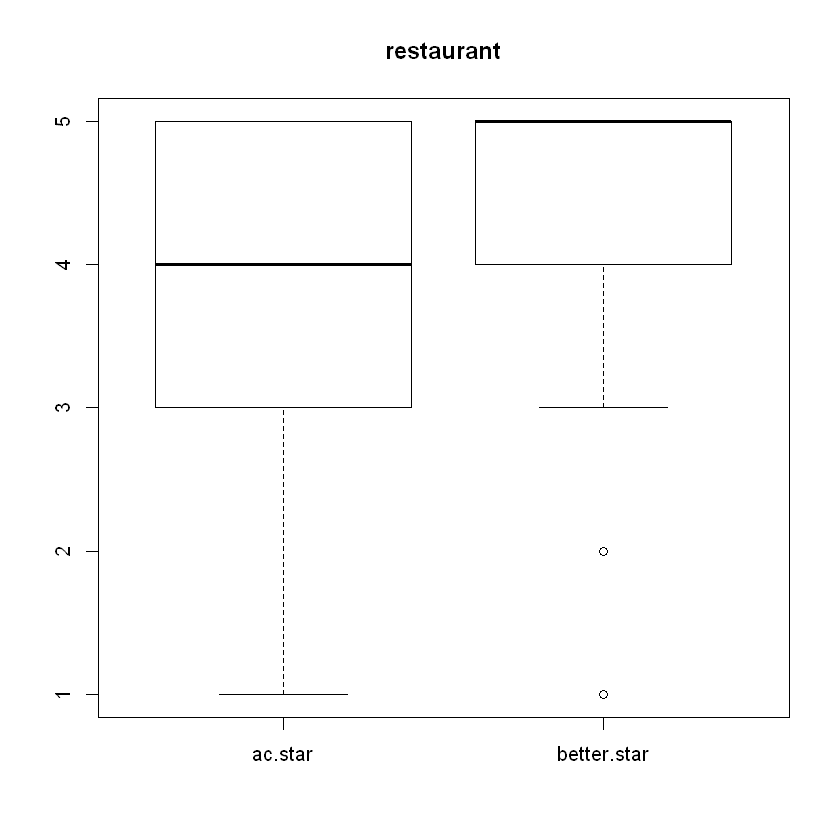

In [120]:
box.ac.evaluation("restaurant")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -1.0914, df = 12.478, p-value = 0.2957
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3121859  0.4338255
sample estimates:
mean of x mean of y 
 3.692308  4.131488 


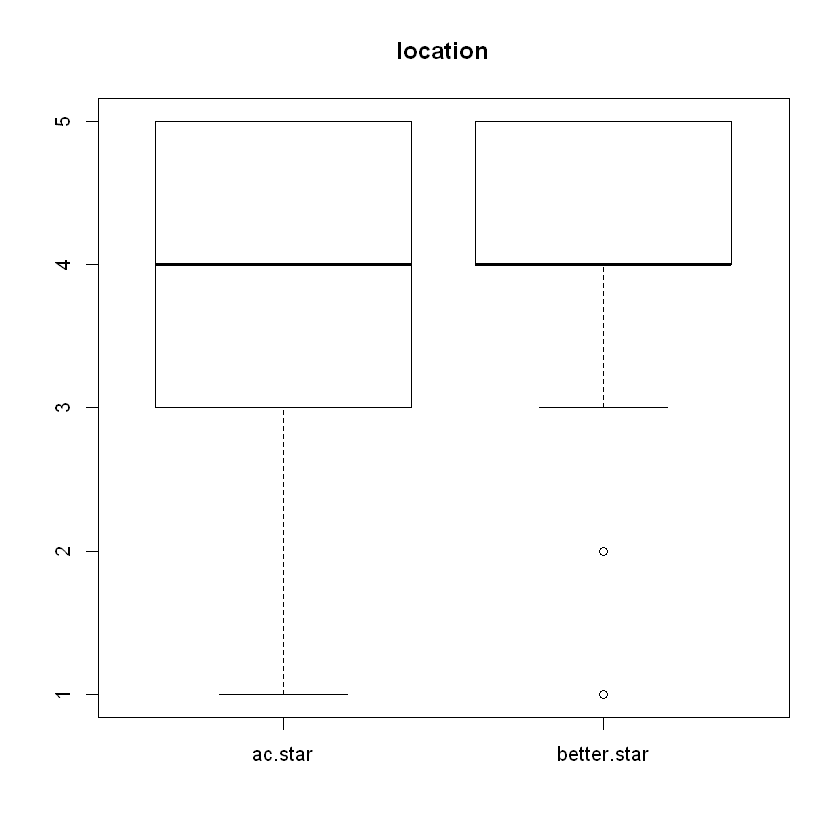

In [121]:
box.ac.evaluation("location")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -0.85053, df = 8.2921, p-value = 0.4189
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0569254  0.4847982
sample estimates:
mean of x mean of y 
 4.000000  4.286064 


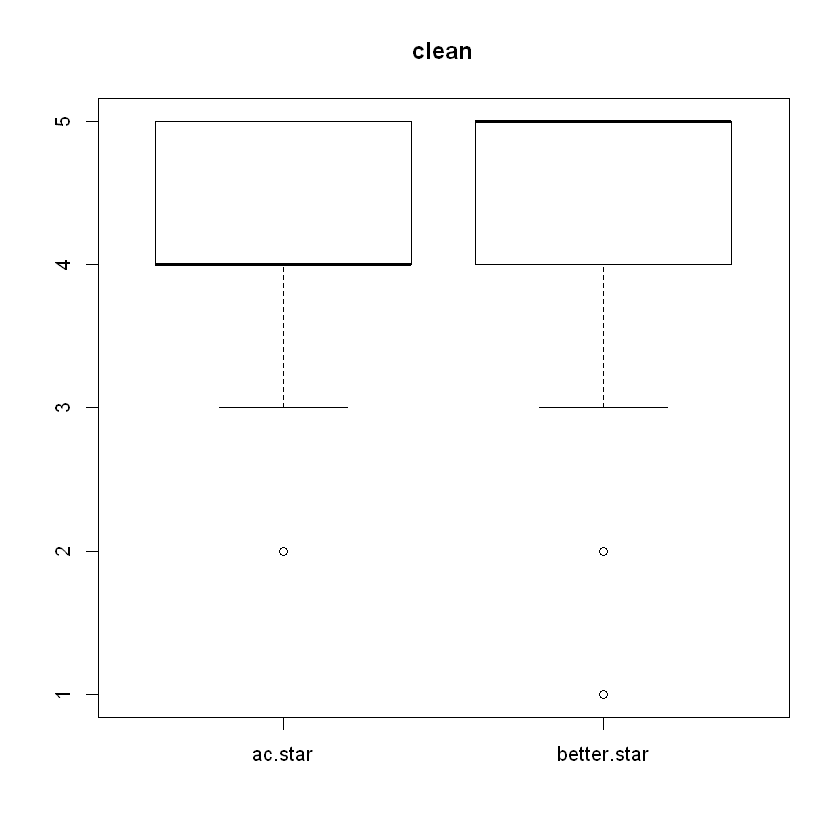

In [123]:
box.ac.evaluation("clean")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -0.31715, df = 9.4722, p-value = 0.758
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0088403  0.7590941
sample estimates:
mean of x mean of y 
 4.200000  4.324873 


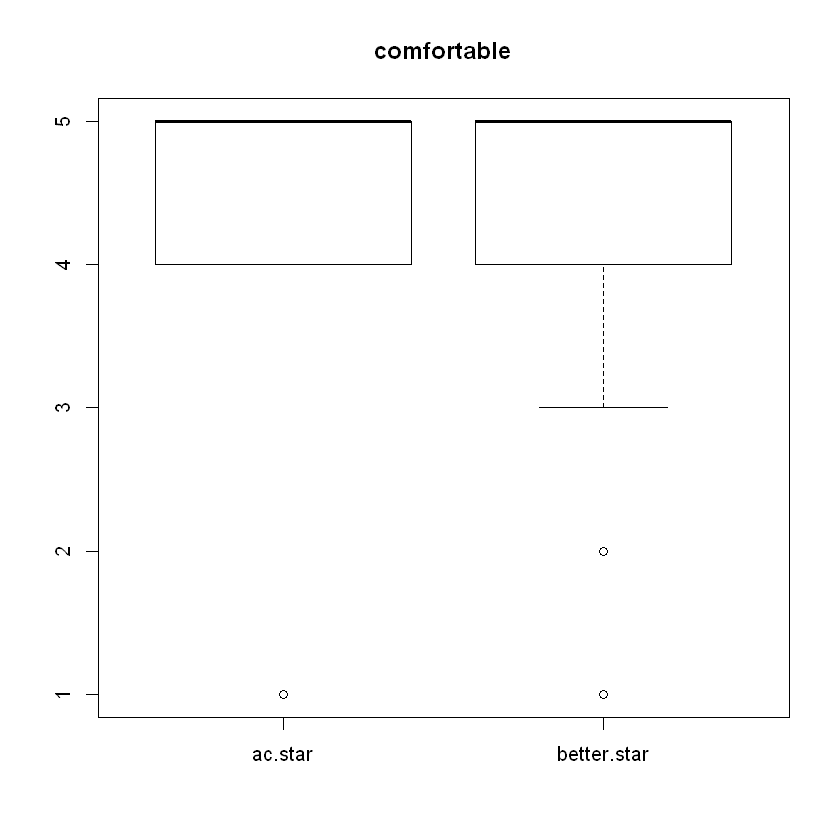

In [124]:
box.ac.evaluation("comfortable")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -0.43931, df = 3.0885, p-value = 0.6894
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.404344  2.566682
sample estimates:
mean of x mean of y 
 3.750000  4.168831 


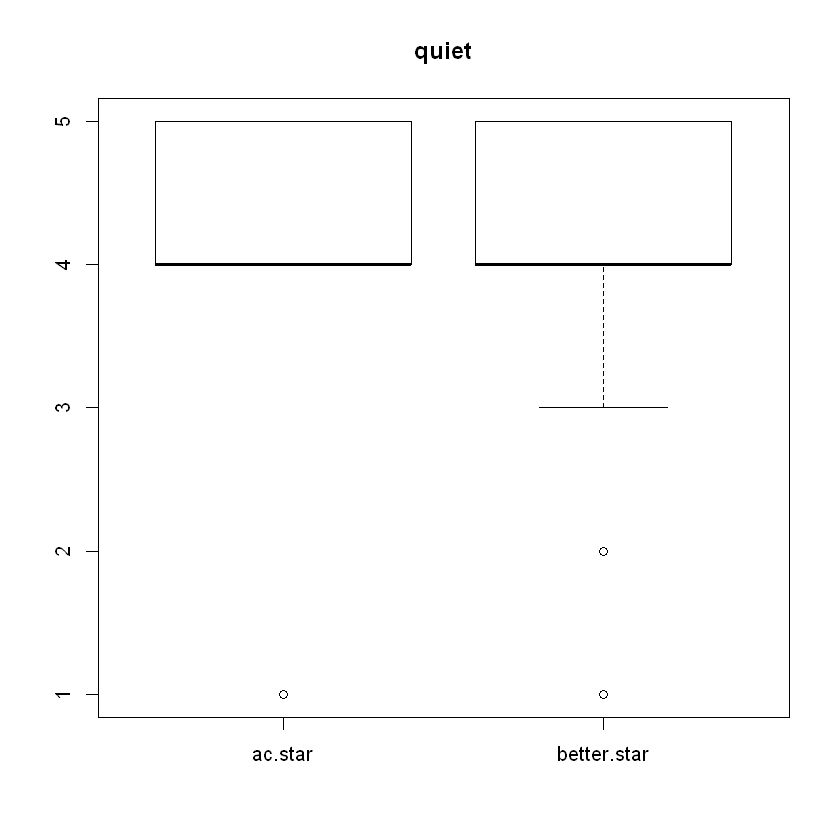

In [125]:
box.ac.evaluation("quiet")


	Welch Two Sample t-test

data:  ac.star and better.star
t = 0.2739, df = 9.3854, p-value = 0.7901
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7722368  0.9865225
sample estimates:
mean of x mean of y 
 3.500000  3.392857 


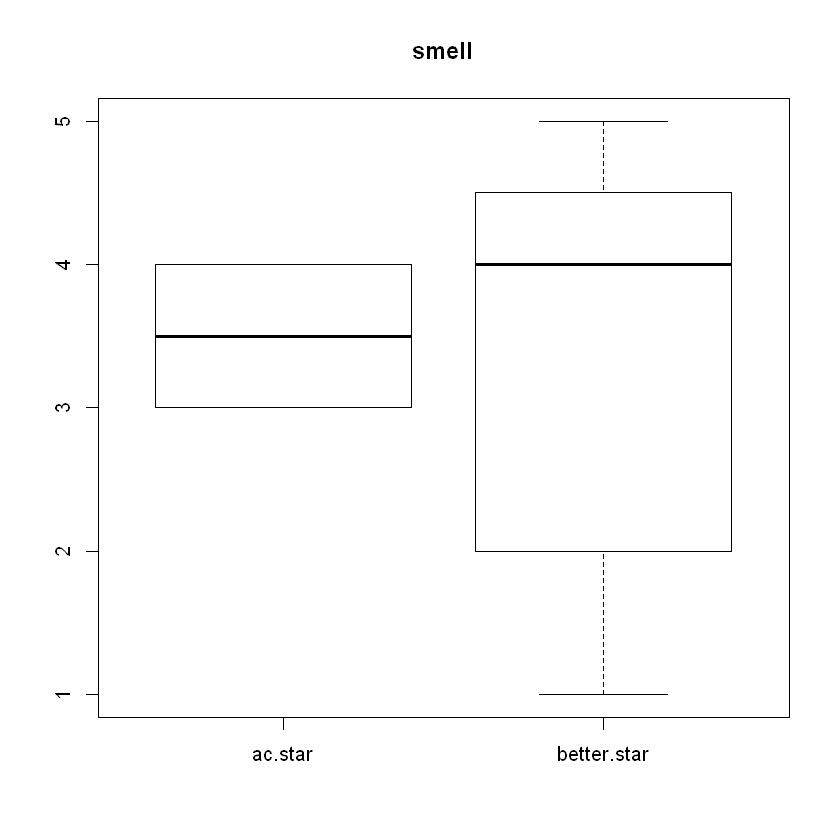

In [126]:
box.ac.evaluation("smell")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -0.85507, df = 17.012, p-value = 0.4044
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5481627  0.2319723
sample estimates:
mean of x mean of y 
 4.428571  4.586667 


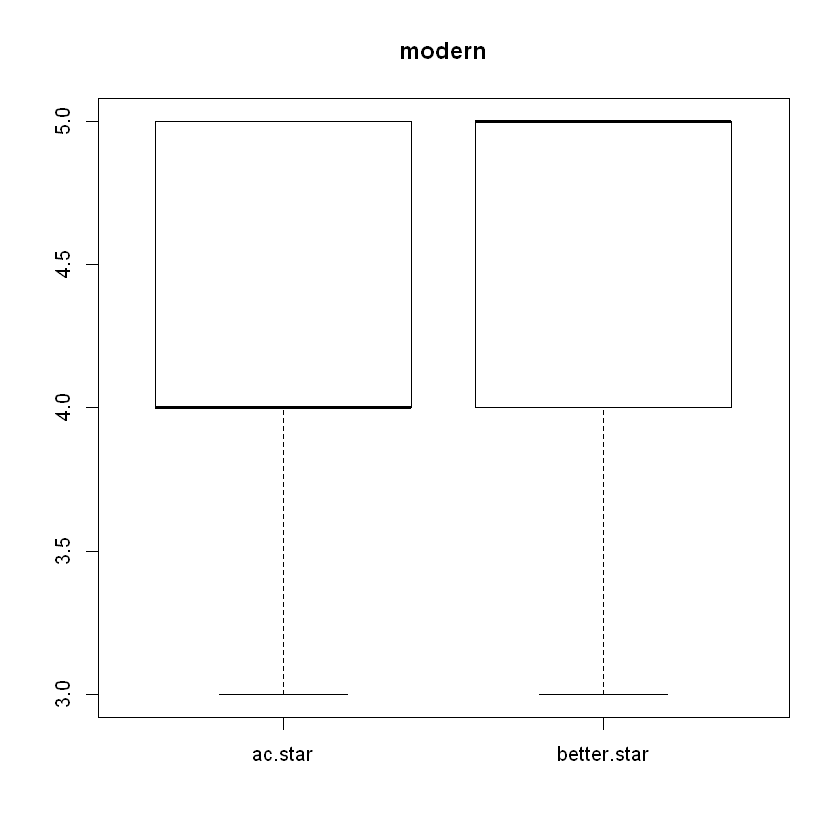

In [127]:
box.ac.evaluation("modern")

Warning message in cbind(ac.star, better.star):
"number of rows of result is not a multiple of vector length (arg 1)"


	Welch Two Sample t-test

data:  ac.star and better.star
t = -2.2516, df = 3.8309, p-value = 0.09045
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3495151  0.1525454
sample estimates:
mean of x mean of y 
 3.750000  4.348485 


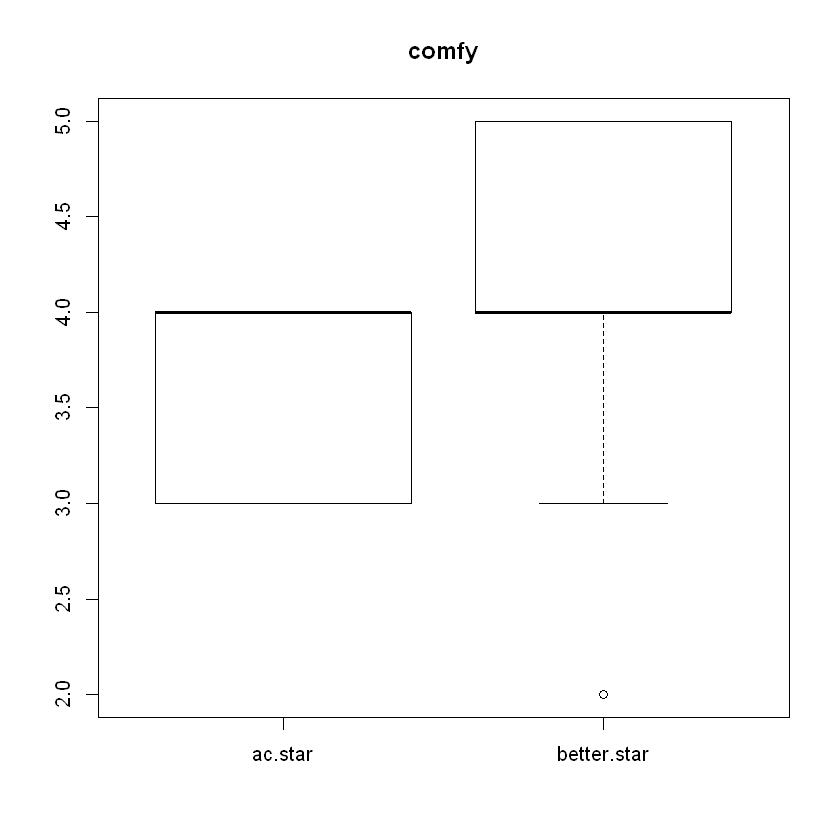

In [128]:
box.ac.evaluation("comfy")

We observed statistical difference between the star rate corresponding words, "breakfast" and "desk".
Based upon the analysis, AC Hotel owner should improve their quality of breakfast for customers and improve the quality of desk in the room.